 # Robust Embeddings

## Validation curves

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [ ]:
ROLASER_MODELS = ["roberta-maxpool", "roberta-maxpool-init", "roberta-meanpool", "roberta-meanpool-init"]
C_ROLASER_MODELS = ["c-roberta-maxpool", "c-roberta-maxpool-init", "c-roberta-meanpool", "c-roberta-meanpool-init"]

In [ ]:
COLUMNS = ["loss_std_gold", "loss_ugc_gold", "valid_distil_loss"]

In [ ]:
input_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores"
all_scores = pd.read_csv(os.path.join(input_dir, "all_scores.csv")).sort_values(by="steps")

In [ ]:
all_scores["model"].unique().size

2

In [ ]:
x_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-4, -4))  # Set the exponent range to (-4, -4)
x_formatter.set_powerlimits((5, 5))  # Set the exponent range to (5, 5)


KeyboardInterrupt: 

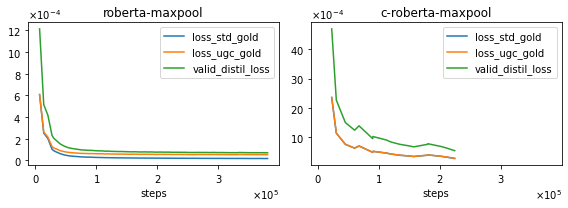

In [ ]:
models = all_scores["model"].unique()

n_rows = models.size//2
n_cols = min(models.size, 2)
fig, axs = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(4*n_cols, 3*n_rows), sharex=True)

for n, model in enumerate(models):
    i, j = n//2, n%2
    all_scores[all_scores["model"] == model].plot(x="steps", y=COLUMNS, ax=axs[i,j], title=model)
    axs[i,j].xaxis.set_major_formatter(x_formatter)
    axs[i,j].yaxis.set_major_formatter(y_formatter)
fig.tight_layout()
plt.savefig(os.path.join(input_dir, "models_valid.png"))
plt.savefig(os.path.join(input_dir, "models_valid.pdf"))

## LASER metrics analysis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cosine distance

In [3]:
cosine_distances = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/_scores/cosine_distance_matrix.csv")
cosine_distances = cosine_distances[cosine_distances["src-tgt"]!="average"]
cosine_distances = cosine_distances[cosine_distances["src-tgt"]!="eng_Latn-eng_Latn"]
cosine_distances

Unnamed: 0    dataset            src-tgt   cosdist  nbex
0             0  flores200  ace_Arab-eng_Latn  0.455130  1012
1             1  flores200  ace_Latn-eng_Latn  0.348420  1012
2             2  flores200  acm_Arab-eng_Latn  0.134560  1012
3             3  flores200  acq_Arab-eng_Latn  0.125026  1012
4             4  flores200  aeb_Arab-eng_Latn  0.160731  1012
..          ...        ...                ...       ...   ...
198         198  flores200  yue_Hant-eng_Latn  0.206195  1012
199         199  flores200  zho_Hans-eng_Latn  0.150216  1012
200         200  flores200  zho_Hant-eng_Latn  0.210406  1012
201         201  flores200  zsm_Latn-eng_Latn  0.103942  1012
202         202  flores200  zul_Latn-eng_Latn  0.417348  1012

[203 rows x 5 columns]

<AxesSubplot: >

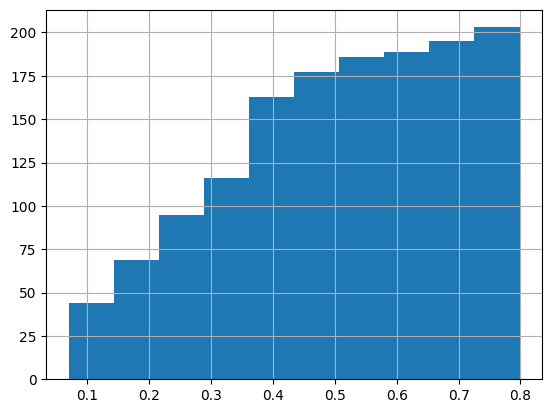

In [ ]:
cosine_distances['cosdist'].hist(cumulative=True)

<AxesSubplot: ylabel='Density'>

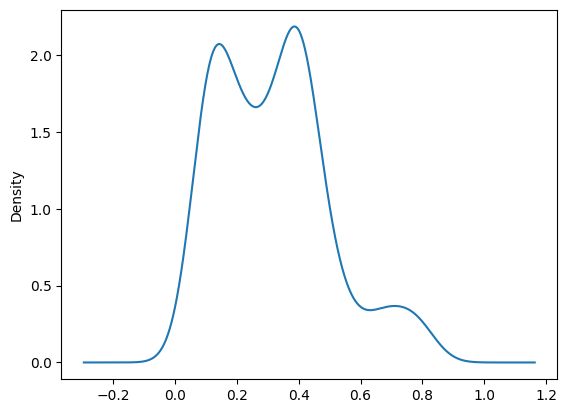

In [ ]:
cosine_distances['cosdist'].plot.density()

<AxesSubplot: >

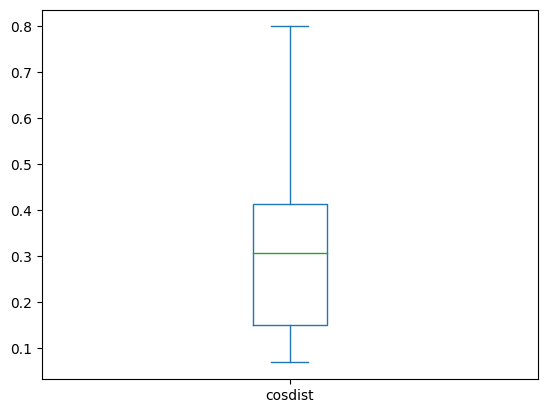

In [ ]:
cosine_distances['cosdist'].plot.box()

In [ ]:
cosine_distances_quantiles = cosine_distances['cosdist'].describe(percentiles=[x/100 for x in range(0,101,5)])


In [ ]:
cosine_distances_quantiles

count    203.000000
mean       0.317085
std        0.178869
min        0.069671
0%         0.069671
5%         0.095558
10%        0.106441
15%        0.117595
20%        0.130967
25%        0.151202
30%        0.183997
35%        0.218698
40%        0.249793
45%        0.284499
50%        0.308165
55%        0.353173
60%        0.376368
65%        0.388125
70%        0.399638
75%        0.414037
80%        0.430705
85%        0.458284
90%        0.528894
95%        0.686873
100%       0.798508
max        0.798508
Name: cosdist, dtype: float64

### xSIM

In [4]:
xsim_scores = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/_scores/xsim_matrix.csv")
xsim_scores = xsim_scores[xsim_scores["src-tgt"]!="average"]
xsim_scores = xsim_scores[xsim_scores["src-tgt"]!="eng_Latn-eng_Latn"]
xsim_scores

Unnamed: 0    dataset            src-tgt   xsim  nbex
0             0  flores200  ace_Arab-eng_Latn  95.16  1012
1             1  flores200  ace_Latn-eng_Latn  65.51  1012
2             2  flores200  acm_Arab-eng_Latn   0.20  1012
3             3  flores200  acq_Arab-eng_Latn   0.00  1012
4             4  flores200  aeb_Arab-eng_Latn   0.99  1012
..          ...        ...                ...    ...   ...
198         198  flores200  yue_Hant-eng_Latn   4.05  1012
199         199  flores200  zho_Hans-eng_Latn   0.00  1012
200         200  flores200  zho_Hant-eng_Latn   4.05  1012
201         201  flores200  zsm_Latn-eng_Latn   0.30  1012
202         202  flores200  zul_Latn-eng_Latn  89.33  1012

[203 rows x 5 columns]

<AxesSubplot: ylabel='Frequency'>

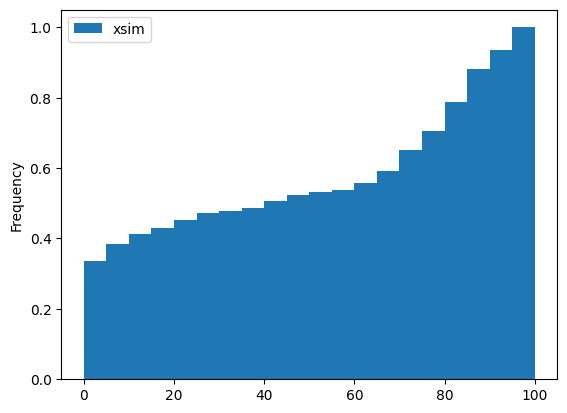

In [ ]:
xsim_scores.plot.hist(column=['xsim'],cumulative=True, bins=range(0,101,5), density=True)

<AxesSubplot: ylabel='Density'>

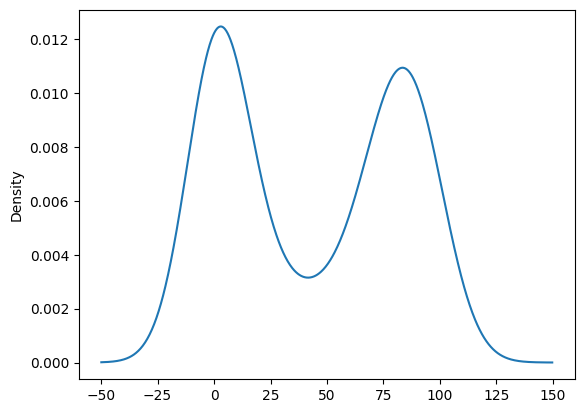

In [ ]:
xsim_scores['xsim'].plot.density()

<AxesSubplot: >

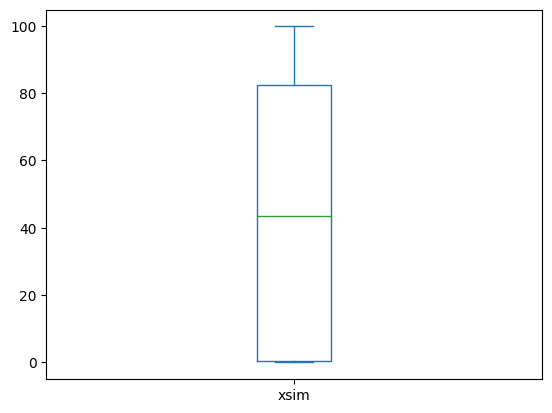

In [ ]:
xsim_scores['xsim'].plot.box()

In [ ]:
xsim_scores['xsim'].describe(percentiles=set([x/100 for x in range(0,101,5)]))

count    203.000000
mean      43.417389
std       38.890398
min        0.000000
0%         0.000000
5%         0.000000
10%        0.000000
15%        0.000000
20%        0.200000
25%        0.400000
30%        0.950000
35%        6.636000
40%       13.120000
45%       24.431000
50%       43.480000
55%       61.780000
60%       70.550000
65%       74.790000
70%       79.390000
75%       82.510000
80%       85.690000
85%       88.620000
90%       91.580000
95%       95.611000
100%      99.800000
max       99.800000
Name: xsim, dtype: float64

In [ ]:
cosine_distances['cosdist'].quantile(.25)

0.1512024328112602

### xSIM++

In [5]:
xsimpp_scores = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsimplusplus/_scores/xsimpp_matrix.csv")
xsimpp_scores = xsimpp_scores[xsimpp_scores["src-tgt"]!="average"]
xsimpp_scores

Unnamed: 0    dataset            src-tgt  xsim(++)  nbex
0             0  flores200  ace_Arab-eng_Latn     99.90  1012
1             1  flores200  ace_Latn-eng_Latn     93.48  1012
2             2  flores200  acm_Arab-eng_Latn     26.88  1012
3             3  flores200  acq_Arab-eng_Latn     23.62  1012
4             4  flores200  aeb_Arab-eng_Latn     36.86  1012
..          ...        ...                ...       ...   ...
198         198  flores200  yue_Hant-eng_Latn     44.17  1012
199         199  flores200  zho_Hans-eng_Latn     25.99  1012
200         200  flores200  zho_Hant-eng_Latn     49.01  1012
201         201  flores200  zsm_Latn-eng_Latn     11.96  1012
202         202  flores200  zul_Latn-eng_Latn     99.31  1012

[203 rows x 5 columns]

In [ ]:
xsimpp_scores['xsim(++)'].describe(percentiles=set([x/100 for x in range(0,101,5)]))

count    203.000000
mean      67.147143
std       34.815017
min        7.210000
0%         7.210000
5%        10.970000
10%       13.280000
15%       17.084000
20%       21.816000
25%       27.420000
30%       36.344000
35%       54.316000
40%       66.914000
45%       75.741000
50%       86.560000
55%       93.480000
60%       95.358000
65%       96.670000
70%       97.170000
75%       97.780000
80%       98.280000
85%       98.910000
90%       99.310000
95%       99.600000
100%     100.000000
max      100.000000
Name: xsim(++), dtype: float64

### Type-Ratio Token-Ratio Distance

In [14]:
stats = pd.read_csv("/home/lnishimw/scratch/datasets/flores200/aggregated_src_stats.csv")
stats

File  lines  fertility  types  tokens  \
0    flores200__devtest__ace_Arab.devtest   1012   2.968440    859   64899   
1    flores200__devtest__ace_Latn.devtest   1012   2.588006   3345   55197   
2    flores200__devtest__acm_Arab.devtest   1012   2.534511   1664   47479   
3    flores200__devtest__acq_Arab.devtest   1012   2.505511   1649   48191   
4    flores200__devtest__aeb_Arab.devtest   1012   2.527353   1637   47585   
..                                    ...    ...        ...    ...     ...   
199  flores200__devtest__yue_Hant.devtest   1012  21.739185   3229   34674   
200  flores200__devtest__zho_Hans.devtest   1012  17.343161   3575   35883   
201  flores200__devtest__zho_Hant.devtest   1012  18.929562   3294   35474   
202  flores200__devtest__zsm_Latn.devtest   1012   1.963146   3512   39632   
203  flores200__devtest__zul_Latn.devtest   1012   3.682864   2709   58285   

          ttr  urls  usernames  hashtags  urls_per_line  usernames_per_line  \
0    0.013236     0          0         0            0.0                 0.0   
1    0.060601     0          0         0            0.0                 0.0   
2    0.035047     0          0         0            0.0                 0.0   
3    0.034218     0          0         0            0.0                 0.0   
4    0.034402     0          0         0            0.0                 0.0   
..        ...   ...        ...       ...            ...                 ...   
199  0.093125     0          0         0            0.0                 0.0   
200  0.099629     0          0         0            0.0                 0.0   
201  0.092857     0          0         0            0.0                 0.0   
202  0.088615     0          0         0            0.0                 0.0   
203  0.046479     0          0         0            0.0                 0.0   

     hashtags_per_line  average_sentence_length  stddev_sentence_length  \
0                  0.0                64.129447               22.968574   
1                  0.0                54.542490               19.284565   
2                  0.0                46.916008               16.808203   
3                  0.0                47.619565               16.944123   
4                  0.0                47.020751               17.026211   
..                 ...                      ...                     ...   
199                0.0                34.262846               12.085748   
200                0.0                35.457510               13.239030   
201                0.0                35.053360               12.966859   
202                0.0                39.162055               13.382685   
203                0.0                57.593874               20.472098   

        mattr       hdd  
0    0.218337  0.703799  
1    0.364122  0.882688  
2    0.418947  0.910187  
3    0.415062  0.909396  
4    0.401878  0.902495  
..        ...       ...  
199  0.486304  0.912636  
200  0.499051  0.910147  
201  0.495084  0.912816  
202  0.495361  0.924020  
203  0.422176  0.924319  

[204 rows x 16 columns]

In [15]:
english_stats = stats[stats["File"].str.contains("eng_Latn")]
english_stats = english_stats.iloc[0]
english_stats

File                       flores200__devtest__eng_Latn.devtest
lines                                                      1012
fertility                                               1.77759
types                                                      3968
tokens                                                    38931
ttr                                                    0.101924
urls                                                          0
usernames                                                     0
hashtags                                                      0
urls_per_line                                               0.0
usernames_per_line                                          0.0
hashtags_per_line                                           0.0
average_sentence_length                               38.469368
stddev_sentence_length                                13.111337
mattr                                                   0.48668
hdd                                     

In [16]:
stats = stats[~stats["File"].str.contains("eng_Latn")]
stats

File  lines  fertility  types  tokens  \
0    flores200__devtest__ace_Arab.devtest   1012   2.968440    859   64899   
1    flores200__devtest__ace_Latn.devtest   1012   2.588006   3345   55197   
2    flores200__devtest__acm_Arab.devtest   1012   2.534511   1664   47479   
3    flores200__devtest__acq_Arab.devtest   1012   2.505511   1649   48191   
4    flores200__devtest__aeb_Arab.devtest   1012   2.527353   1637   47585   
..                                    ...    ...        ...    ...     ...   
199  flores200__devtest__yue_Hant.devtest   1012  21.739185   3229   34674   
200  flores200__devtest__zho_Hans.devtest   1012  17.343161   3575   35883   
201  flores200__devtest__zho_Hant.devtest   1012  18.929562   3294   35474   
202  flores200__devtest__zsm_Latn.devtest   1012   1.963146   3512   39632   
203  flores200__devtest__zul_Latn.devtest   1012   3.682864   2709   58285   

          ttr  urls  usernames  hashtags  urls_per_line  usernames_per_line  \
0    0.013236     0          0         0            0.0                 0.0   
1    0.060601     0          0         0            0.0                 0.0   
2    0.035047     0          0         0            0.0                 0.0   
3    0.034218     0          0         0            0.0                 0.0   
4    0.034402     0          0         0            0.0                 0.0   
..        ...   ...        ...       ...            ...                 ...   
199  0.093125     0          0         0            0.0                 0.0   
200  0.099629     0          0         0            0.0                 0.0   
201  0.092857     0          0         0            0.0                 0.0   
202  0.088615     0          0         0            0.0                 0.0   
203  0.046479     0          0         0            0.0                 0.0   

     hashtags_per_line  average_sentence_length  stddev_sentence_length  \
0                  0.0                64.129447               22.968574   
1                  0.0                54.542490               19.284565   
2                  0.0                46.916008               16.808203   
3                  0.0                47.619565               16.944123   
4                  0.0                47.020751               17.026211   
..                 ...                      ...                     ...   
199                0.0                34.262846               12.085748   
200                0.0                35.457510               13.239030   
201                0.0                35.053360               12.966859   
202                0.0                39.162055               13.382685   
203                0.0                57.593874               20.472098   

        mattr       hdd  
0    0.218337  0.703799  
1    0.364122  0.882688  
2    0.418947  0.910187  
3    0.415062  0.909396  
4    0.401878  0.902495  
..        ...       ...  
199  0.486304  0.912636  
200  0.499051  0.910147  
201  0.495084  0.912816  
202  0.495361  0.924020  
203  0.422176  0.924319  

[203 rows x 16 columns]

In [18]:
stats["type_ratio"] = stats["types"] / english_stats["types"]
stats["token_ratio"] = stats["tokens"] / english_stats["tokens"]
stats

/scratch/lnishimw/miniconda3/envs/laser_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/scratch/lnishimw/miniconda3/envs/laser_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


File  lines  fertility  types  tokens  \
0    flores200__devtest__ace_Arab.devtest   1012   2.968440    859   64899   
1    flores200__devtest__ace_Latn.devtest   1012   2.588006   3345   55197   
2    flores200__devtest__acm_Arab.devtest   1012   2.534511   1664   47479   
3    flores200__devtest__acq_Arab.devtest   1012   2.505511   1649   48191   
4    flores200__devtest__aeb_Arab.devtest   1012   2.527353   1637   47585   
..                                    ...    ...        ...    ...     ...   
199  flores200__devtest__yue_Hant.devtest   1012  21.739185   3229   34674   
200  flores200__devtest__zho_Hans.devtest   1012  17.343161   3575   35883   
201  flores200__devtest__zho_Hant.devtest   1012  18.929562   3294   35474   
202  flores200__devtest__zsm_Latn.devtest   1012   1.963146   3512   39632   
203  flores200__devtest__zul_Latn.devtest   1012   3.682864   2709   58285   

          ttr  urls  usernames  hashtags  urls_per_line  usernames_per_line  \
0    0.013236     0          0         0            0.0                 0.0   
1    0.060601     0          0         0            0.0                 0.0   
2    0.035047     0          0         0            0.0                 0.0   
3    0.034218     0          0         0            0.0                 0.0   
4    0.034402     0          0         0            0.0                 0.0   
..        ...   ...        ...       ...            ...                 ...   
199  0.093125     0          0         0            0.0                 0.0   
200  0.099629     0          0         0            0.0                 0.0   
201  0.092857     0          0         0            0.0                 0.0   
202  0.088615     0          0         0            0.0                 0.0   
203  0.046479     0          0         0            0.0                 0.0   

     hashtags_per_line  average_sentence_length  stddev_sentence_length  \
0                  0.0                64.129447               22.968574   
1                  0.0                54.542490               19.284565   
2                  0.0                46.916008               16.808203   
3                  0.0                47.619565               16.944123   
4                  0.0                47.020751               17.026211   
..                 ...                      ...                     ...   
199                0.0                34.262846               12.085748   
200                0.0                35.457510               13.239030   
201                0.0                35.053360               12.966859   
202                0.0                39.162055               13.382685   
203                0.0                57.593874               20.472098   

        mattr       hdd  type_ratio  token_ratio  
0    0.218337  0.703799    0.216482     1.667026  
1    0.364122  0.882688    0.842994     1.417816  
2    0.418947  0.910187    0.419355     1.219568  
3    0.415062  0.909396    0.415575     1.237857  
4    0.401878  0.902495    0.412550     1.222291  
..        ...       ...         ...          ...  
199  0.486304  0.912636    0.813760     0.890653  
200  0.499051  0.910147    0.900958     0.921708  
201  0.495084  0.912816    0.830141     0.911202  
202  0.495361  0.924020    0.885081     1.018006  
203  0.422176  0.924319    0.682712     1.497136  

[203 rows x 18 columns]

In [20]:
stats["tr_tr_distance"] = np.sqrt((stats["token_ratio"]-1)**2 + (stats["type_ratio"]-1)**2)
stats

/scratch/lnishimw/miniconda3/envs/laser_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


File  lines  fertility  types  tokens  \
0    flores200__devtest__ace_Arab.devtest   1012   2.968440    859   64899   
1    flores200__devtest__ace_Latn.devtest   1012   2.588006   3345   55197   
2    flores200__devtest__acm_Arab.devtest   1012   2.534511   1664   47479   
3    flores200__devtest__acq_Arab.devtest   1012   2.505511   1649   48191   
4    flores200__devtest__aeb_Arab.devtest   1012   2.527353   1637   47585   
..                                    ...    ...        ...    ...     ...   
199  flores200__devtest__yue_Hant.devtest   1012  21.739185   3229   34674   
200  flores200__devtest__zho_Hans.devtest   1012  17.343161   3575   35883   
201  flores200__devtest__zho_Hant.devtest   1012  18.929562   3294   35474   
202  flores200__devtest__zsm_Latn.devtest   1012   1.963146   3512   39632   
203  flores200__devtest__zul_Latn.devtest   1012   3.682864   2709   58285   

          ttr  urls  usernames  hashtags  urls_per_line  usernames_per_line  \
0    0.013236     0          0         0            0.0                 0.0   
1    0.060601     0          0         0            0.0                 0.0   
2    0.035047     0          0         0            0.0                 0.0   
3    0.034218     0          0         0            0.0                 0.0   
4    0.034402     0          0         0            0.0                 0.0   
..        ...   ...        ...       ...            ...                 ...   
199  0.093125     0          0         0            0.0                 0.0   
200  0.099629     0          0         0            0.0                 0.0   
201  0.092857     0          0         0            0.0                 0.0   
202  0.088615     0          0         0            0.0                 0.0   
203  0.046479     0          0         0            0.0                 0.0   

     hashtags_per_line  average_sentence_length  stddev_sentence_length  \
0                  0.0                64.129447               22.968574   
1                  0.0                54.542490               19.284565   
2                  0.0                46.916008               16.808203   
3                  0.0                47.619565               16.944123   
4                  0.0                47.020751               17.026211   
..                 ...                      ...                     ...   
199                0.0                34.262846               12.085748   
200                0.0                35.457510               13.239030   
201                0.0                35.053360               12.966859   
202                0.0                39.162055               13.382685   
203                0.0                57.593874               20.472098   

        mattr       hdd  type_ratio  token_ratio  tr_tr_distance  
0    0.218337  0.703799    0.216482     1.667026        1.028992  
1    0.364122  0.882688    0.842994     1.417816        0.446342  
2    0.418947  0.910187    0.419355     1.219568        0.620773  
3    0.415062  0.909396    0.415575     1.237857        0.630975  
4    0.401878  0.902495    0.412550     1.222291        0.628100  
..        ...       ...         ...          ...             ...  
199  0.486304  0.912636    0.813760     0.890653        0.215968  
200  0.499051  0.910147    0.900958     0.921708        0.126250  
201  0.495084  0.912816    0.830141     0.911202        0.191669  
202  0.495361  0.924020    0.885081     1.018006        0.116321  
203  0.422176  0.924319    0.682712     1.497136        0.589759  

[203 rows x 19 columns]

In [48]:
def plot_ratios(stats):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(stats["token_ratio"], stats["type_ratio"],
                      c=stats["tr_tr_distance"], cmap="viridis", s=50, alpha=0.8)
    plt.colorbar(scatter, label="TR-TR Distance")
    plt.xlabel("Token Ratio")
    plt.ylabel("Type Ratio")
    plt.grid(True)
    plt.show()

In [25]:
def plot_distances(stats, scores, metric):
    plt.figure(figsize=(10, 6))
    plt.scatter(stats["tr_tr_distance"], scores[metric], alpha=0.5)
    plt.xlabel("TR-TR Distance")
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()

#### Correlations to all languages

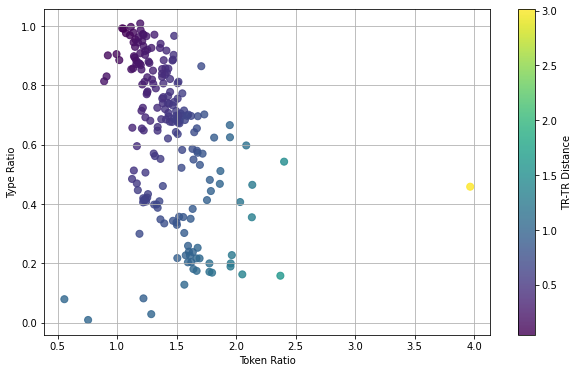

In [49]:
plot_ratios(stats)

In [22]:
stats["tr_tr_distance"].corr(cosine_distances["cosdist"])

0.17514440209168664

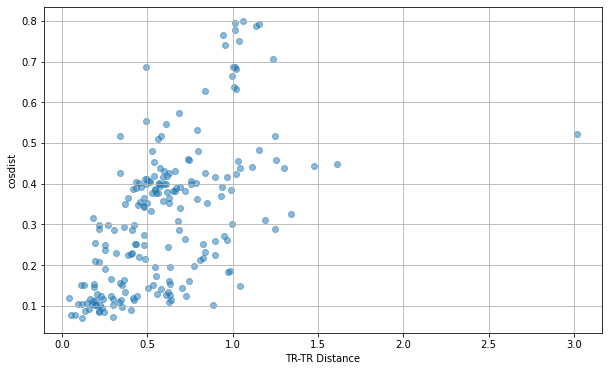

In [26]:
plot_distances(stats, cosine_distances, "cosdist")

In [23]:
stats["tr_tr_distance"].corr(xsim_scores["xsim"])

0.12109242221399791

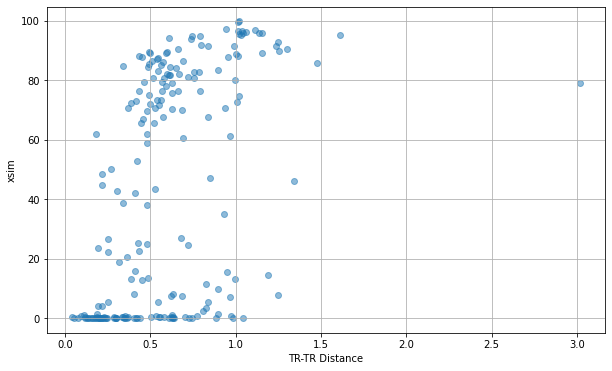

In [27]:
plot_distances(stats, xsim_scores, "xsim")

In [24]:
stats["tr_tr_distance"].corr(xsimpp_scores["xsim(++)"])

0.16523550386499908

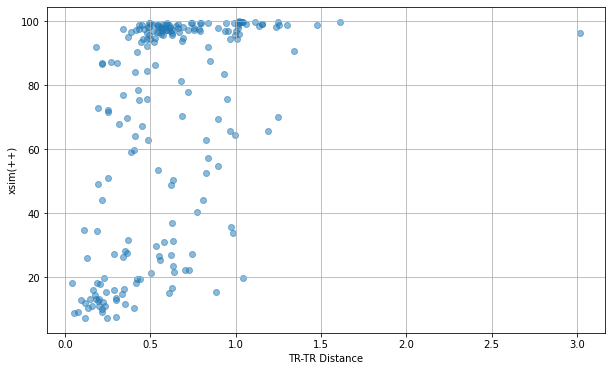

In [28]:
plot_distances(stats, xsimpp_scores, "xsim(++)")

#### Correlations to Latin-script languages

In [40]:
latn_stats = stats[stats["File"].str.contains("_Latn")]
latn_stats

File  lines  fertility  types  tokens  \
1    flores200__devtest__ace_Latn.devtest   1012   2.588006   3345   55197   
5    flores200__devtest__afr_Latn.devtest   1012   1.959232   3458   45223   
7    flores200__devtest__aka_Latn.devtest   1012   2.427915   2599   65022   
8    flores200__devtest__als_Latn.devtest   1012   2.058429   3371   50660   
12   flores200__devtest__arb_Latn.devtest   1012   2.945760   2761   65334   
..                                    ...    ...        ...    ...     ...   
195  flores200__devtest__wol_Latn.devtest   1012   2.157878   3199   54057   
196  flores200__devtest__xho_Latn.devtest   1012   3.587450   3031   55627   
198  flores200__devtest__yor_Latn.devtest   1012   3.009403   2479   75855   
202  flores200__devtest__zsm_Latn.devtest   1012   1.963146   3512   39632   
203  flores200__devtest__zul_Latn.devtest   1012   3.682864   2709   58285   

          ttr  urls  usernames  hashtags  urls_per_line  usernames_per_line  \
1    0.060601     0          0         0            0.0                 0.0   
5    0.076466     0          0         0            0.0                 0.0   
7    0.039971     0          0         0            0.0                 0.0   
8    0.066542     0          0         0            0.0                 0.0   
12   0.042260     0          0         0            0.0                 0.0   
..        ...   ...        ...       ...            ...                 ...   
195  0.059178     0          0         0            0.0                 0.0   
196  0.054488     0          0         0            0.0                 0.0   
198  0.032681     0          0         0            0.0                 0.0   
202  0.088615     0          0         0            0.0                 0.0   
203  0.046479     0          0         0            0.0                 0.0   

     hashtags_per_line  average_sentence_length  stddev_sentence_length  \
1                  0.0                54.542490               19.284565   
5                  0.0                44.686759               15.590223   
7                  0.0                64.250988               23.688030   
8                  0.0                50.059289               17.776068   
12                 0.0                64.559289               23.307394   
..                 ...                      ...                     ...   
195                0.0                53.416008               18.389287   
196                0.0                54.967391               19.139490   
198                0.0                74.955534               31.494322   
202                0.0                39.162055               13.382685   
203                0.0                57.593874               20.472098   

        mattr       hdd  type_ratio  token_ratio  tr_tr_distance  
1    0.364122  0.882688    0.842994     1.417816        0.446342  
5    0.448753  0.903987    0.871472     1.161619        0.206495  
7    0.271722  0.772386    0.654990     1.670186        0.753778  
8    0.448539  0.903459    0.849546     1.301277        0.336755  
12   0.361184  0.862324    0.695817     1.678200        0.743292  
..        ...       ...         ...          ...             ...  
195  0.386972  0.880320    0.806200     1.388534        0.434185  
196  0.436389  0.926439    0.763861     1.428861        0.489575  
198  0.252869  0.759664    0.624748     1.948447        1.019983  
202  0.495361  0.924020    0.885081     1.018006        0.116321  
203  0.422176  0.924319    0.682712     1.497136        0.589759  

[126 rows x 19 columns]

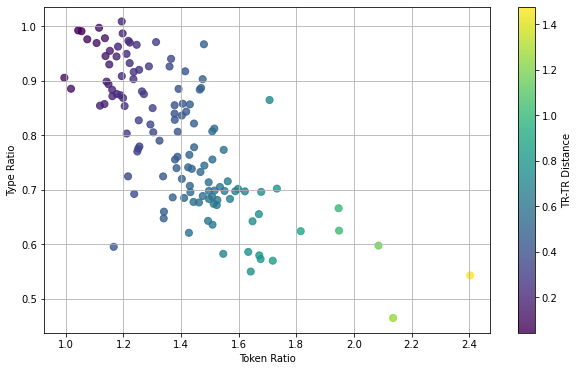

In [50]:
plot_ratios(latn_stats)

In [52]:
latn_cosine_distances = cosine_distances[cosine_distances["src-tgt"].str.contains("_Latn-eng_Latn")]
latn_xsim_scores = xsim_scores[xsim_scores["src-tgt"].str.contains("_Latn-eng_Latn")]
latn_xsimpp_scores = xsimpp_scores[xsimpp_scores["src-tgt"].str.contains("_Latn-eng_Latn")]

In [54]:
print(latn_stats["tr_tr_distance"].corr(latn_cosine_distances["cosdist"]))
print(latn_stats["tr_tr_distance"].corr(latn_xsim_scores["xsim"]))
print(latn_stats["tr_tr_distance"].corr(latn_xsimpp_scores["xsim(++)"]))

0.2620801023200746
0.28184158469549464
0.2747705327757902


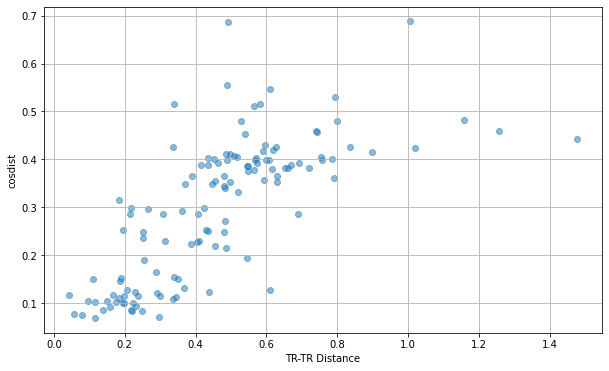

In [51]:
plot_distances(latn_stats, latn_cosine_distances, "cosdist")

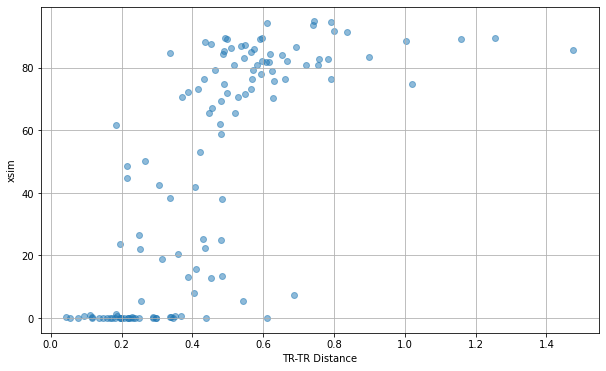

In [56]:
plot_distances(latn_stats, latn_xsim_scores, "xsim")

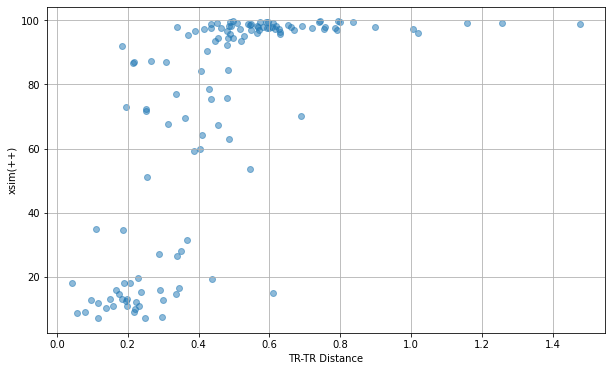

In [57]:
plot_distances(latn_stats, latn_xsimpp_scores, "xsim(++)")

#### Correlations wrt non-Latn-script languages

In [58]:
non_latn_stats = stats[~stats["File"].str.contains("_Latn")]
non_latn_cosine_distances = cosine_distances[~cosine_distances["src-tgt"].str.contains("_Latn-eng_Latn")]
non_latn_xsim_scores = xsim_scores[~xsim_scores["src-tgt"].str.contains("_Latn-eng_Latn")]
non_latn_xsimpp_scores = xsimpp_scores[~xsimpp_scores["src-tgt"].str.contains("_Latn-eng_Latn")]

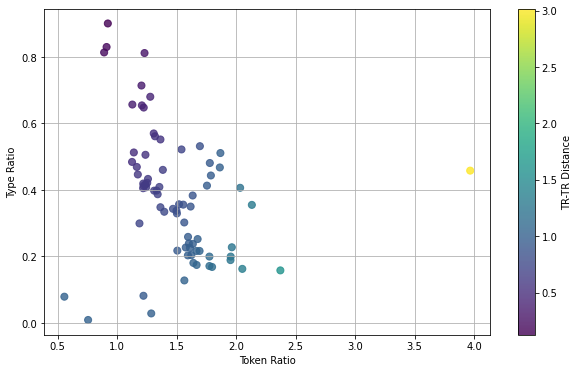

In [59]:
plot_ratios(non_latn_stats)

In [61]:
print(non_latn_stats["tr_tr_distance"].corr(non_latn_cosine_distances["cosdist"]))
print(non_latn_stats["tr_tr_distance"].corr(non_latn_xsim_scores["xsim"]))
print(non_latn_stats["tr_tr_distance"].corr(non_latn_xsimpp_scores["xsim(++)"]))

0.18690983283262583
0.175678329277121
0.20028735837013065


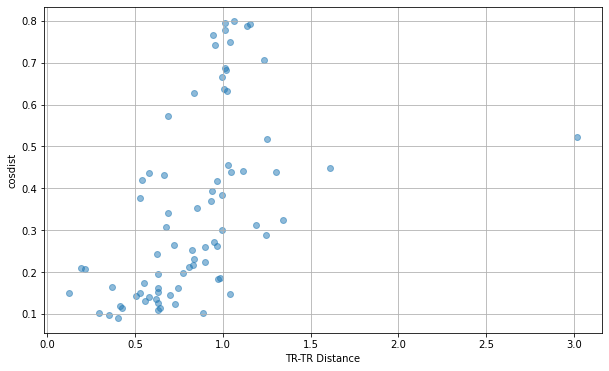

In [62]:
plot_distances(non_latn_stats, non_latn_cosine_distances, "cosdist")

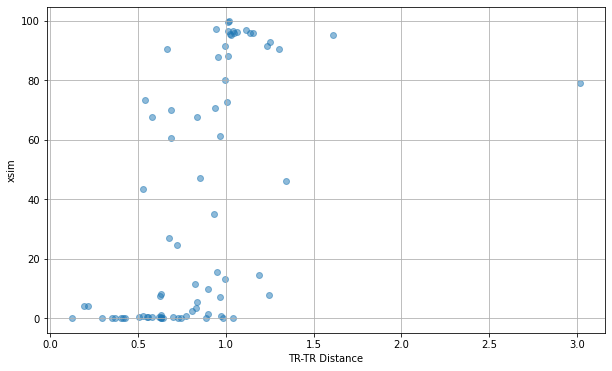

In [64]:
plot_distances(non_latn_stats, non_latn_xsim_scores, "xsim")

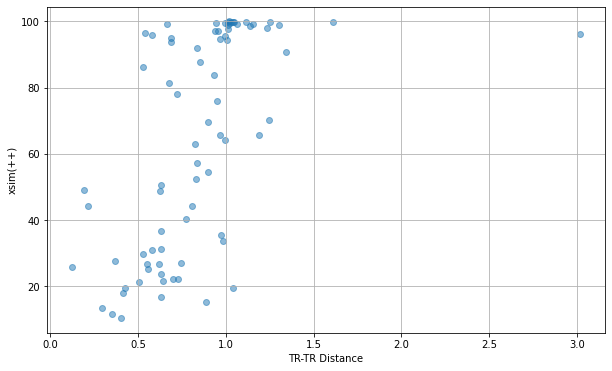

In [63]:
plot_distances(non_latn_stats, non_latn_xsimpp_scores, "xsim(++)")

### Quantiles

In [ ]:
quantiles = [
    {
        "quantile": x,
        "cosdist": cosine_distances['cosdist'].quantile(x/100),
        "xsim": xsim_scores['xsim'].quantile(x/100),
        "xsim++": xsimpp_scores['xsim(++)'].quantile(x/100),
    } for x in range(0,101,5)
]

In [ ]:
quantiles_df = pd.DataFrame(quantiles)
quantiles_df.to_csv("/home/lnishimw/scratch/LASER/tasks/_scores/all_quantiles.csv")

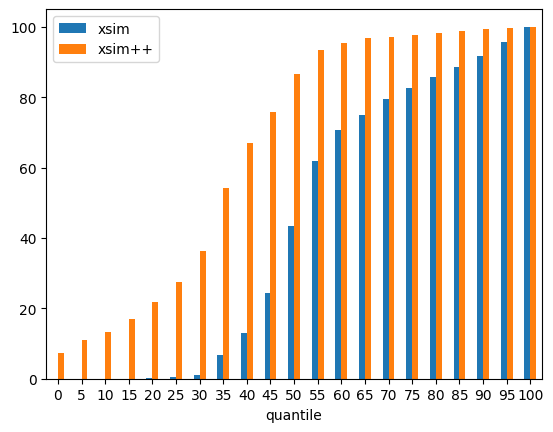

In [ ]:
quantiles_df.plot.bar(x='quantile', y=['xsim', 'xsim++'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/xsim_xsimpp_quantiles.pdf", format="pdf")

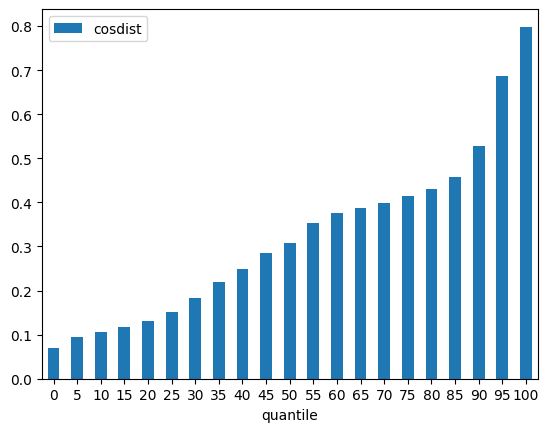

In [ ]:
quantiles_df.plot.bar(x='quantile', y=['cosdist'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/cos_quantiles.pdf", format="pdf")

### 5 RoCS-MT languages

In [ ]:
cosine_distances_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/cosine_distance_matrix.csv")
cosine_distances_5 = cosine_distances_5[cosine_distances_5["src-tgt"]!="average"]
cosine_distances_5


FileNotFoundError: [Errno 2] No such file or directory: '/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/cosine_distance_matrix.csv'

In [ ]:
r_cosine_distances_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/rsim_5/cosine_distance_matrix.csv")
r_cosine_distances_5 = r_cosine_distances_5[r_cosine_distances_5["src-tgt"]!="average"]
r_cosine_distances_5

Unnamed: 0 dataset         src-tgt   cosdist  nbex
0           0  rocsmt  raw.en-norm.en  0.130927  1922
1           1  rocsmt  ref.cs-norm.en  0.191921  1922
2           2  rocsmt  ref.de-norm.en  0.202451  1922
3           3  rocsmt  ref.fr-norm.en  0.193707  1922
4           4  rocsmt  ref.ru-norm.en  0.225688  1922
5           5  rocsmt  ref.uk-norm.en  0.187596  1922

In [ ]:
xsim_scores_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/xsim_matrix.csv")
xsim_scores_5 = xsim_scores_5[xsim_scores_5["src-tgt"]!="average"]
xsim_scores_5

Unnamed: 0 dataset         src-tgt  xsim  nbex
0           0  rocsmt  raw.en-norm.en  4.06  1922
1           1  rocsmt  ref.cs-norm.en  3.28  1922
2           2  rocsmt  ref.de-norm.en  0.83  1922
3           3  rocsmt  ref.fr-norm.en  4.68  1922
4           4  rocsmt  ref.ru-norm.en  5.93  1922
5           5  rocsmt  ref.uk-norm.en  2.39  1922

In [ ]:
rsim_scores_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/rsim_5/xsim_matrix.csv")
rsim_scores_5 = rsim_scores_5[rsim_scores_5["src-tgt"]!="average"]
rsim_scores_5

Unnamed: 0 dataset         src-tgt   xsim  nbex
0           0  rocsmt  raw.en-norm.en   7.96  1922
1           1  rocsmt  ref.cs-norm.en   7.70  1922
2           2  rocsmt  ref.de-norm.en   8.48  1922
3           3  rocsmt  ref.fr-norm.en   8.64  1922
4           4  rocsmt  ref.ru-norm.en  10.98  1922
5           5  rocsmt  ref.uk-norm.en   5.93  1922

In [ ]:
df_rocsmt = pd.DataFrame()
df_rocsmt[['src-tgt', 'cosdist']] = cosine_distances_5[['src-tgt', 'cosdist']]
df_rocsmt['r-cosdist'] = r_cosine_distances_5['cosdist']
df_rocsmt['xsim'] = xsim_scores_5['xsim']
df_rocsmt['rsim'] = rsim_scores_5['xsim']
df_rocsmt['src'] = df_rocsmt['src-tgt'].apply(lambda x: x[:6])

In [ ]:
df_rocsmt.sort_values(by=['cosdist'])

src-tgt   cosdist  r-cosdist  xsim   rsim     src
0  raw.en-norm.en  0.094007   0.130927  4.06   7.96  raw.en
2  ref.de-norm.en  0.111113   0.202451  0.83   8.48  ref.de
1  ref.cs-norm.en  0.149487   0.191921  3.28   7.70  ref.cs
5  ref.uk-norm.en  0.151771   0.187596  2.39   5.93  ref.uk
3  ref.fr-norm.en  0.160926   0.193707  4.68   8.64  ref.fr
4  ref.ru-norm.en  0.189940   0.225688  5.93  10.98  ref.ru

In [ ]:
df_rocsmt

src-tgt   cosdist  r-cosdist  xsim   rsim     src
0  raw.en-norm.en  0.094007   0.130927  4.06   7.96  raw.en
1  ref.cs-norm.en  0.149487   0.191921  3.28   7.70  ref.cs
2  ref.de-norm.en  0.111113   0.202451  0.83   8.48  ref.de
3  ref.fr-norm.en  0.160926   0.193707  4.68   8.64  ref.fr
4  ref.ru-norm.en  0.189940   0.225688  5.93  10.98  ref.ru
5  ref.uk-norm.en  0.151771   0.187596  2.39   5.93  ref.uk

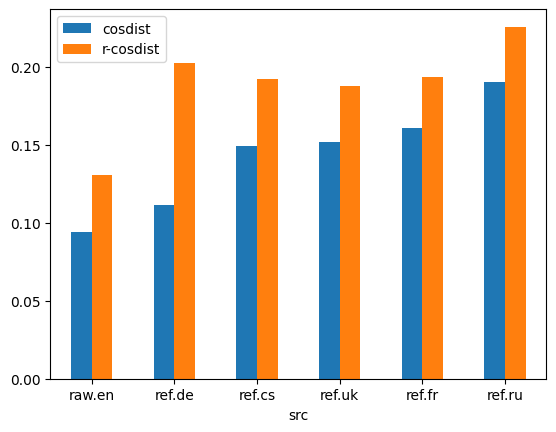

In [ ]:
df_rocsmt.sort_values(by=['cosdist']).plot.bar(x='src', y=['cosdist', 'r-cosdist'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/cosdist_rocsmt.pdf", format="pdf")

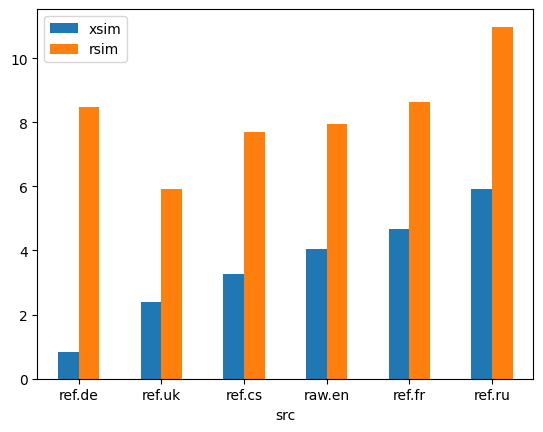

In [ ]:
df_rocsmt.sort_values(by=['xsim']).plot.bar(x='src', y=['xsim', 'rsim'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/xsim_rocsmt.pdf", format="pdf")

### BUCC

In [ ]:
bucc = pd.DataFrame(columns=["lang-pair", "original", "no preprocessing"])

In [ ]:
bucc["lang-pair"] = [ "de-en", "fr-en", "ru-en", "zh-en" ]
bucc["original"] = [ 0.9921016005567153, 0.9838946364370093, 0.9762152176423046, 0.9770054414604177 ]
bucc["no preprocessing"] = [ 0.8336464857341683, 0.9450253136693815, 0.9560327906708231, 0.9366333157802351 ]

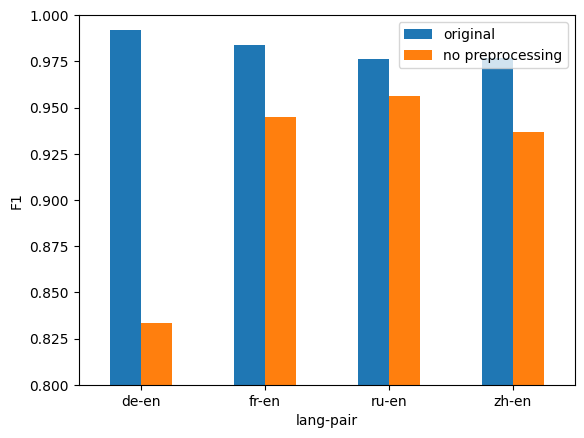

In [ ]:
bucc.plot.bar(x='lang-pair', y=['original', 'no preprocessing'], rot=0, ylim=(0.8, 1), ylabel="F1")
plt.savefig("/home/lnishimw/scratch/LASER/tasks/bucc_scores.pdf", format="pdf")

# Visualisation of embedding space

In [ ]:
import os, json
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, paired_euclidean_distances, paired_cosine_distances
from scipy.stats import spearmanr

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-

In [ ]:
def read_embeddings(input_file, dim=1024, normalized=True):
    X = np.fromfile(input_file, dtype=np.float32, count=-1)
    X = np.resize(X, (X.shape[0] // dim, dim))
    if normalized:
        X = normalize(X)
    return X


In [ ]:
def get_visualization_dataframe(src_file, ref_file, model, src_type="ugc", ref_type="std", seed=0):
    X_src = read_embeddings(src_file)
    X_ref = read_embeddings(ref_file)
    X = np.concatenate([X_ref, X_src])
    pca = PCA(n_components=2, random_state=seed)
    umap = UMAP(n_components=2, init='random', random_state=seed)
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=20, random_state=seed)
    data = pd.DataFrame()
    data[["PCA dim 1", "PCA dim 2"]] = pca.fit_transform(X)
    data[["t-SNE dim 1", "t-SNE dim 2"]] = tsne.fit_transform(X)
    data[["UMAP dim 1", "UMAP dim 2"]] = umap.fit_transform(X)
    data["model"] = np.repeat([model], X.shape[0])
    data["type"] = np.repeat([ref_type, src_type], X_ref.shape[0])
    data["sentence"] = [ f"sent {i%X_ref.shape[0]}" for i in range(X.shape[0]) ]
    return X, data


In [ ]:
def get_visualization_dataframe_3D(src_file, ref_file, model, src_type="ugc", ref_type="std", seed=0):
    X_src = read_embeddings(src_file)
    X_ref = read_embeddings(ref_file)
    X = np.concatenate([X_ref, X_src])
    pca = PCA(n_components=3, random_state=seed)
    data = pd.DataFrame()
    data[["PCA dim 1", "PCA dim 2", "PCA dim 3"]] = pca.fit_transform(X)
    data["model"] = np.repeat([model], X.shape[0])
    data["type"] = np.repeat([ref_type, src_type], X_ref.shape[0])
    data["sentence"] = [ f"sent {i%X_ref.shape[0]}" for i in range(X.shape[0]) ]
    return X, data

In [ ]:
flores_dev_leet = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc = "/home/lnishimw/scratch/experiments/robust_embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_Latn.dev"
rocsmt_raw = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/laser/rocsmt/test/raw.en.test"
rocsmt_norm = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/laser/rocsmt/test/norm.en.test"
multilexnorm_src = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/multilexnorm2021/test/cleaned.en.ref.test"


In [ ]:
flores_dev_leet_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student-init/flores200/devtest/eng_Latn.devtest"
rocsmt_raw_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student-init/rocsmt/test/raw.en.test"
rocsmt_norm_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student-init/rocsmt/test/norm.en.test"
multilexnorm_src_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student-init/multilexnorm2021/en/test/en.ref.test"

In [ ]:
flores_dev_leet_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/character-roberta-student-init/flores200/devtest/eng_Latn.devtest"
rocsmt_raw_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/embeddings/character-roberta-student-init/rocsmt/test/raw.en.test"
rocsmt_norm_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/embeddings/character-roberta-student-init/rocsmt/test/norm.en.test"
multilexnorm_src_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/character-roberta-student-init/multilexnorm2021/en/test/en.ref.test"

In [ ]:
plots_path = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/plots"
os.makedirs(plots_path, exist_ok=True)

In [ ]:
plt.figure(dpi=1200) 

<Figure size 7680x5760 with 0 Axes>

<Figure size 7680x5760 with 0 Axes>

In [ ]:
src_file = rocsmt_raw
ref_file = rocsmt_norm
model="LASER"
X, data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


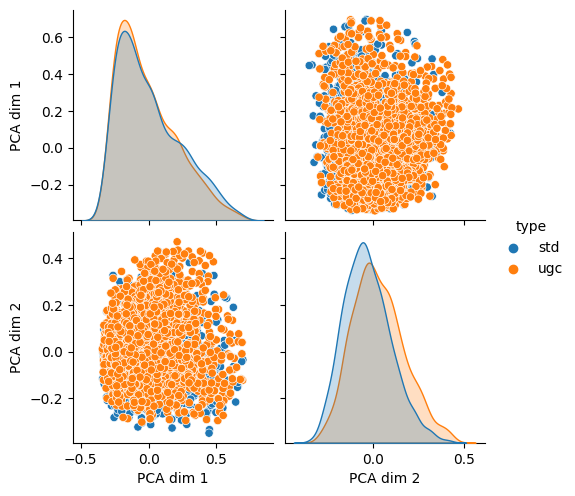

In [ ]:
sns.pairplot(data[["PCA dim 1", "PCA dim 2", "type"]], hue="type")
#plt.savefig(f"{plots_path}/pca_pairplot_{model}.png")

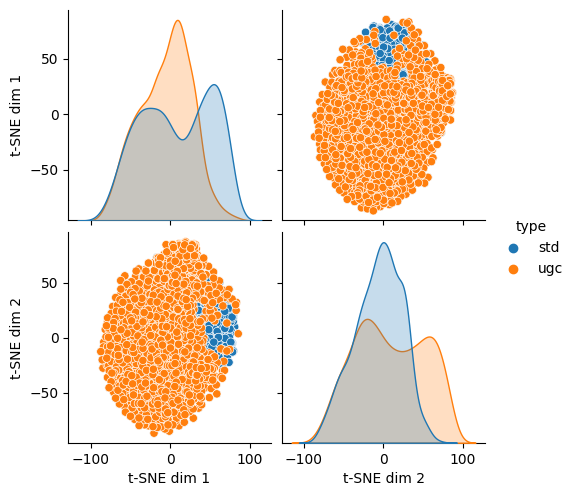

In [ ]:
sns.pairplot(data[["t-SNE dim 1", "t-SNE dim 2", "type"]], hue="type")
plt.savefig(f"{plots_path}/tsne_pairplot_{model}.png")

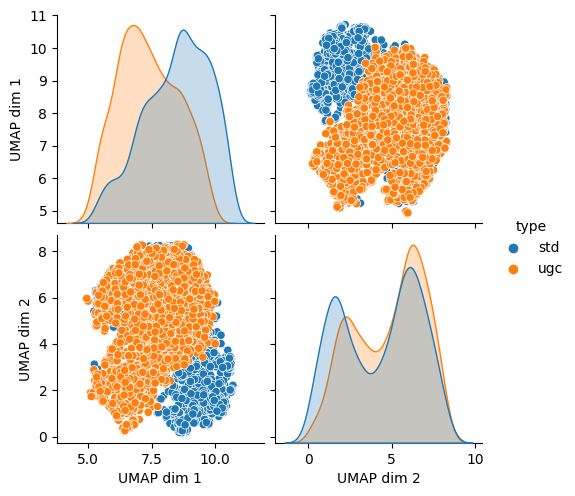

In [ ]:
sns.pairplot(data[["UMAP dim 1", "UMAP dim 2", "type"]], hue="type")
plt.savefig(f"{plots_path}/umap_pairplot_{model}.png")

## Qualitative analysis

In [ ]:
def plot_circles(ax, data, dim_reduction="PCA"):
    if dim_reduction == "UMAP":
        columns = ["UMAP dim 1", "UMAP dim 2"]
    elif dim_reduction == "t-SNE":
        columns = ["t-SNE dim 1", "t-SNE dim 2"]
    else:
        columns = ["PCA dim 1", "PCA dim 2"]
    laser_std_row = data.loc[((data['model'] == 'LASER') & (data['type'] == 'std'))]
    circle_center = laser_std_row[columns].to_numpy().flatten()
    for i, row in data.iterrows():
        point_b = row[columns].to_numpy()
        radius = paired_euclidean_distances(circle_center.reshape(1, -1), point_b.reshape(1, -1))[0]
        ax.add_patch(plt.Circle(circle_center, radius, alpha=0.2, color='xkcd:lightblue'))
    sns.scatterplot(data, x=columns[0], y=columns[1], hue="model", style="type", s=50, linewidth=0, ax=ax)

In [ ]:
def plot_langs(ax, data, dim_reduction="PCA", x_offset=0, y_offset=0):
    if dim_reduction == "UMAP":
        columns = ["UMAP dim 1", "UMAP dim 2"]
    elif dim_reduction == "t-SNE":
        columns = ["t-SNE dim 1", "t-SNE dim 2"]
    else:
        columns = ["PCA dim 1", "PCA dim 2"]
    # sns.scatterplot(data, x=columns[0], y=columns[1], c="tab:purple", marker="s", linewidth=0, ax=ax)
    for _, row in data.iterrows():
        ax.text(row[columns[0]] + x_offset, row[columns[1]] + y_offset, row["lang"], c="tab:blue")

In [ ]:
def distance_preservation_correlation(X1, data1, X2=None, data2=None):
    if X2 is None:
        X2 = X1
    if data2 is None:
        data2 = data1
    dist_orig = np.square(euclidean_distances(X1, X2)).flatten()
    dist_pca = np.square(euclidean_distances(data1[["PCA dim 1","PCA dim 2"]], data2[["PCA dim 1","PCA dim 2"]])).flatten()
    # dist_tsne = np.square(euclidean_distances(data1[["t-SNE dim 1","t-SNE dim 2"]], data2[["t-SNE dim 1","t-SNE dim 2"]])).flatten()
    # dist_umap = np.square(euclidean_distances(data1[["UMAP dim 1","UMAP dim 2"]], data2[["UMAP dim 1","UMAP dim 2"]])).flatten()
    print("PCA", spearmanr(dist_orig, dist_pca))
    # print("t-SNE", spearmanr(dist_orig, dist_tsne))
    # print("UMAP", spearmanr(dist_orig, dist_umap))


In [ ]:
norm_en_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/norm.en.test.bin"
raw_en_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/raw.en.test.bin"
ref_cs_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.cs.test.bin"
ref_de_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.de.test.bin"
ref_fr_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.fr.test.bin"
ref_ru_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.ru.test.bin"
ref_uk_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.uk.test.bin"

### Std-UGC data

In [ ]:
src_file = raw_en_laser
ref_file = norm_en_laser
model="LASER"
X_laser, laser_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [ ]:
src_file = rocsmt_raw_roberta
ref_file = rocsmt_norm_roberta
model="RoLASER"
X_roberta, roberta_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [ ]:
src_file = rocsmt_raw_c_roberta
ref_file = rocsmt_norm_c_roberta
model="c-RoLASER"
X_c_roberta, c_roberta_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### Multilingual data

In [ ]:
noisy_files = [
    {
        "file": raw_en_laser,
        "model": "LASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_raw_roberta,
        "model": "RoLASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_norm_roberta,
        "model": "RoLASER",
        "type": "std"
    },
    {
        "file": rocsmt_raw_c_roberta,
        "model": "c-RoLASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_norm_c_roberta,
        "model": "c-RoLASER",
        "type": "std"
    }
]

In [ ]:
multilingual_files = {
    "en": norm_en_laser,
    "cs": ref_cs_laser,
    "de": ref_de_laser,
    "fr": ref_fr_laser,
    "ru": ref_ru_laser,
    "uk": ref_uk_laser
}


In [ ]:
seed = 0
X_multi_files = [ read_embeddings(file) for file in multilingual_files.values() ] 
X_noisy_files = [ read_embeddings(file["file"]) for file in noisy_files ]
X = np.concatenate(X_multi_files + X_noisy_files)

n_sentences =  X_multi_files[0].shape[0]

X_multi_models = np.repeat(["LASER"], n_sentences * len(X_multi_files))
X_noisy_models = np.repeat([file["model"] for file in noisy_files], n_sentences)

X_multi_langs = np.repeat(list(multilingual_files.keys()), n_sentences)
X_noisy_langs = np.repeat(["en"], n_sentences * len(X_noisy_files))

X_multi_types = np.repeat(["std"] + ["tra"]*(len(X_multi_files)-1), n_sentences)
X_noisy_types = np.repeat([file["type"] for file in noisy_files], n_sentences)

pca = PCA(n_components=2, random_state=seed)
# umap = UMAP(n_components=2, init='random', random_state=seed)
# tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=20, random_state=seed)

data = pd.DataFrame()
data[["PCA dim 1", "PCA dim 2"]] = pca.fit_transform(X)
# data[["t-SNE dim 1", "t-SNE dim 2"]] = tsne.fit_transform(X)
# data[["UMAP dim 1", "UMAP dim 2"]] = umap.fit_transform(X)
data["model"] = np.concatenate([X_multi_models, X_noisy_models])
data["lang"] = np.concatenate([X_multi_langs, X_noisy_langs])
data["type"] = np.concatenate([X_multi_types, X_noisy_types])
data["sentence"] = [ f"sent {i%n_sentences}" for i in range(X.shape[0]) ]


In [ ]:
data[data["type"] == "tra"]

PCA dim 1  PCA dim 2  model lang type   sentence
1922   -0.188540  -0.087324  LASER   cs  tra     sent 0
1923   -0.106338   0.009743  LASER   cs  tra     sent 1
1924    0.306285   0.074233  LASER   cs  tra     sent 2
1925   -0.284780  -0.026221  LASER   cs  tra     sent 3
1926   -0.292116  -0.102227  LASER   cs  tra     sent 4
...          ...        ...    ...  ...  ...        ...
11527   0.026458  -0.105538  LASER   uk  tra  sent 1917
11528  -0.048783  -0.070403  LASER   uk  tra  sent 1918
11529  -0.051903  -0.149239  LASER   uk  tra  sent 1919
11530   0.145668  -0.024090  LASER   uk  tra  sent 1920
11531  -0.104402  -0.018909  LASER   uk  tra  sent 1921

[9610 rows x 6 columns]

## Dimension reduction

In [ ]:
examples = [
    {
        "id": 986,
        "ugc": "eye wud liek 2 aply 4 vilage idot",
        "std": "I would like to apply for village idiot.",
        "len": "mid1"
    },
    {
        "id": 760,
        "ugc": "But tmrw im no longer putting up with it.",
        "std": "But tomorrow I’m no longer putting up with it.",
        "len": "mid2"       
    },
    {
        "id": 1027,
        "ugc": 'im not a fan of rightwing stuff n was acctully de reason i stopd watching it 2 years ago tho the small fragrence of freedom was dät hard tu find amoung the 90% national-capitalism de site has tu offer, but anyhow i got d idea of a non censoring video site like liveleak but much more simple n less "newsy" dät any1 can post on no content wud b removed❤️',
        "std": "I’m not a fan of rightwing stuff and was actually the reason I stopped watching it 2 years ago, though the small fragrance of freedom was that hard to find among the 90% national-capitalism the site has to offer, but anyhow, I got the idea of a non-censoring video site like LiveLeak but much more simple and less “newsy” that anyone can post on. No content would be removed ❤️",
        "len": "long"
    },
    {
        "id": 1028,
        "ugc": "Hi guys",
        "std": "Hi guys.",
        "len": "short"
    },
    {
        "id": 128,
        "ugc": "I then lost interest in her bc her IG wasn't that interesting.",
        "std": "I then lost interest in her, because her Instagram wasn’t that interesting.",
        "len": "mid3"
    },
    {
        "id": 834,
        "ugc": "So they waked around school and they becam friends.",
        "std": "So they walked around school and they became friends.",
        "len": "mid4"
    },

]


In [ ]:
n_ex = 0

In [ ]:
subset = data[data["sentence"] == f"sent {examples[n_ex]['id']}"]

In [ ]:
# sort subset by type in this order: std, ugc, tra
subset = subset.loc[subset["type"].map({"std": 1, "ugc": 2, "tra": 3}).sort_values().index]
subset

PCA dim 1  PCA dim 2      model lang type  sentence
986     0.123743   0.000114      LASER   en  std  sent 986
16362   0.053748   0.033213    RoLASER   en  std  sent 986
20206  -0.152305   0.433791  c-RoLASER   en  std  sent 986
12518  -0.065503   0.161479      LASER   en  ugc  sent 986
14440   0.122426  -0.034038    RoLASER   en  ugc  sent 986
18284  -0.184489   0.485215  c-RoLASER   en  ugc  sent 986
2908    0.073737   0.013417      LASER   cs  tra  sent 986
4830    0.099893   0.039361      LASER   de  tra  sent 986
6752    0.044591  -0.071860      LASER   fr  tra  sent 986
8674    0.083227  -0.052634      LASER   ru  tra  sent 986
10596  -0.075603  -0.077258      LASER   uk  tra  sent 986

In [ ]:
subset_multi = subset[subset["type"] == "tra"]
subset_multi

PCA dim 1  PCA dim 2  model lang type  sentence
2908    0.073737   0.013417  LASER   cs  tra  sent 986
4830    0.099893   0.039361  LASER   de  tra  sent 986
6752    0.044591  -0.071860  LASER   fr  tra  sent 986
8674    0.083227  -0.052634  LASER   ru  tra  sent 986
10596  -0.075603  -0.077258  LASER   uk  tra  sent 986

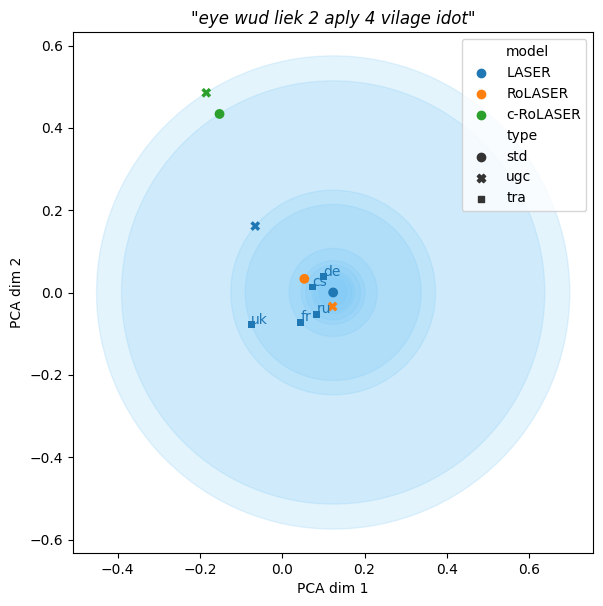

In [ ]:
from textwrap import wrap
MAX_LEN = 80
fig, ax1 = plt.subplots(figsize=(6,6))
plot_circles(ax1, subset)
plot_langs(ax1, subset_multi, x_offset=0.0002, y_offset=0.002)
title_ugc = f'"{examples[n_ex]["ugc"][:MAX_LEN]}"'
title_std = f"{examples[n_ex]['std'][:MAX_LEN]}"
ax1.set_title(title_ugc, fontsize=12, loc='center', style='italic')
# set subtitle
#plt.suptitle(title_ugc, fontsize=12, y=0.99, x=0.55, style='italic')
ax1.set_aspect("equal")
ax1.legend(loc='upper right')
fig.tight_layout(pad=0.5)
plt.savefig(f"{plots_path}/pca_distances_{examples[n_ex]['len']}.pdf", format="pdf")



In [ ]:
distance_preservation_correlation(X_laser, laser_data)

PCA SpearmanrResult(correlation=0.6989611352600602, pvalue=0.0)


In [ ]:
distance_preservation_correlation(X_roberta, roberta_data)

PCA SpearmanrResult(correlation=0.6893637841903875, pvalue=0.0)


In [ ]:
distance_preservation_correlation(X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.6619320693281097, pvalue=0.0)


In [ ]:
(0.6989611352600602 + 0.6893637841903875 + 0.687845268565536)/3

0.6920567293386611

In [ ]:
distance_preservation_correlation(X_laser, laser_data, X_roberta, roberta_data)

PCA SpearmanrResult(correlation=0.38195282160472616, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.3741878710283902, pvalue=0.0)
UMAP SpearmanrResult(correlation=0.007761505725226752, pvalue=1.4721199622448286e-204)


In [ ]:
distance_preservation_correlation(X_laser, laser_data, X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.4922625311122613, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.306934157077937, pvalue=0.0)
UMAP SpearmanrResult(correlation=-0.6122645614581149, pvalue=0.0)


In [ ]:
distance_preservation_correlation(X_roberta, roberta_data, X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.4892781155237972, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.3855124100397888, pvalue=0.0)
UMAP SpearmanrResult(correlation=-0.4066868847925667, pvalue=0.0)


### Cosine distances

In [ ]:
X_laser.shape[0]//2

1922

In [ ]:
n = X_laser.shape[0]//2
X_laser_std = X_laser[:n,:]
X_laser_ugc = X_laser[n:,:]
cos_dist_laser = paired_cosine_distances(X_laser_std, X_laser_ugc)

In [ ]:
X_c_roberta_std = X_c_roberta[:n,:]
X_c_roberta_ugc = X_c_roberta[n:,:]
cos_dist_c_roberta = paired_cosine_distances(X_c_roberta_std, X_c_roberta_ugc)

In [ ]:
X_roberta_std = X_roberta[:n,:]
X_roberta_ugc = X_roberta[n:,:]
cos_dist_roberta = paired_cosine_distances(X_roberta_std, X_roberta_ugc)

In [ ]:
cos_dist_laser_roberta = paired_cosine_distances(X_laser_std, X_roberta_std)
cos_dist_laser_roberta_ugc = paired_cosine_distances(X_laser_std, X_roberta_ugc)
cos_dist_laser_c_roberta = paired_cosine_distances(X_laser_std, X_c_roberta_std)
cos_dist_laser_c_roberta_ugc = paired_cosine_distances(X_laser_std, X_c_roberta_ugc)

In [ ]:
distances = pd.DataFrame()
distances["cos-laser"] = cos_dist_laser
distances["cos-roberta"] = cos_dist_roberta
distances["cos-c-roberta"] = cos_dist_c_roberta
distances["cos-laser-roberta"] = cos_dist_laser_roberta
distances["cos-laser-c-roberta"] = cos_dist_laser_c_roberta
distances["cos-laser-roberta-ugc"] = cos_dist_laser_roberta_ugc
distances["cos-laser-c-roberta-ugc"] = cos_dist_laser_c_roberta_ugc

In [ ]:
distances.describe()

cos-laser  cos-roberta  cos-c-roberta  cos-laser-roberta  \
count  1922.000000  1922.000000    1922.000000        1922.000000   
mean      0.094007     0.064786       0.044300           0.048574   
std       0.119788     0.090927       0.057045           0.040280   
min       0.000000     0.000000       0.000007           0.010895   
25%       0.015515     0.008281       0.005890           0.022469   
50%       0.056402     0.035058       0.026995           0.033976   
75%       0.117035     0.080964       0.058990           0.060523   
max       0.795212     0.712171       0.600433           0.455087   

       cos-laser-c-roberta  cos-laser-roberta-ugc  cos-laser-c-roberta-ugc  
count          1922.000000            1922.000000              1922.000000  
mean              0.204884               0.103932                 0.247515  
std               0.128582               0.096561                 0.150384  
min               0.018311               0.012217                 0.025674  
25%               0.112548               0.042063                 0.136739  
50%               0.174064               0.072336                 0.211741  
75%               0.267552               0.127076                 0.328486  
max               0.839807               0.744588                 1.002839

In [ ]:
distances[distances["cos-laser"]>=0.01].sort_values(by="cos-laser-roberta-ugc", ascending=True).head(20)

cos-laser  cos-roberta  cos-c-roberta  cos-laser-roberta  \
380    0.017173     0.000890       0.011038           0.016317   
1632   0.016781     0.006904       0.008821           0.013778   
697    0.012207     0.008414       0.004456           0.014306   
638    0.024771     0.008115       0.002345           0.014548   
696    0.019605     0.003276       0.002886           0.018269   
918    0.011770     0.005076       0.004340           0.016574   
1412   0.052296     0.001198       0.010756           0.020544   
522    0.021670     0.010202       0.005700           0.012638   
444    0.034586     0.005252       0.006579           0.017770   
132    0.010466     0.007850       0.001513           0.016362   
1545   0.021941     0.009463       0.008088           0.015093   
65     0.034086     0.007367       0.018850           0.018029   
340    0.018851     0.011340       0.013196           0.012887   
1781   0.018944     0.014661       0.019609           0.011170   
322    0.014856     0.003586       0.003128           0.020319   
99     0.013649     0.011149       0.008091           0.014930   
193    0.015076     0.014076       0.012837           0.017589   
1428   0.012841     0.006256       0.009266           0.016982   
652    0.011175     0.005582       0.004146           0.019974   
66     0.015631     0.007632       0.016105           0.018618   

      cos-laser-c-roberta  cos-laser-roberta-ugc  cos-laser-c-roberta-ugc  
380              0.052964               0.016907                 0.051116  
1632             0.026452               0.019758                 0.033203  
697              0.071541               0.020342                 0.072840  
638              0.081186               0.020523                 0.078375  
696              0.132249               0.021015                 0.138076  
918              0.101784               0.021077                 0.110042  
1412             0.139491               0.021133                 0.162166  
522              0.023642               0.022143                 0.031762  
444              0.113560               0.022531                 0.123144  
132              0.029096               0.022542                 0.029684  
1545             0.034275               0.022555                 0.043884  
65               0.027907               0.022969                 0.044566  
340              0.032856               0.022981                 0.042310  
1781             0.021767               0.023320                 0.029049  
322              0.101956               0.023515                 0.107072  
99               0.063150               0.023519                 0.069814  
193              0.065169               0.023601                 0.078121  
1428             0.070071               0.023702                 0.074581  
652              0.107761               0.023706                 0.108874  
66               0.037516               0.023786                 0.054311

In [ ]:
# get the value at index 986
distances.loc[986]

cos-laser                  0.568843
cos-roberta                0.211908
cos-c-roberta              0.144618
cos-laser-roberta          0.057915
cos-laser-c-roberta        0.246253
cos-laser-roberta-ugc      0.231736
cos-laser-c-roberta-ugc    0.435890
Name: 986, dtype: float32

In [ ]:
distances[(distances["cos"] >= 0.10) & (distances["cos"] <= 0.11)]

cos
53    0.103117
63    0.105700
147   0.100668
213   0.101974
214   0.107443
219   0.102251
263   0.106156
272   0.104734
306   0.104031
314   0.108696
368   0.102060
411   0.102805
558   0.100221
626   0.103183
683   0.104711
756   0.101723
795   0.105460
798   0.103254
839   0.104106
855   0.100687
870   0.103726
1021  0.101200
1026  0.104794
1058  0.108625
1084  0.108537
1091  0.102854
1106  0.101352
1166  0.104593
1212  0.102201
1243  0.107484
1247  0.102151
1285  0.105634
1288  0.108657
1298  0.107984
1304  0.108847
1315  0.102466
1362  0.105855
1460  0.101585
1461  0.104273
1492  0.102960
1527  0.105017
1529  0.108504
1530  0.109009
1532  0.108326
1551  0.109627
1567  0.101451
1594  0.106363
1874  0.100051
1880  0.103162
1916  0.108116

In [ ]:
distances.describe()

cos
count  1922.000000
mean      0.094007
std       0.119788
min       0.000000
25%       0.015515
50%       0.056402
75%       0.117035
max       0.795212

<AxesSubplot: ylabel='Density'>

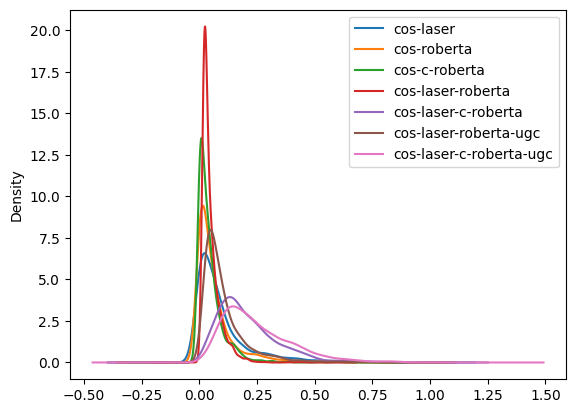

In [ ]:
distances.plot.density()

<AxesSubplot: ylabel='Frequency'>

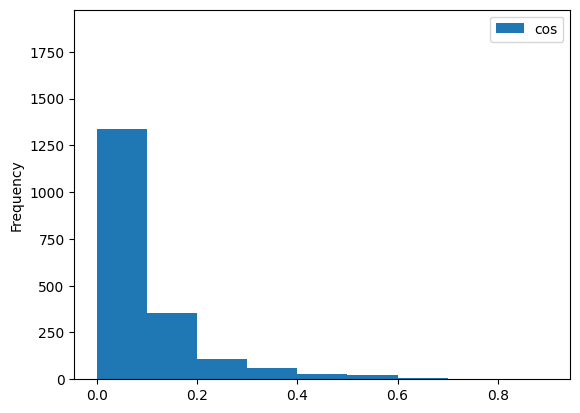

In [ ]:
distances.plot.hist(bins=[i/10 for i in range(10)], ylim=(0,1975))

In [ ]:
[i/10 for i in range(10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
distances[distances["cos"] == 0].size #/ distances.size

0.24720244150559512

## Student v. LASER on standard data

In [ ]:
experiment_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak"
embeddings_dir = os.path.join(experiment_dir, "embeddings")
plots_dir = os.path.join(experiment_dir, "plots")
os.makedirs(plots_dir, exist_ok=True)
scores_dir = os.path.join(experiment_dir, "scores")
os.makedirs(scores_dir, exist_ok=True)

In [ ]:
FILES = {
    "flores200" : {},
    "rocsmt" : {},
    "multilexnorm2021" : {},
}

In [ ]:
CORPORA = list(FILES.keys())

In [ ]:
MODEL_NAMES = {
    "laser" : "LASER",
    "roberta-student-init" : "RoLASER",
    "character-roberta-student-init" : "c-RoLASER",
}

In [ ]:
MODELS = list(MODEL_NAMES.keys())

In [ ]:
MODELS

['laser', 'roberta-student-init', 'character-roberta-student-init']

In [ ]:
for model in MODELS:
    FILES["flores200"][model] = os.path.join(embeddings_dir, model, "flores200/devtest/eng_Latn.devtest")
    FILES["rocsmt"][model] = os.path.join(embeddings_dir, model, "rocsmt/test/norm.en.test")
    FILES["multilexnorm2021"][model] = os.path.join(embeddings_dir, model, "multilexnorm2021/en/test/en.ref.test")


In [ ]:
FILES

{'flores200': {'laser': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/embeddings/laser/flores200/devtest/eng_Latn.devtest',
  'roberta-student-init': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/embeddings/roberta-student-init/flores200/devtest/eng_Latn.devtest',
  'character-roberta-student-init': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/embeddings/character-roberta-student-init/flores200/devtest/eng_Latn.devtest'},
 'rocsmt': {'laser': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/embeddings/laser/rocsmt/test/norm.en.test',
  'roberta-student-init': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/embeddings/roberta-student-init/rocsmt/test/norm.en.test',
  'character-roberta-student-init': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz_peak/embeddings/character-robert

In [ ]:
def plot_visualization_data(data, plots_dir, model_pair):
    plt.clf()
    _ = sns.pairplot(data[["PCA dim 1", "PCA dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/pca_pairplot_std_{model_pair}.png")
    plt.clf()
    _ = sns.pairplot(data[["t-SNE dim 1", "t-SNE dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/tsne_pairplot_std_{model_pair}.png")
    plt.clf()
    _ = sns.pairplot(data[["UMAP dim 1", "UMAP dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/umap_pairplot_std_{model_pair}.png")
    plt.close()

In [ ]:
def plot_visualization_data_3D(data, plots_dir, model_pair):
    plt.clf()
    _ = sns.pairplot(data[["PCA dim 1", "PCA dim 2", "PCA dim 3", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/pca3d_pairplot_std_{model_pair}.png")
    plt.clf()
    _, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
    # tight_layout() adjusts the subplots to fit into the figure area.
    #plt.tight_layout()
    sns.scatterplot(data, x="PCA dim 1", y="seq_len", hue="type", palette="viridis", ax=axs[0])
    sns.scatterplot(data, x="PCA dim 2", y="seq_len", hue="type", palette="viridis", ax=axs[1])
    sns.scatterplot(data, x="PCA dim 3", y="seq_len", hue="type", palette="viridis", ax=axs[2])
    plt.savefig(f"{plots_dir}/pca3d_by_len_std_{model_pair}.png")
    plt.close()

In [ ]:
def plot_cosine_distances(cosine_distances, plots_dir):
    # reset fig size to default
    plt.figure(figsize=(8,6))
    plt.clf()
    ax = sns.boxplot(cosine_distances, x="model", y="cos_dist")
    ax.set(ylim=(0,1))
    ax.set(xlabel='model pair', ylabel='pairwise cosine distance')
    plt.savefig(f"{plots_dir}/cos_dist_boxplot_std.png")
    plt.clf()
    sns.scatterplot(cosine_distances, x="len_diff", y="cos_dist", hue="model")
    plt.savefig(f"{plots_dir}/cos_dist_by_len_std.png")
    plt.close()


In [ ]:
def write_json(data, file_path):
    with open(file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

In [ ]:
from transformers import RobertaTokenizer, BertTokenizer
import sentencepiece as spm

SUPPORTED_TOKENIZERS = ["char", "roberta", "spm"]
SPM_MODEL_PATH = "/home/lnishimw/scratch/LASER/models/laser2.spm"

class CustomTokenizer():
    def __init__(self, tokenizer_name="spm"):
        self.tokenizer_name = tokenizer_name
        if tokenizer_name == "char":
            self.tokenizer_model = BertTokenizer.from_pretrained("bert-base-cased").basic_tokenizer
        elif tokenizer_name == "roberta":
            self.tokenizer_model = RobertaTokenizer.from_pretrained("roberta-base")
        elif tokenizer_name == "spm":
            self.tokenizer_model = spm.SentencePieceProcessor()
            self.tokenizer_model.load(SPM_MODEL_PATH)
        else:
            raise ValueError(f"The tokenizer {tokenizer_name} is unknown. Expected values are {SUPPORTED_TOKENIZERS}.")
    
    def tokenize(self, line):
        if self.tokenizer_name == "char":
            tokens = self.tokenizer_model.tokenize(line.strip())
            characters = [ " ".join(token) for token in tokens ]
            return " _EOW ".join(characters) + " _EOW"
        if self.tokenizer_name == "roberta":
            tokens = self.tokenizer_model.tokenize(line.strip())
            return " ".join(tokens)
        # SPM
        tokens = self.tokenizer_model.encode_as_pieces(line.strip())
        return " ".join(tokens)


In [ ]:
# write TOKENIZERS dict with tokenizers
TOKENIZERS = {
    "character-roberta-student-init": CustomTokenizer("char"),
    "roberta-student-init": CustomTokenizer("roberta"),
    "laser": CustomTokenizer("spm")
}

In [ ]:
RAW_FILES = {
    "flores200" : "/home/lnishimw/scratch/datasets/flores200/devtest/eng_Latn.devtest",
    "rocsmt" : "/home/lnishimw/scratch/datasets/rocsmt/test/norm.en.test",
    "multilexnorm2021" : "/home/lnishimw/scratch/datasets/multilexnorm2021/en/test/en.ref.test"
}

In [ ]:
def file_seq_lengths(models, raw_file):
    tokenized_lines = []
    for model in models:
        tokenizer = TOKENIZERS[model]
        with open(raw_file, "r") as f:
            lines = f.readlines()
        tokenized_lines.extend([ tokenizer.tokenize(line) for line in lines ])
    sequence_lengths = np.array([ len(line.split()) for line in tokenized_lines ])
    
    return sequence_lengths


In [ ]:
def compare_standard_embeddings(corpus, model_names=MODEL_NAMES, all_files=FILES):
    files = all_files[corpus]
    cos_dist = {}
    len_diff = {}
    sentence = {}
    models = list(model_names.keys())
    plots_path = os.path.join(plots_dir, corpus)
    os.makedirs(plots_path, exist_ok=True)
    for model in models[1:]:
        print("Comparing LASER with", model_names[model])
        ref_file = files["laser"]
        src_file = files[model]
        model_pair = f"{model_names[model]}_LASER"
        X, data = get_visualization_dataframe_3D(src_file, ref_file, model_pair, src_type=model_names[model], ref_type="LASER")
        seq_lengths = file_seq_lengths(["laser", model], RAW_FILES[corpus])
        n_sentences = X.shape[0]//2
        cos_dist[model_pair] = paired_cosine_distances(X[:n_sentences,:], X[n_sentences:,:])
        src_len, ref_len = seq_lengths[n_sentences:], seq_lengths[:n_sentences]
        len_diff[model_pair] = np.abs(src_len - ref_len)
        sentence[model_pair] = [f"sent {i}" for i in range(n_sentences)]
        data["seq_len"] = seq_lengths
        plot_visualization_data_3D(data, plots_path, model_pair)
    print("Concatenating results")
    cosine_distances = pd.DataFrame(columns=["cos_dist", "model", "len_diff", "sentence"])
    cosine_distances["cos_dist"] = np.concatenate(list(cos_dist.values()))
    cosine_distances["len_diff"] = np.concatenate(list(len_diff.values()))
    cosine_distances["sentence"] = np.concatenate(list(sentence.values()))
    cosine_distances["model"] = np.repeat(list(cos_dist.keys()), n_sentences)
    plot_cosine_distances(cosine_distances, plots_path)
    cos_dist_avg = { model : cos_dist[model].mean(dtype=np.float64) for model in cos_dist }
    print("Average cost dist", cos_dist_avg)
    write_json(cos_dist_avg, os.path.join(scores_dir, f"{corpus}_avg_cos_dist.json"))
    return data, cosine_distances



### FLORES

In [ ]:
corpus = "flores200"
data_flores, cos_dist_flores = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.020654403924824222, 'c-RoLASER_LASER': 0.04798336457939664}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

### RoCS-MT

In [ ]:
corpus = "rocsmt"
data_rocsmt, cos_dist_rocsmt = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.04857374348073934, 'c-RoLASER_LASER': 0.20658590958398476}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

In [ ]:
cos_dist_rocsmt[cos_dist_rocsmt["sentence"] == "sent 199"]

cos_dist            model  len_diff  sentence
199   0.187439    RoLASER_LASER         1  sent 199
2121  0.507936  c-RoLASER_LASER         4  sent 199

In [ ]:
# cost dist rows with len_diff < 10 and model == "c-RoLASER_LASER"
cos_dist_rocsmt[(cos_dist_rocsmt["len_diff"] < 5) & (cos_dist_rocsmt["model"] == "c-RoLASER_LASER")]


cos_dist            model  len_diff   sentence
1956  0.431964  c-RoLASER_LASER         4    sent 34
2121  0.507936  c-RoLASER_LASER         4   sent 199
2268  0.380190  c-RoLASER_LASER         3   sent 346
2357  0.461719  c-RoLASER_LASER         3   sent 435
2399  0.484136  c-RoLASER_LASER         4   sent 477
2554  0.344658  c-RoLASER_LASER         3   sent 632
2692  0.502456  c-RoLASER_LASER         4   sent 770
2828  0.396937  c-RoLASER_LASER         4   sent 906
2830  0.396937  c-RoLASER_LASER         4   sent 908
3292  0.532893  c-RoLASER_LASER         4  sent 1370
3511  0.532893  c-RoLASER_LASER         4  sent 1589
3789  0.397033  c-RoLASER_LASER         2  sent 1867

In [ ]:
cos_dist_rocsmt[cos_dist_rocsmt["len_diff"] >= 250]

cos_dist            model  len_diff   sentence
1926  0.030069  c-RoLASER_LASER       266     sent 4
1978  0.035099  c-RoLASER_LASER       250    sent 56
2053  0.034168  c-RoLASER_LASER       257   sent 131
2947  0.022442  c-RoLASER_LASER       255  sent 1025
2949  0.025447  c-RoLASER_LASER       283  sent 1027
3123  0.032745  c-RoLASER_LASER       283  sent 1201

In [ ]:
rolaser_diff = cos_dist_rocsmt[cos_dist_rocsmt["model"] == "RoLASER_LASER"]
c_rolaser_diff = cos_dist_rocsmt[cos_dist_rocsmt["model"] == "c-RoLASER_LASER"]

<AxesSubplot: xlabel='len_diff', ylabel='cos_dist'>

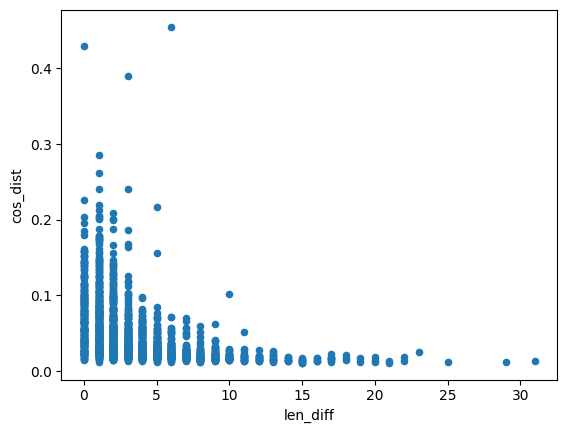

In [ ]:
rolaser_diff.plot.scatter(x="len_diff", y="cos_dist")

<AxesSubplot: xlabel='len_diff', ylabel='cos_dist'>

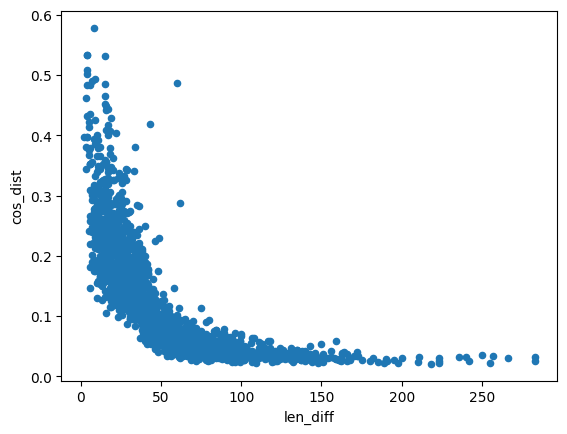

In [ ]:
c_rolaser_diff.plot.scatter(x="len_diff", y="cos_dist")

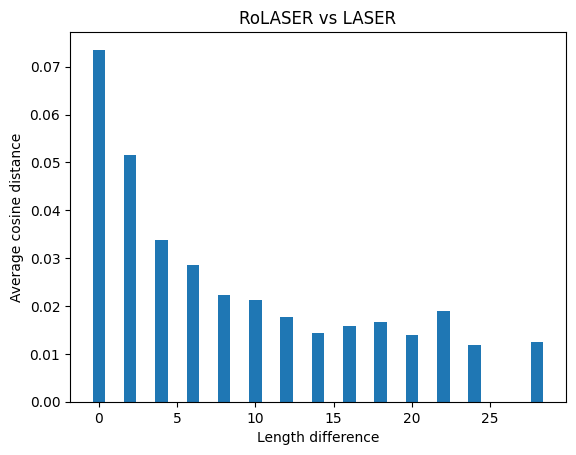

In [ ]:
# plot moving average cosine distance by bins of length difference

rolaser_avg_cos_dist = {}
for bin in range(0, 30, 2):
    rolaser_avg_cos_dist[bin] = rolaser_diff[(rolaser_diff["len_diff"] >= bin) & (rolaser_diff["len_diff"] < bin+2)]["cos_dist"].mean()

plt.bar(rolaser_avg_cos_dist.keys(), rolaser_avg_cos_dist.values())
plt.xlabel("Length difference")
plt.ylabel("Average cosine distance")
plt.title("RoLASER vs LASER")
plt.savefig(f"{plots_dir}/rolaser_avg_cos_dist_by_len_diff.png")

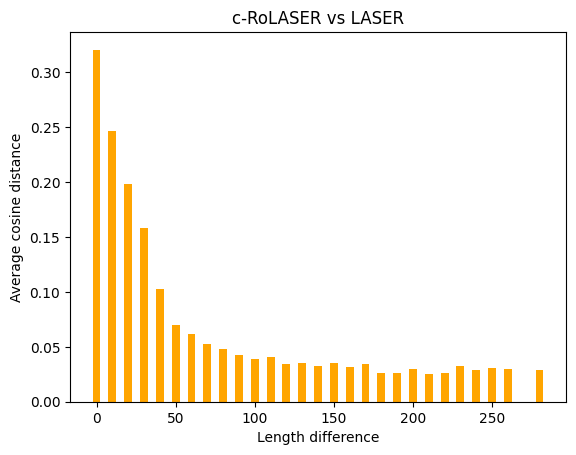

In [ ]:
c_rolaser_avg_cos_dist = {}
for bin in range(0, 300, 10):
    c_rolaser_avg_cos_dist[bin] = c_rolaser_diff[(c_rolaser_diff["len_diff"] >= bin) & (c_rolaser_diff["len_diff"] < bin+10)]["cos_dist"].mean()

plt.bar(c_rolaser_avg_cos_dist.keys(), c_rolaser_avg_cos_dist.values(), color="orange", width=5)
plt.xlabel("Length difference")
plt.ylabel("Average cosine distance")
plt.title("c-RoLASER vs LASER")
plt.savefig(f"{plots_dir}/c_rolaser_avg_cos_dist_by_len_diff.png")

### MultiLexNorm

In [ ]:
corpus = "multilexnorm2021"
data_mulilexnorm, cos_dist_multilexnorm = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.04163903945485953, 'c-RoLASER_LASER': 0.09462301293695767}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

## Difference between std-gold and ugc-gold loss. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

LOSSES = ["loss_std_gold", "loss_ugc_gold", "valid_distil_loss"]
x_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-4, -4))  # Set the exponent range to (-4, -4)
x_formatter.set_powerlimits((-4, 4))  # Set the exponent range to (5, 5)

In [ ]:
all_scores = pd.read_csv("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores/all_scores.csv").sort_values(by="steps")

Plotting separate loss curves for each model...


<Figure size 640x480 with 0 Axes>

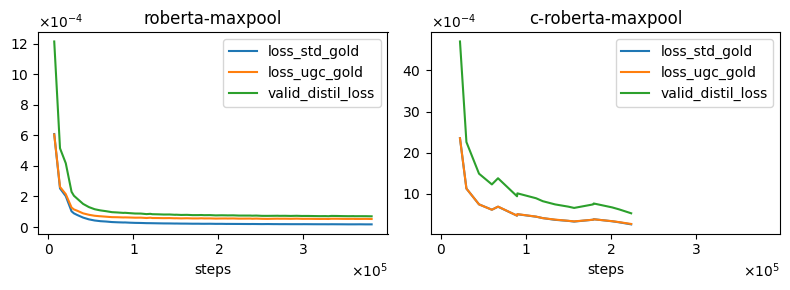

In [ ]:
plt.clf()
models = all_scores["model"].unique()
n_rows = models.size//2
n_cols = min(models.size, 2)
fig, axs = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(4*n_cols, 3*n_rows), sharex=True)

print("Plotting separate loss curves for each model...")
for n, model in enumerate(models):
    i, j = n//2, n%2
    all_scores[all_scores["model"] == model].plot(x="steps", y=LOSSES, ax=axs[i,j], title=model)
    axs[i,j].xaxis.set_major_formatter(x_formatter)
    axs[i,j].yaxis.set_major_formatter(y_formatter)
fig.tight_layout()

In [ ]:
rolaser = all_scores[all_scores['model'] == 'roberta-maxpool']
c_rolaser = all_scores[all_scores['model'] == 'c-roberta-maxpool']

In [ ]:
rolaser_diff = rolaser['loss_ugc_gold'] - rolaser['loss_std_gold']
c_rolaser_diff = c_rolaser['loss_ugc_gold'] - c_rolaser['loss_std_gold']

In [ ]:
c_rolaser.describe()

Unnamed: 0.1      epoch          steps  loss_std_gold  loss_ugc_gold  \
count     19.000000  19.000000      19.000000      19.000000      19.000000   
mean      79.000000   6.000000  128784.736842       0.000562       0.000564   
std        5.627314   2.924988   65418.832930       0.000482       0.000481   
min       70.000000   1.000000   22414.000000       0.000260       0.000269   
25%       74.500000   3.500000   78449.000000       0.000340       0.000342   
50%       79.000000   6.000000  134484.000000       0.000385       0.000382   
75%       83.500000   8.500000  179656.000000       0.000561       0.000561   
max       88.000000  10.000000  224140.000000       0.002352       0.002352   

       valid_distil_loss  Unnamed: 0  
count          19.000000   19.000000  
mean            0.001126    9.000000  
std             0.000963    5.627314  
min             0.000529    0.000000  
25%             0.000681    4.500000  
50%             0.000767    9.000000  
75%             0.001122   13.500000  
max             0.004704   18.000000

In [ ]:
c_rolaser[c_rolaser['loss_ugc_gold'] - c_rolaser['loss_std_gold'] > 0.000001].describe()

Unnamed: 0.1      epoch          steps  loss_std_gold  loss_ugc_gold  \
count     12.000000  12.000000      12.000000      12.000000      12.000000   
mean      78.500000   6.916667  150863.000000       0.000388       0.000392   
std        5.518564   2.429303   54836.467219       0.000122       0.000121   
min       71.000000   3.000000   67242.000000       0.000260       0.000269   
25%       74.500000   5.000000  106552.500000       0.000323       0.000327   
50%       78.000000   7.000000  150000.000000       0.000344       0.000346   
75%       81.750000   9.250000  203794.500000       0.000452       0.000454   
max       88.000000  10.000000  224140.000000       0.000689       0.000692   

       valid_distil_loss  Unnamed: 0  
count          12.000000   12.000000  
mean            0.000781    8.500000  
std             0.000243    5.518564  
min             0.000529    1.000000  
25%             0.000650    4.500000  
50%             0.000690    8.000000  
75%             0.000906   11.750000  
max             0.001380   18.000000

In [ ]:
c_rolaser_diff.describe(percentiles=[x/100 for x in range(0,101,5)])

count    1.900000e+01
mean     2.392232e-06
std      3.364164e-06
min     -2.214780e-06
0%      -2.214780e-06
5%      -1.635918e-06
10%     -6.638480e-07
15%     -2.134630e-07
20%     -9.346000e-08
25%     -4.045000e-08
30%      5.127600e-08
35%      5.247930e-07
40%      1.458648e-06
45%      1.542840e-06
50%      1.542840e-06
55%      2.220351e-06
60%      2.323158e-06
65%      2.720073e-06
70%      2.953842e-06
75%      3.743405e-06
80%      4.632600e-06
85%      5.089275e-06
90%      6.492402e-06
95%      9.859170e-06
100%     9.859170e-06
max      9.859170e-06
dtype: float64

In [ ]:
# Format the y-axis labels
def format_yaxis(value, _):
    if value >= 1000:
        return f"{value / 1000:.0f}k"
    else:
        return int(value)

In [ ]:
rolaser_diff.plot.density(label="RoLASER")
c_rolaser_diff.plot.density(label="c-RoLASER")
# add x axis label  
plt.xlabel('Difference in loss (loss_ugc_gold - loss_std_gold)')
# apply formatter to y axis to display thousands as K
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis))
# add legend
plt.legend()
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores/loss_diff_density.pdf") 

NameError: name 'rolaser_diff' is not defined

### Correlation with sequence length

In [ ]:
char_tokenizer = CustomTokenizer("char")
roberta_tokenizer = CustomTokenizer("roberta") 
spm_tokenizer = CustomTokenizer("spm")

In [ ]:
ref_file = FILES["rocsmt"]["laser"] 
src_file = FILES["rocsmt"]["roberta-student"]

In [ ]:
src_training_file = "/home/lnishimw/scratch/datasets/oscar/mini/4Mlrec/en_2_chunks/ugc/0/en_2-0_mix_all.txt"

In [ ]:
# read each line of ref_file and save tokenized lines to dataframe 
def read_tokenized_lines(file, tokenizer):
    with open(file) as f:
        tok_lines = []
        seq_lengths = []
        for line in f:
            tok_line = tokenizer.tokenize(line)
            tok_lines.append(tok_line)
            seq_lengths.append(len(tok_line.split()))
    data = pd.DataFrame(tok_lines, columns=["tokens"])
    data["seq_len"] = seq_lengths
    return data

In [ ]:
src_lines_char = read_tokenized_lines(src_training_file, char_tokenizer)
src_lines_char

tokens  seq_len
0      W h y _EOW i t _EOW ’ _EOW s _EOW g r e a t _E...      284
1      H o w _EOW t o _EOW e m u l a t e _EOW i t _EO...      367
2      T h e _EOW C o o p e r _EOW R e v i e 3 _EOW i...      528
3      W h y _EOW i t _EOW ’ _EOW s _EOW g r e a t _E...      348
4      H o w _EOW t o _EOW e m u l a t e _EOW i t _EO...      284
...                                                  ...      ...
19995  S H O R T _EOW S A L E _EOW A P P R O V E D _E...      521
19996  A s c e n t _EOW , _EOW A s c e n t _EOW P r o...      113
19997  A s c e n _EOW t _EOW R e a l _EOW E s t a t e...      156
19998  H a v i n g _EOW h a d _EOW m y _EOW B e r l i...      124
19999  M i n e _EOW s e e m e d _EOW 2 _EOW g o _EOW ...      155

[20000 rows x 2 columns]

In [ ]:
src_lines_char["seq_len"].describe()

count    20000.000000
mean       307.614850
std        409.380669
min          2.000000
25%        157.000000
50%        230.000000
75%        359.000000
max      43833.000000
Name: seq_len, dtype: float64

In [ ]:
# plot percentiles of sequence lengths
percentiles = [x/100 for x in range(0,101,5)]
src_lines_char["seq_len"].describe(percentiles=percentiles)

count    20000.000000
mean       307.614850
std        409.380669
min          2.000000
0%           2.000000
5%         113.000000
10%        123.000000
15%        134.000000
20%        145.000000
25%        157.000000
30%        170.000000
35%        183.000000
40%        197.000000
45%        213.000000
50%        230.000000
55%        250.000000
60%        270.000000
65%        295.000000
70%        325.000000
75%        359.000000
80%        401.000000
85%        466.000000
90%        557.000000
95%        737.000000
100%     43833.000000
max      43833.000000
Name: seq_len, dtype: float64

In [ ]:
src_lines_roberta = read_tokenized_lines(src_training_file, roberta_tokenizer)
src_lines_roberta

tokens  seq_len
0      Why Ġit âĢ Ļ s Ġgreat : ĠThe Ġarticle Ġhas Ġa ...       59
1      How Ġto Ġemulate Ġit : ĠFind Ġa Ġtopic Ġyou Ġk...       83
2      The ĠCooper ĠRev ie 3 Ġis Ġa Ġfantastic Ġs 0 u...      150
3      Why Ġit âĢ Ļ s Ġgreat : ĠThe Ġheadline , Ġno Ġ...       99
4      How Ġto Ġemulate Ġit : ĠIs Ġthere Ġsomething Ġ...       64
...                                                  ...      ...
19995  SH ORT ĠS ALE ĠAP PROV ED ! ĠBack Ġon Ġmarket ...      128
19996  As cent Ġ, ĠAs cent ĠProperty ĠManagement Ġ, Ġ...       22
19997  A sc en Ġt ĠReal ĠEstate Ġand Ġthe ĠAs cent Re...       32
19998  Having Ġhad Ġmy ĠBer ling o Ġfor Ġ5 Ġyears Ġ& ...       29
19999  Mine Ġseemed Ġ2 Ġgo Ġthru Ġside Ġlight Ġbulbs ...       37

[20000 rows x 2 columns]

In [ ]:
src_lines_roberta["seq_len"].describe(percentiles=percentiles)

count    20000.00000
mean        70.34555
std        109.56024
min          1.00000
0%           1.00000
5%          24.00000
10%         27.00000
15%         30.00000
20%         33.00000
25%         36.00000
30%         38.00000
35%         41.00000
40%         45.00000
45%         48.00000
50%         52.00000
55%         56.00000
60%         61.00000
65%         67.00000
70%         74.00000
75%         82.00000
80%         92.00000
85%        106.00000
90%        128.00000
95%        170.00000
100%     12601.00000
max      12601.00000
Name: seq_len, dtype: float64

In [ ]:
src_lines_spm = read_tokenized_lines(src_training_file, spm_tokenizer)
src_lines_spm

tokens  seq_len
0      ▁W hy ▁it ’ s ▁great : ▁The ▁article ▁has ▁a ▁...       73
1      ▁How ▁to ▁e mula te ▁it : ▁Fin d ▁a ▁to pic ▁y...      108
2      ▁The ▁Co o per ▁Re vie 3 ▁is ▁a ▁fantast ic ▁s...      176
3      ▁W hy ▁it ’ s ▁great : ▁The ▁head line , ▁no ▁...      109
4      ▁How ▁to ▁e mula te ▁it : ▁Is ▁there ▁somethin...       76
...                                                  ...      ...
19995  ▁S HO RT ▁S ALE ▁ APP RO VE D ! ▁Ba ck ▁on ▁ma...      169
19996  ▁As cent ▁ , ▁As cent ▁Pro per ty ▁Management ...       33
19997  ▁As cen ▁t ▁Real ▁Esta te ▁and ▁the ▁As cent R...       42
19998  ▁Ha ving ▁had ▁my ▁Berlin go ▁for ▁5 ▁years ▁&...       38
19999  ▁Mi ne ▁see med ▁2 ▁go ▁th ru ▁side ▁ light ▁b...       51

[20000 rows x 2 columns]

In [ ]:
src_lines_spm["seq_len"].describe(percentiles=percentiles)

count    20000.000000
mean        93.418100
std        133.427285
min          2.000000
0%           2.000000
5%          33.000000
10%         37.000000
15%         41.000000
20%         44.000000
25%         48.000000
30%         51.000000
35%         56.000000
40%         60.000000
45%         64.000000
50%         69.000000
55%         75.000000
60%         82.000000
65%         89.000000
70%         98.000000
75%        108.000000
80%        122.000000
85%        141.000000
90%        169.000000
95%        224.000000
100%     14824.000000
max      14824.000000
Name: seq_len, dtype: float64

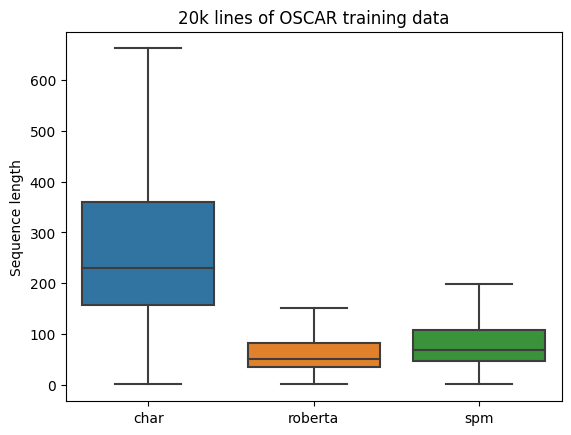

In [ ]:
# plot boxplot of sequence length without outliers
sns.boxplot([src_lines_char["seq_len"], src_lines_roberta["seq_len"], src_lines_spm["seq_len"]], showfliers=False)
plt.ylabel("Sequence length")
plt.xticks([0,1,2], ["char", "roberta", "spm"])
plt.title("20k lines of OSCAR training data")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/plots/oscar_seq_len_boxplot.png")

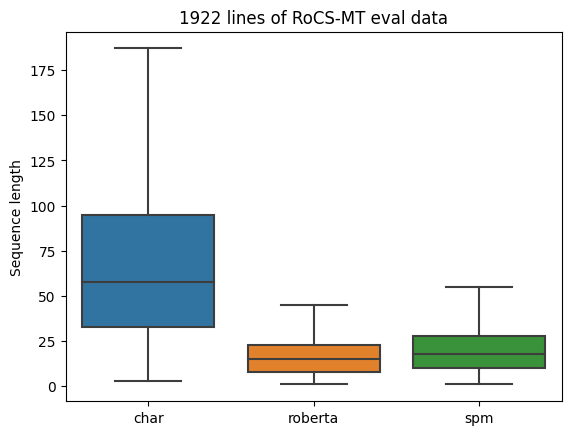

In [ ]:
src_eval_file = "/home/lnishimw/scratch/datasets/rocsmt/test/raw.en.test"
src_lines_char_eval = read_tokenized_lines(src_eval_file, char_tokenizer)
src_lines_roberta_eval = read_tokenized_lines(src_eval_file, roberta_tokenizer)
src_lines_spm_eval = read_tokenized_lines(src_eval_file, spm_tokenizer)

sns.boxplot([src_lines_char_eval["seq_len"], src_lines_roberta_eval["seq_len"], src_lines_spm_eval["seq_len"]], showfliers=False)
plt.ylabel("Sequence length")
plt.xticks([0,1,2], ["char", "roberta", "spm"])
plt.title("1922 lines of RoCS-MT eval data")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/plots/rocsmt_seq_len_boxplot.png")

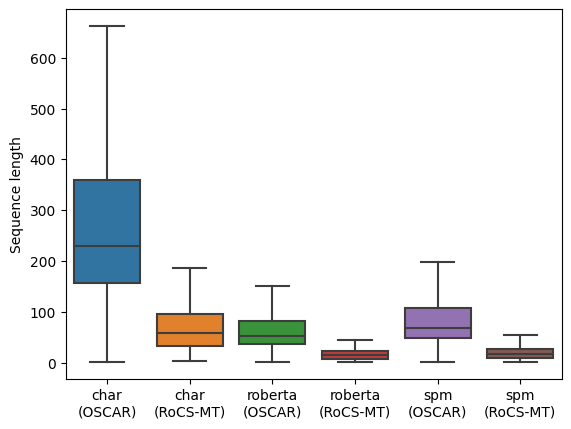

In [ ]:
sns.boxplot([src_lines_char["seq_len"], src_lines_char_eval["seq_len"], src_lines_roberta["seq_len"], src_lines_roberta_eval["seq_len"], src_lines_spm["seq_len"], src_lines_spm_eval["seq_len"]], showfliers=False)
plt.ylabel("Sequence length")
plt.xticks(range(6), ["char\n(OSCAR)", "char\n(RoCS-MT)", "roberta\n(OSCAR)", "roberta\n(RoCS-MT)", "spm\n(OSCAR)", "spm\n(RoCS-MT)"])
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/plots/oscar_rocsmt_seq_len_boxplot.png")

In [ ]:
tok_files_dataframe(char_tokenizer)

NameError: name 'tok_files_dataframe' is not defined

In [ ]:
tok_files_dataframe(roberta_tokenizer)

tokenized line            corpus  \
0     " We Ġnow Ġhave Ġ4 - month - old Ġmice Ġthat Ġ...         flores200   
1     Dr . ĠEh ud ĠUr , Ġprofessor Ġof Ġmedicine Ġat...         flores200   
2     Like Ġsome Ġother Ġexperts , Ġhe Ġis Ġskeptica...         flores200   
3     On ĠMonday , ĠSara ĠDani us , Ġpermanent Ġsecr...         flores200   
4     D ani us Ġsaid , Ġ" Right Ġnow Ġwe Ġare Ġdoing...         flores200   
...                                                 ...               ...   
4896  rt Ġ@ tw itt bet ty butt Ġ: Ġno Ġrelationship ...  multilexnorm2021   
4897  is Ġj ae jo ong Ġreally Ġchange Ġhis Ġchar a Ġ...  multilexnorm2021   
4898  rt Ġ@ ton y the t urtle ee Ġ: Ġover Ġhere Ġtry...  multilexnorm2021   
4899  rt Ġ@ mi il kk k Ġ: Ġwhen Ġm r . Ġk r abs Ġsol...  multilexnorm2021   
4900  i Ġam Ġfree Ġof Ġprejudice Ġ. Ġi Ġlove Ġeveryo...  multilexnorm2021   

      sequence length  
0                  25  
1                  44  
2                  31  
3                  60  
4                  37  
...               ...  
4896               37  
4897               16  
4898               35  
4899               32  
4900               29  

[4901 rows x 3 columns]

In [ ]:
tok_files_dataframe(spm_tokenizer)

tokenized line            corpus  \
0     ▁" W e ▁now ▁have ▁4- mon th - old ▁mi ce ▁tha...         flores200   
1     ▁Dr . ▁Eh ud ▁Ur , ▁professor ▁of ▁medic ine ▁...         flores200   
2     ▁Li ke ▁some ▁other ▁expert s , ▁he ▁is ▁ ske ...         flores200   
3     ▁On ▁Mon day , ▁Sara ▁Dan ius , ▁permanent ▁se...         flores200   
4     ▁Dan ius ▁said , ▁" R ight ▁now ▁we ▁are ▁do i...         flores200   
...                                                 ...               ...   
4896  ▁ rt ▁@ t wit t bet ty but t ▁: ▁no ▁relation ...  multilexnorm2021   
4897  ▁is ▁ja ejo ong ▁really ▁change ▁his ▁char a ▁...  multilexnorm2021   
4898  ▁ rt ▁@ to ny the tur tle e e ▁: ▁over ▁here ▁...  multilexnorm2021   
4899  ▁ rt ▁@ mi il k kk ▁: ▁when ▁m r . ▁kra b s ▁s...  multilexnorm2021   
4900  ▁i ▁am ▁free ▁of ▁prej udi ce ▁ . ▁i ▁love ▁ev...  multilexnorm2021   

      sequence length  
0                  32  
1                  63  
2                  48  
3                  92  
4                  50  
...               ...  
4896               43  
4897               15  
4898               43  
4899               43  
4900               36  

[4901 rows x 3 columns]

In [ ]:
cos_dist = {}
corpus = "rocsmt"
files = FILES[corpus]
model_names = MODEL_NAMES
model = "character-roberta-student"
print("Comparing LASER with", model_names[model])
ref_file = files["laser"]
src_file = files[model]
model_pair = f"{model_names[model]}_LASER"
X, data = get_visualization_dataframe(src_file, ref_file, model_pair, src_type=model_names[model], ref_type="LASER")
data["seq_len"] = file_seq_lengths(["laser", model], RAW_FILES[corpus])
n_sentences = X.shape[0]//2
cos_dist[model_pair] = paired_cosine_distances(X[:n_sentences,:], X[n_sentences:,:])
plot_visualization_data(data, plots_path, model_pair)

Comparing LASER with c-RoLASER


/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

<Figure size 624.75x500 with 0 Axes>

<Figure size 624.75x500 with 0 Axes>

In [ ]:
data.describe()

PCA dim 1     PCA dim 2  t-SNE dim 1  t-SNE dim 2   UMAP dim 1  \
count  3.844000e+03  3.844000e+03  3844.000000  3844.000000  3844.000000   
mean   2.381705e-08  1.151157e-07     0.728627     0.971634     7.872536   
std    3.084261e-01  2.016001e-01    39.621719    37.784554     2.046288   
min   -3.868888e-01 -3.007285e-01   -87.784462   -86.717583     4.146110   
25%   -2.370180e-01 -1.576683e-01   -29.493250   -27.736765     6.231793   
50%   -1.334030e-01 -4.316083e-02    -0.479358     0.288037     7.623292   
75%    1.870254e-01  1.001430e-01    29.434695    28.843257     9.261320   
max    8.369790e-01  7.325433e-01    92.460991    81.353401    12.207938   

        UMAP dim 2      seq_len  
count  3844.000000  3844.000000  
mean     10.206622    49.213840  
std       1.615906    48.339641  
min       5.976264     1.000000  
25%       9.280321    17.000000  
50%      10.347948    32.000000  
75%      11.347516    65.000000  
max      13.408525   399.000000

<AxesSubplot: xlabel='PCA dim 1', ylabel='PCA dim 2'>

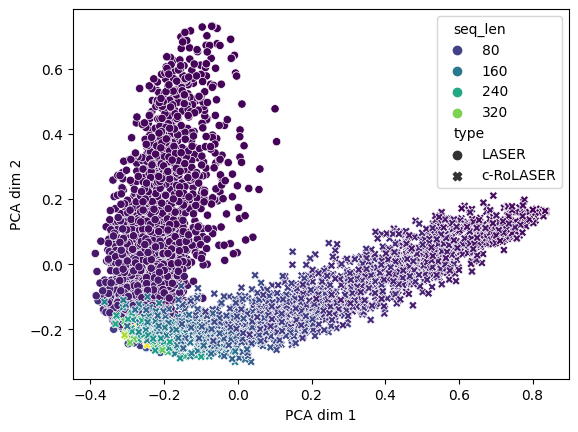

In [ ]:
sns.scatterplot(data, x="PCA dim 1", y="PCA dim 2", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='PCA dim 2', ylabel='seq_len'>

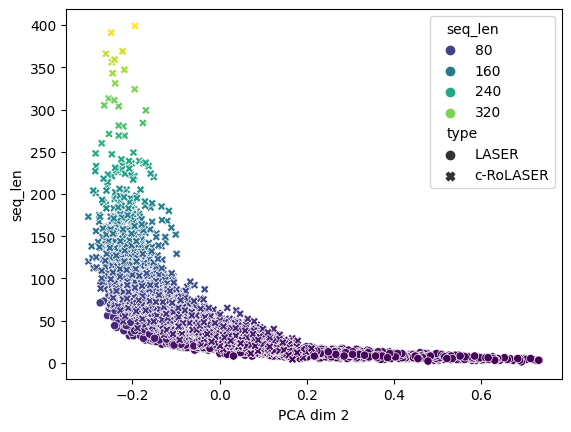

In [ ]:
sns.scatterplot(data, x="PCA dim 2", y="seq_len", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='PCA dim 1', ylabel='seq_len'>

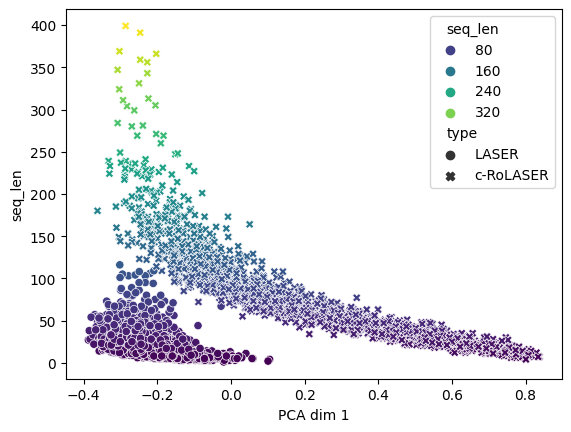

In [ ]:
sns.scatterplot(data, x="PCA dim 1", y="seq_len", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='seq_len', ylabel='PCA dim 1'>

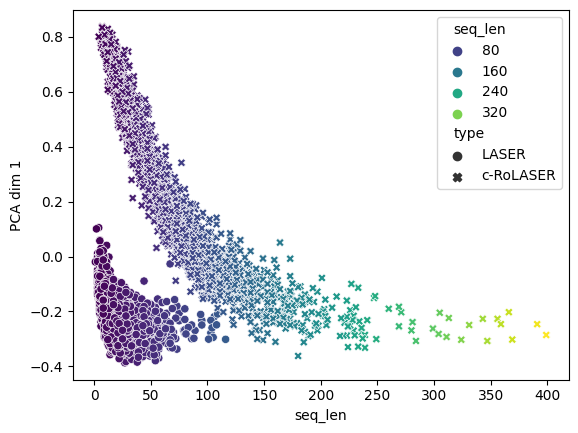

In [ ]:
sns.scatterplot(data, y="PCA dim 1", x="seq_len", hue="seq_len", style="type", palette="viridis")

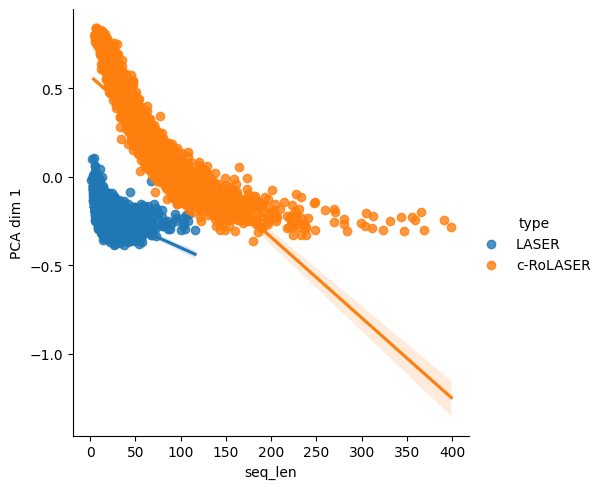

In [ ]:
sns.lmplot(data=data, y="PCA dim 1", x="seq_len", hue="type")


<AxesSubplot: xlabel='seq_len', ylabel='PCA dim 2'>

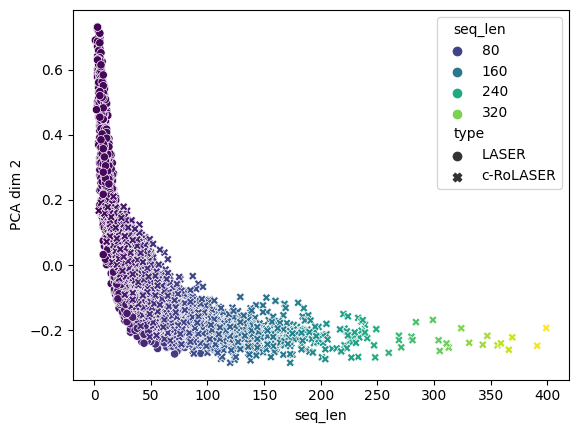

In [ ]:
sns.scatterplot(data, y="PCA dim 2", x="seq_len", hue="seq_len", style="type", palette="viridis")

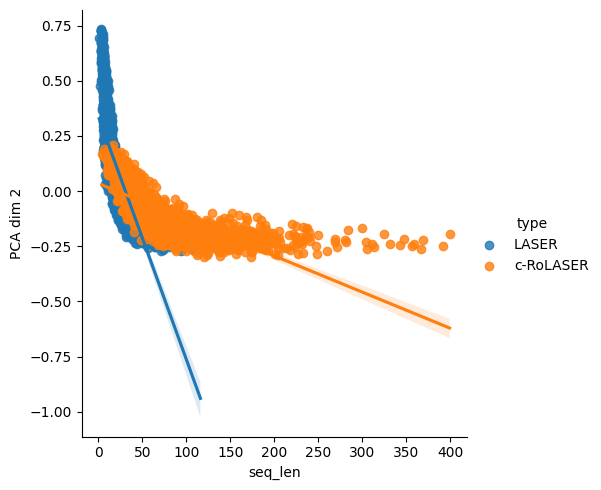

In [ ]:
sns.lmplot(data=data, y="PCA dim 2", x="seq_len", hue="type")


## Ablation of training noise proba

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scores_en_xx_file = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/scores/rocsmt/scores_en_xx.csv"
scores_en_xx = pd.read_csv(scores_en_xx_file)

In [ ]:
scores_xx_en_file = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/scores/rocsmt/scores_xx_en.csv"
scores_xx_en = pd.read_csv(scores_xx_en_file)

In [ ]:
scores_en_xx.head()

Column1 dataset         src-tgt  xsim  nbex target lang type  model
0        0  rocsmt  norm.en-ref.cs  2.71  1922          cs  std  LASER
1        1  rocsmt  norm.en-ref.de  0.57  1922          de  std  LASER
2        2  rocsmt  norm.en-ref.fr  5.10  1922          fr  std  LASER
3        3  rocsmt  norm.en-ref.ru  5.88  1922          ru  std  LASER
4        4  rocsmt  norm.en-ref.uk  2.55  1922          uk  std  LASER

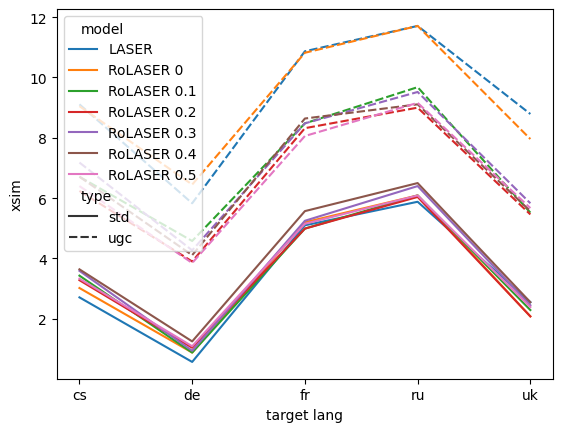

In [ ]:
sns.lineplot(scores_en_xx, x="target lang", y="xsim", hue="model", style="type")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/rocsmt_en_xx_lineplot.png")

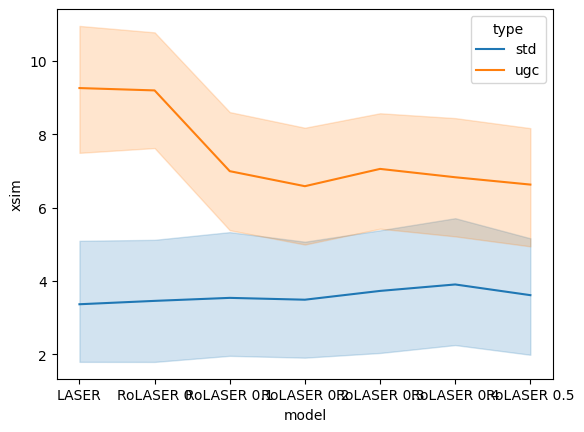

In [ ]:
sns.lineplot(scores_en_xx, x="model", y="xsim", hue="type")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/rocsmt_en_xx_lineplot_by_model.png")

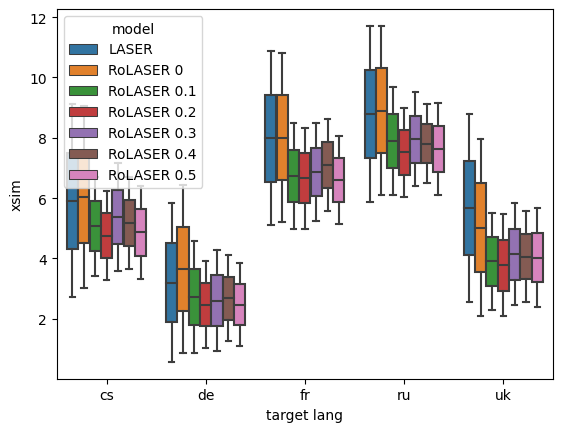

In [ ]:
sns.boxplot(scores_en_xx, x="target lang", y="xsim", hue="model")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/rocsmt_en_xx_boxplot.png")

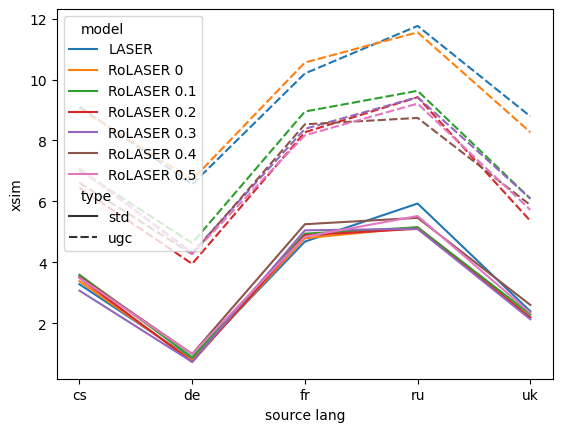

In [ ]:
sns.lineplot(scores_xx_en, x="source lang", y="xsim", hue="model", style="type")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/rocsmt_xx_en_lineplot.png")

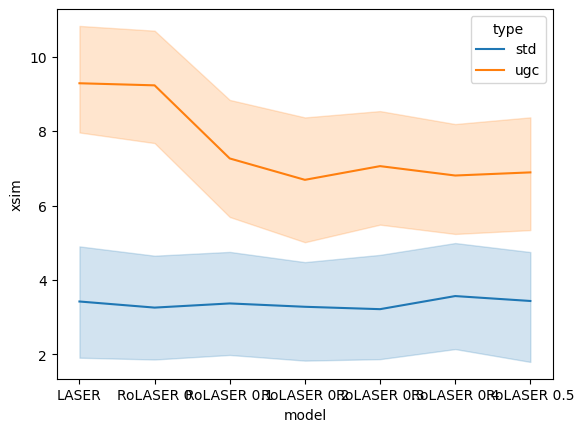

In [ ]:
sns.lineplot(scores_xx_en, x="model", y="xsim", hue="type")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/rocsmt_xx_en_lineplot_by_model.png")

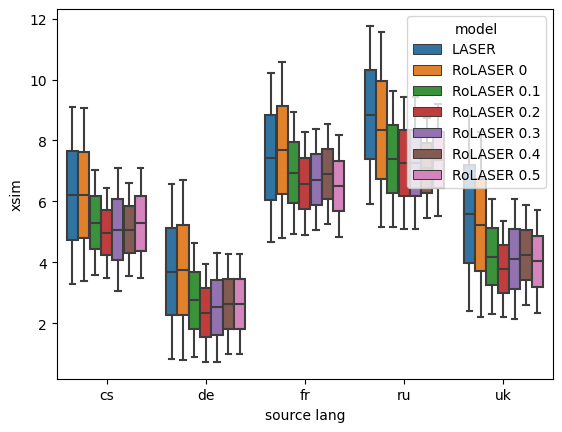

In [ ]:
sns.boxplot(scores_xx_en, x="source lang", y="xsim", hue="model")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/rocsmt_xx_en_boxplot.png")

In [ ]:
scores_xx_en.groupby(["model"]).mean()

/scratch/lnishimw/tmp/ipykernel_95888/1957664461.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scores_xx_en.groupby(["model"]).mean()


Column1   xsim    nbex
model                              
LASER            4.5  6.353  1922.0
RoLASER 0       64.5  6.243  1922.0
RoLASER 0.1     14.5  5.317  1922.0
RoLASER 0.2     24.5  4.985  1922.0
RoLASER 0.3     34.5  5.137  1922.0
RoLASER 0.4     44.5  5.187  1922.0
RoLASER 0.5     54.5  5.163  1922.0

In [ ]:
scores_flores_file = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/scores/flores200/scores_devtest.csv"
scores_flores = pd.read_csv(scores_flores_file)

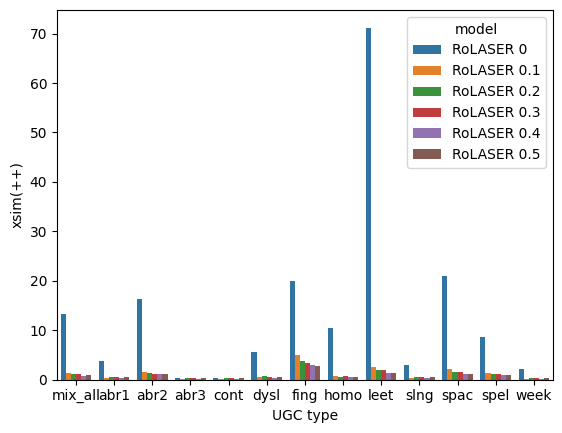

In [ ]:
sns.barplot(scores_flores[scores_flores["model"]!= "LASER"], x="UGC type", y="xsim(++)", hue="model")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/flores200_devtest_barplot.png")

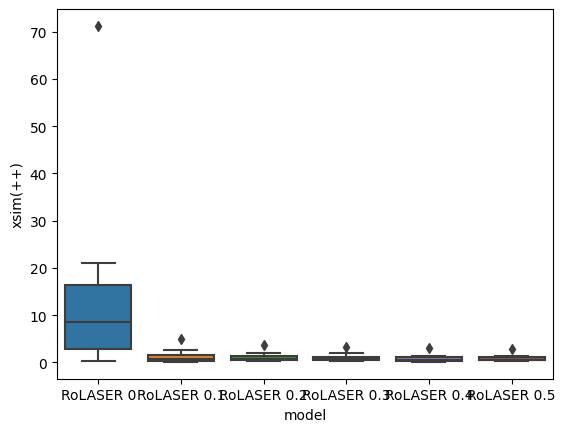

In [ ]:
sns.boxplot(scores_flores[scores_flores["model"]!= "LASER"], x="model", y="xsim(++)")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/flores200_devtest_boxplot.png")

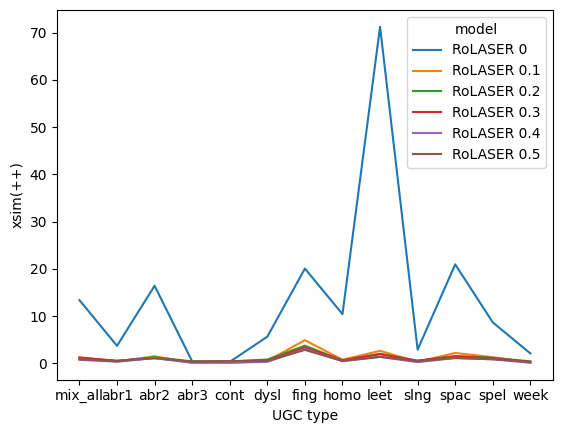

In [ ]:
sns.lineplot(scores_flores[scores_flores["model"]!= "LASER"], x="UGC type", y="xsim(++)", hue="model")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/flores200_devtest_lineplot_by_type.png")

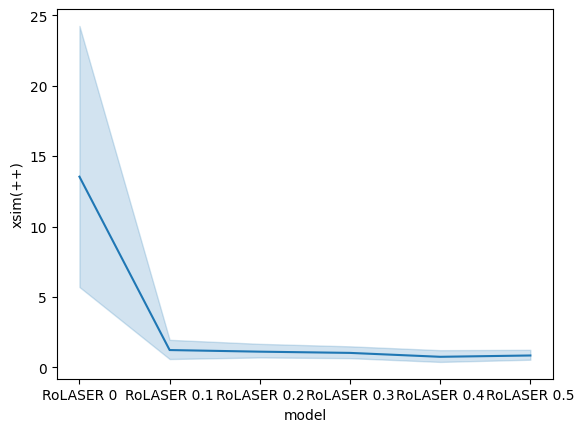

In [ ]:
sns.lineplot(scores_flores[scores_flores["model"]!= "LASER"], x="model", y="xsim(++)")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_042_jz/plots/flores200_devtest_lineplot_by_model.png")

# Detokenizing FooTweets

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
detokenizer = TreebankWordDetokenizer()

In [ ]:
s = "live World Cup Update : Nigeria vs. Bosnia-Herzegovina : - http : / / t.co / vJ2hNAzyKm http : / / t.co / uU1vBJPXbO ... @ Brazil2014 . # WorldCup "

In [ ]:
detokenizer.detokenize(s.split())

'live World Cup Update: Nigeria vs. Bosnia-Herzegovina: - http: / / t.co / vJ2hNAzyKm http: / / t.co / uU1vBJPXbO...@ Brazil2014 . #WorldCup'

In [ ]:
import re

def detokenize_urls_in_sentence(sentence):
    # Define the regex pattern for tokenized URLs
    pattern = re.compile(r'https?\s*:\s*/\s*/\s*t\.co\s*/\s*\w+')
    
    # Function to remove spaces from the matched tokenized URL
    def detokenize(match):
        return match.group(0).replace(' ', '')

    # Substitute all tokenized URLs in the sentence with their detokenized versions
    return pattern.sub(detokenize, sentence)

# Example usage
sentences = [
    'Check out this link http : / / t.co / vJ2hNAzyKm for more info.',
    'Secure site at https : / / t.co / secure123.',
    'Visit our website http://example.com for details.',
    'Follow us on http : / / t.co / followUs and stay updated.'
]

for sentence in sentences:
    print(f"Original sentence: {sentence}")
    print(f"Detokenized sentence: {detokenize_urls_in_sentence(sentence)}")
    print()


Original sentence: Check out this link http : / / t.co / vJ2hNAzyKm for more info.
Detokenized sentence: Check out this link http://t.co/vJ2hNAzyKm for more info.

Original sentence: Secure site at https : / / t.co / secure123.
Detokenized sentence: Secure site at https://t.co/secure123.

Original sentence: Visit our website http://example.com for details.
Detokenized sentence: Visit our website http://example.com for details.

Original sentence: Follow us on http : / / t.co / followUs and stay updated.
Detokenized sentence: Follow us on http://t.co/followUs and stay updated.



In [ ]:
detokenizer.detokenize(detokenize_urls_in_sentence(s).split())

'live World Cup Update: Nigeria vs. Bosnia-Herzegovina: - http://t.co/vJ2hNAzyKm http://t.co/uU1vBJPXbO @ Brazil2014 #WorldCup'

In [ ]:
import re

def detokenize_urls_hashtags_usernames(sentence):
    # Define regex patterns for tokenized URLs, hashtags, and usernames
    url_pattern = re.compile(r'https?\s*:\s*/\s*/\s*t\.co\s*/\s*\w+')
    hashtag_pattern = re.compile(r'#\s*\w+')
    username_pattern = re.compile(r'@\s*\w+')
    
    # Function to remove spaces from the matched tokenized string
    def detokenize(match):
        return match.group(0).replace(' ', '')
    
    # Substitute all tokenized URLs, hashtags, and usernames in the sentence with their detokenized versions
    sentence = url_pattern.sub(detokenize, sentence)
    sentence = hashtag_pattern.sub(detokenize, sentence)
    sentence = username_pattern.sub(detokenize, sentence)
    
    return sentence

# Example usage
sentences = [
    'Check out this link http : / / t.co / vJ2hNAzyKm for more info.',
    'Secure site at https : / / t.co / secure123.',
    'Follow us on http : / / t.co / followUs and stay updated.',
    'Use the hashtag # tag to join the conversation.',
    'Contact @ user for more details.',
    'Another example with # hash and @ usertokenized.',
    '@ ___FastLife what did he say that idiot ? ... # FastLife',
]

for sentence in sentences:
    print(f"Original sentence: {sentence}")
    print(f"Detokenized sentence: {detokenize_urls_hashtags_usernames(sentence)}")
    print()


Original sentence: Check out this link http : / / t.co / vJ2hNAzyKm for more info.
Detokenized sentence: Check out this link http://t.co/vJ2hNAzyKm for more info.

Original sentence: Secure site at https : / / t.co / secure123.
Detokenized sentence: Secure site at https://t.co/secure123.

Original sentence: Follow us on http : / / t.co / followUs and stay updated.
Detokenized sentence: Follow us on http://t.co/followUs and stay updated.

Original sentence: Use the hashtag # tag to join the conversation.
Detokenized sentence: Use the hashtag #tag to join the conversation.

Original sentence: Contact @ user for more details.
Detokenized sentence: Contact @user for more details.

Original sentence: Another example with # hash and @ usertokenized.
Detokenized sentence: Another example with #hash and @usertokenized.

Original sentence: @ ___FastLife what did he say that idiot ? ... # FastLife
Detokenized sentence: @___FastLife what did he say that idiot ? ... #FastLife



In [ ]:
detokenize_urls_hashtags_usernames(detokenizer.detokenize(s.split()))

'live World Cup Update: Nigeria vs. Bosnia-Herzegovina: - http://t.co/vJ2hNAzyKm http://t.co/uU1vBJPXbO... @Brazil2014 . #WorldCup'

In [ ]:
import re

def detokenize_urls_hashtags_usernames(sentence):
    # Define regex patterns for tokenized URLs, hashtags, and usernames
    url_pattern = re.compile(r'https?\s*:\s*/\s*/\s*t\.co\s*/\s*\w+')
    hashtag_pattern = re.compile(r'#\s*\w+')
    username_pattern = re.compile(r'@\s*\w+')
    
    # Function to remove spaces from the matched tokenized string
    def detokenize(match):
        return match.group(0).replace(' ', '')

    # Substitute all tokenized URLs, hashtags, and usernames in the sentence with their detokenized versions
    sentence = url_pattern.sub(detokenize, sentence)
    sentence = hashtag_pattern.sub(detokenize, sentence)
    sentence = username_pattern.sub(detokenize, sentence)
    
    # Insert a space before hashtags and usernames that are stuck to a previous character
    sentence = re.sub(r'(?<!\s)(#\w+)', r' \1', sentence)
    sentence = re.sub(r'(?<!\s)(@\w+)', r' \1', sentence)
    
    return sentence

# Example usage
sentences = [
    'Check out this link http : / / t.co / vJ2hNAzyKm for more info.',
    'Secure site at https : / / t.co / secure123.',
    'Follow us on http : / / t.co / followUs and stay updated.',
    'Use the hashtag # tag to join the conversation.',
    'Contact @ user for more details.',
    'Another example with # hash and @ usertokenized.',
    'This is a test for#hashtag and@username without spaces .'
]

for sentence in sentences:
    print(f"Original sentence: {sentence}")
    print(f"Detokenized sentence: {detokenize_urls_hashtags_usernames(sentence)}")
    print()


Original sentence: Check out this link http : / / t.co / vJ2hNAzyKm for more info.
Detokenized sentence: Check out this link http://t.co/vJ2hNAzyKm for more info.

Original sentence: Secure site at https : / / t.co / secure123.
Detokenized sentence: Secure site at https://t.co/secure123.

Original sentence: Follow us on http : / / t.co / followUs and stay updated.
Detokenized sentence: Follow us on http://t.co/followUs and stay updated.

Original sentence: Use the hashtag # tag to join the conversation.
Detokenized sentence: Use the hashtag #tag to join the conversation.

Original sentence: Contact @ user for more details.
Detokenized sentence: Contact @user for more details.

Original sentence: Another example with # hash and @ usertokenized.
Detokenized sentence: Another example with #hash and @usertokenized.

Original sentence: This is a test for#hashtag and@username without spaces .
Detokenized sentence: This is a test for #hashtag and @username without spaces .



In [ ]:
import re

def detokenize_urls_hashtags_usernames(sentence):
    # Define regex patterns for tokenized URLs, hashtags, and usernames
    url_pattern = re.compile(r'https?\s*:\s*/\s*/\s*t\.co\s*/\s*\w+')
    hashtag_pattern = re.compile(r'#\s*\w+')
    username_pattern = re.compile(r'@\s*\w+')
    
    # Function to remove spaces from the matched tokenized string
    def detokenize(match):
        return match.group(0).replace(' ', '')
    
    # Substitute all tokenized URLs, hashtags, and usernames in the sentence with their detokenized versions
    #sentence = url_pattern.sub(detokenize, sentence)
    sentence = hashtag_pattern.sub(detokenize, sentence)
    sentence = username_pattern.sub(detokenize, sentence)
    
    # Insert a space before hashtags and usernames that are stuck to a previous character
    sentence = re.sub(r'(?<!\s)(#\w+)', r' \1', sentence)
    sentence = re.sub(r'(?<!\s)(@\w+)', r' \1', sentence)
    
    # Remove spaces before full stops
    sentence = re.sub(r'\s+\.', '.', sentence)
    
    # Handle the special case for "w / o" first
    #sentence = re.sub(r'\bw\s*/\s*o\b', 'w/o', sentence)
    
    # Then handle the general case for "w / " to "w/"
    #sentence = re.sub(r'\bw\s*/\s*', 'w/ ', sentence)
    
    # Now remove spaces around all other slashes
    sentence = re.sub(r'\s*/\s*', '/', sentence)

    sentence = re.sub(r'\bw\s*/(?!o\b)', 'w/ ', sentence)
    
    return sentence

# Example usage
sentences = [
    'Check out this link http : / / t.co / vJ2hNAzyKm for more info .',
    'Secure site at https : / / t.co / secure123 .',
    'Visit our site at https : / / www.example.com / path / to / resource.',
    'Use the hashtag # tag to join the conversation.',
    'Contact @ user for more details .',
    'Another example with # hash and @ usertokenized.',
    'This is a test for#hashtag and@username without spaces.',
    'Remove spaces before full stops . And / or around slashes / like / this.',
    'Example w / o spaces . Another example w / something else.',
    'This should handle w / o properly and also w / everything correctly.'
]

for sentence in sentences:
    print(f"Original sentence: {sentence}")
    print(f"Detokenized sentence: {detokenize_urls_hashtags_usernames(sentence)}")
    print()


Original sentence: Check out this link http : / / t.co / vJ2hNAzyKm for more info .
Detokenized sentence: Check out this link http ://t.co/vJ2hNAzyKm for more info.

Original sentence: Secure site at https : / / t.co / secure123 .
Detokenized sentence: Secure site at https ://t.co/secure123.

Original sentence: Visit our site at https : / / www.example.com / path / to / resource.
Detokenized sentence: Visit our site at https ://www.example.com/path/to/resource.

Original sentence: Use the hashtag # tag to join the conversation.
Detokenized sentence: Use the hashtag #tag to join the conversation.

Original sentence: Contact @ user for more details .
Detokenized sentence: Contact @user for more details.

Original sentence: Another example with # hash and @ usertokenized.
Detokenized sentence: Another example with #hash and @usertokenized.

Original sentence: This is a test for#hashtag and@username without spaces.
Detokenized sentence: This is a test for #hashtag and @username without spa

In [ ]:
import os

file_path = "/home/lnishimw/scratch/datasets/pfsmb/test.en"

with open(file_path, "r") as f:
    lines = f.readlines()

In [ ]:
# encode all strings in lines with utf8
lines = [line.encode("utf-8") for line in lines]

In [ ]:
import html

lines = [html.unescape(line) for line in lines]

In [ ]:
import re 
sentence = "#WorldCup &#124; amp; GT; gt; &apos; &quot;"
re.sub(r'gt;', '&gt;', sentence, flags=re.IGNORECASE)

'#WorldCup &#124; amp; &gt; &gt; &apos; &quot;'

In [ ]:
html.unescape("&#13; &#10; &#65533; &#xFFFD; &#xfffd;").replace('\uFFFD', ' ')

'\r \n      '

In [ ]:
lines[:10]

['Live from the shooting of one of the next new shows of "Carnets de Julie"! Guess the destination!\n',
 'In Quebec you have to protect your head on the snowmobile.\n',
 "Brrrrrrrrrrr it's cold .....\n",
 "JULIE you amaze me more and more . I like this show better because it's not too much centered on the cooking and in front of the oven but an encounter between people and personalities about local products thuss cute\n",
 'superb JULIE with her amazing television reports thanks to you\n',
 'ski station in France only good menus in sight\n',
 "Very beautiful julie , may you come in Haute-Savoie .... your show is great I'm following it as much as possible and pick up the recipes that I partly execute , I'm thinking particularly about the Beauges matafans a delight Thank you for your smile \n",
 'Thank you everyone for your loyalty in front of "Carnets de Julie Grand Format" in Corsica! This beautiful show is worth it only if you love it! Don\'t forget the replay is already available on 

In [ ]:
import html, re

In [ ]:
eng_codes = "/home/lnishimw/scratch/datasets/rosonar/monolingual/normed/eng/oscar2301.eng.html_codes.txt"
fra_codes = "/home/lnishimw/scratch/datasets/rosonar/monolingual/normed/fra/oscar2301.fra.html_codes.txt"

In [ ]:
with open(eng_codes, "r") as f:
    for line in f:
        print(line.strip(), html.unescape(line.strip()))

&#e230; &#e230;


In [ ]:
with open(fra_codes, "r") as f:
    for line in f:
        print(line.strip(), html.unescape(line.strip()))

&#039; '
&#39; '


In [ ]:
word_1 = "hooter&#39;s"
word_2 = "Iran&#039;s"

In [ ]:
s = "Surfez sur l&#039;Actualité Voile Sportive – Course au Large – America&#039;s Cup"

In [ ]:
with open("draft.txt", "w") as f:
    f.write(s + "\n")
    f.write((html.unescape(html.unescape(s).replace("&#039;", "'")))+ "\n")
    f.write(s.replace("&#039;", "'")+ "\n")
    f.write((html.unescape(s.replace("&#039;", "'")))+ "\n")
    f.write(html.unescape(s).replace("&#039;", "'")+ "\n")

In [ ]:
BAD_CHARACTER_REPLACEMENTS = [
    ('&#039;', "'"),
    ('&#39;', "\\'")
]

In [ ]:
re.sub('&#39;', '\'', word_1)

"hooter's"

In [ ]:
html.unescape("&amp;amp;amp;pound;&amp;amp;amp;")

'&amp;amp;pound;&amp;amp;'

In [ ]:
html.unescape(html.unescape(html.unescape(html.unescape("&amp;amp;amp;pound;&amp;amp;amp;"))))

'£&'

In [ ]:
import html

def correct_recursive_html_encoding(text):
    previous_text = None
    while previous_text != text:
        previous_text = text
        text = html.unescape(text)  # Decode the HTML entities
    return text

# Example usage:
encoded_string = "https://www.amazon.com/Guitar-Hanger-Holder-Mount-Display/dp/B005CX4GLE/ref=sr_1_4?ie=UTF8&amp;amp;qid=1529878926&amp;amp;sr=8-4&amp;amp;keywords=guitar+hanger+wall+mount&amp;amp;pldnSite=1"
corrected_string = correct_recursive_html_encoding(encoded_string)

print(corrected_string)


https://www.amazon.com/Guitar-Hanger-Holder-Mount-Display/dp/B005CX4GLE/ref=sr_1_4?ie=UTF8&qid=1529878926&sr=8-4&keywords=guitar+hanger+wall+mount&pldnSite=1


# Language Identification of UGC

In [ ]:
import py3langid as langid
import fasttext
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd

In [ ]:
sentences = [
    "See you tomorrow.",
    "See you tomoz .",
    "See you tkmoerow.",
    "C. U. tomorrow.",
    "C. Yew tomorrow.",
    "sea you tomorrow.",
    "Cu 2moro.",
    "See you t03orro3.",
    "See yow tomorrow.",
    "See yo utomorrow.",
    "c ya 2morrow.",
]


### Cosine similarities

In [ ]:
laser_cos_dist_file = "/home/lnishimw/scratch/RoLASER/outputs/draft/outputs_laser2.json"
rolaser_cos_dist_file = "/home/lnishimw/scratch/RoLASER/outputs/draft/outputs_rolaser.json"

In [ ]:
# read the cosine distances from the json files
with open(laser_cos_dist_file, "r") as f:
    laser_cos_dist = json.load(f)

with open(rolaser_cos_dist_file, "r") as f:
    rolaser_cos_dist = json.load(f)

In [ ]:
laser_cos_sim = (1 - pd.DataFrame.from_dict(laser_cos_dist, orient="index")['cos'].values)
rolaser_cos_sim = (1 - pd.DataFrame.from_dict(rolaser_cos_dist, orient="index")['cos'].values)

In [ ]:
laser_cos_sim = np.insert(laser_cos_sim, 0, 1.0)
rolaser_cos_sim = np.insert(rolaser_cos_sim, 0, 1.0)

### Fasttext vs LangID

In [ ]:
fasttext_model = fasttext.load_model("/home/lnishimw/scratch/models/checkpoints/fasttext/lid.176.bin")
# fasttext_model = fasttext.load_model("/home/lnishimw/scratch/models/checkpoints/fasttext/facebook/fasttext-language-identification/model.bin")


In [ ]:
for sentence in sentences:
    print(sentence)
    print("\tfasttext", fasttext_model.predict(sentence))
    print("\tlangid", langid.classify(sentence))

See you tomorrow.
	fasttext (('__label__eng_Latn',), array([0.99882424]))
	langid ('en', -8.261436)
See you tomoz .
	fasttext (('__label__eng_Latn',), array([0.94863904]))
	langid ('hr', -31.698536)
See you tkmoerow.
	fasttext (('__label__afr_Latn',), array([0.60302931]))
	langid ('nl', -6.9096303)
C. U. tomorrow.
	fasttext (('__label__eng_Latn',), array([0.86485124]))
	langid ('es', -0.80736923)
C. Yew tomorrow.
	fasttext (('__label__eng_Latn',), array([0.94456607]))
	langid ('es', -0.80736923)
sea you tomorrow.
	fasttext (('__label__eng_Latn',), array([0.99911398]))
	langid ('id', -7.911995)
Cu 2moro.
	fasttext (('__label__vie_Latn',), array([0.97691935]))
	langid ('en', 9.06184)
See you t03orro3.
	fasttext (('__label__eng_Latn',), array([0.97124654]))
	langid ('en', 2.5366144)
See yow tomorrow.
	fasttext (('__label__eng_Latn',), array([0.98928833]))
	langid ('en', -22.756218)
See yo utomorrow.
	fasttext (('__label__eng_Latn',), array([0.75917798]))
	langid ('en', 2.5366144)
c ya 2mo

In [ ]:
fasttext_probas = [fasttext_model.predict(sentence)[1].item() for sentence in sentences]
fasttext_probas

[0.9766908288002014,
 0.3362003266811371,
 0.6610968708992004,
 0.9589081406593323,
 0.9683166742324829,
 0.9797930717468262,
 0.6168975830078125,
 0.5530510544776917,
 0.9309046864509583,
 0.6373897790908813,
 0.8698176741600037]

### Fasttext confidence probas and cosine similarities

In [ ]:
sentences * 3

['See you tomorrow.',
 'See you tomoz .',
 'See you tkmoerow.',
 'C. U. tomorrow.',
 'C. Yew tomorrow.',
 'sea you tomorrow.',
 'Cu 2moro.',
 'See you t03orro3.',
 'See yow tomorrow.',
 'See yo utomorrow.',
 'c ya 2morrow.',
 'See you tomorrow.',
 'See you tomoz .',
 'See you tkmoerow.',
 'C. U. tomorrow.',
 'C. Yew tomorrow.',
 'sea you tomorrow.',
 'Cu 2moro.',
 'See you t03orro3.',
 'See yow tomorrow.',
 'See yo utomorrow.',
 'c ya 2morrow.',
 'See you tomorrow.',
 'See you tomoz .',
 'See you tkmoerow.',
 'C. U. tomorrow.',
 'C. Yew tomorrow.',
 'sea you tomorrow.',
 'Cu 2moro.',
 'See you t03orro3.',
 'See yow tomorrow.',
 'See yo utomorrow.',
 'c ya 2morrow.']

In [ ]:
data = pd.DataFrame(columns=["sentence", "value", "type"])
data["sentence"] = sentences * 3
data["value"] = fasttext_probas + laser_cos_sim.tolist() + rolaser_cos_sim.tolist()
data["type"] = ["fasttext proba"]*len(sentences) + ["LASER cos sim"]*len(sentences) + ["RoLASER cos sim"]*len(sentences)

In [ ]:
data

sentence     value             type
0   See you tomorrow.  0.998824   fasttext proba
1     See you tomoz .  0.948639   fasttext proba
2   See you tkmoerow.  0.603029   fasttext proba
3     C. U. tomorrow.  0.864851   fasttext proba
4    C. Yew tomorrow.  0.944566   fasttext proba
5   sea you tomorrow.  0.999114   fasttext proba
6           Cu 2moro.  0.976919   fasttext proba
7   See you t03orro3.  0.971247   fasttext proba
8   See yow tomorrow.  0.989288   fasttext proba
9   See yo utomorrow.  0.759178   fasttext proba
10      c ya 2morrow.  0.342394   fasttext proba
11  See you tomorrow.  1.000000    LASER cos sim
12    See you tomoz .  0.447259    LASER cos sim
13  See you tkmoerow.  0.420460    LASER cos sim
14    C. U. tomorrow.  0.562137    LASER cos sim
15   C. Yew tomorrow.  0.488864    LASER cos sim
16  sea you tomorrow.  0.684558    LASER cos sim
17          Cu 2moro.  0.343934    LASER cos sim
18  See you t03orro3.  0.371663    LASER cos sim
19  See yow tomorrow.  0.522499    LASER cos sim
20  See yo utomorrow.  0.325664    LASER cos sim
21      c ya 2morrow.  0.302618    LASER cos sim
22  See you tomorrow.  1.000000  RoLASER cos sim
23    See you tomoz .  0.987850  RoLASER cos sim
24  See you tkmoerow.  0.471708  RoLASER cos sim
25    C. U. tomorrow.  0.748461  RoLASER cos sim
26   C. Yew tomorrow.  0.825950  RoLASER cos sim
27  sea you tomorrow.  0.995709  RoLASER cos sim
28          Cu 2moro.  0.857065  RoLASER cos sim
29  See you t03orro3.  0.970706  RoLASER cos sim
30  See yow tomorrow.  0.993484  RoLASER cos sim
31  See yo utomorrow.  0.871662  RoLASER cos sim
32      c ya 2morrow.  0.847268  RoLASER cos sim

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'See you tomorrow.'),
  Text(0, 1, 'See you tomoz .'),
  Text(0, 2, 'See you tkmoerow.'),
  Text(0, 3, 'C. U. tomorrow.'),
  Text(0, 4, 'C. Yew tomorrow.'),
  Text(0, 5, 'sea you tomorrow.'),
  Text(0, 6, 'Cu 2moro.'),
  Text(0, 7, 'See you t03orro3.'),
  Text(0, 8, 'See yow tomorrow.'),
  Text(0, 9, 'See yo utomorrow.'),
  Text(0, 10, 'c ya 2morrow.')])

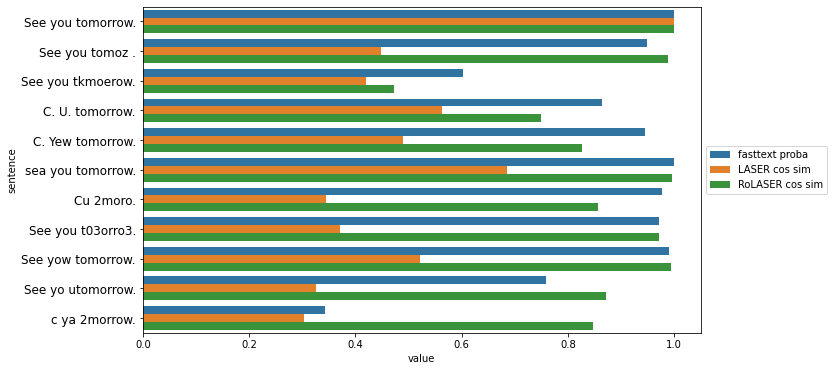

In [ ]:
# set figure size
plt.figure(figsize=(10, 6))
# seaborn horizontal barplot
sns.barplot(data=data, y="sentence", x="value",hue="type", orient="h")
# put legend outisde the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# make bars thicker
plt.yticks(fontsize=12)

<AxesSubplot:xlabel='type', ylabel='value'>

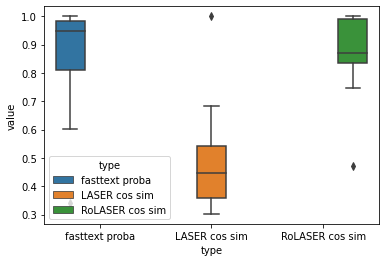

In [ ]:
sns.boxplot(data=data, x="type", y="value",hue="type")

## Fastext proba distribution on UGC files

In [ ]:
def plot_fastext_predictions(fasttext_model, files, correct_lang, plots_dir):
    fig, axs = plt.subplots(2, len(files), figsize=(15, 6))
    for i, (corpus, file) in enumerate(files.items()):
        predictions = []
        with open(file, "r") as f:
            for line in f:
                pred = fasttext_model.predict(line.strip())
                predictions.append({
                    "lang": pred[0][0].replace("__label__", ""),
                    "proba": pred[1][0]
                })
        predictions_df = pd.DataFrame(predictions)
        predictions_df["correct_lang"] = (predictions_df["lang"]==correct_lang)
        _ = predictions_df["correct_lang"].value_counts().plot.pie(ax=axs[0, i])
        axs[0, i].set_title(f"{corpus} ({correct_lang})")
        axs[0, i].set_ylabel(f"Correct lang prediction")
        _ = predictions_df[predictions_df["correct_lang"]]["proba"].plot.hist(ax=axs[1, i])
        axs[1, i].set_xlabel(f"Probability ({correct_lang})")
        
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/fasttext_{correct_lang}_ugc.png")
    plt.show()

### English UGC

In [ ]:
plots_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/draft_experiment/plots"
correct_lang = "en" #"eng_Latn"
files = {
    "rocsmt" : "/home/lnishimw/scratch/datasets/rocsmt/test/raw.en.test",
    "rocsmt-norm" : "/home/lnishimw/scratch/datasets/rocsmt/test/norm.en.test",
    "footweets" : "/home/lnishimw/scratch/datasets/footweets/detok.twitter.sent.en.txt",
    "mtnt" : "/home/lnishimw/scratch/datasets/mtnt/MTNT2019/en-fr.en"
}

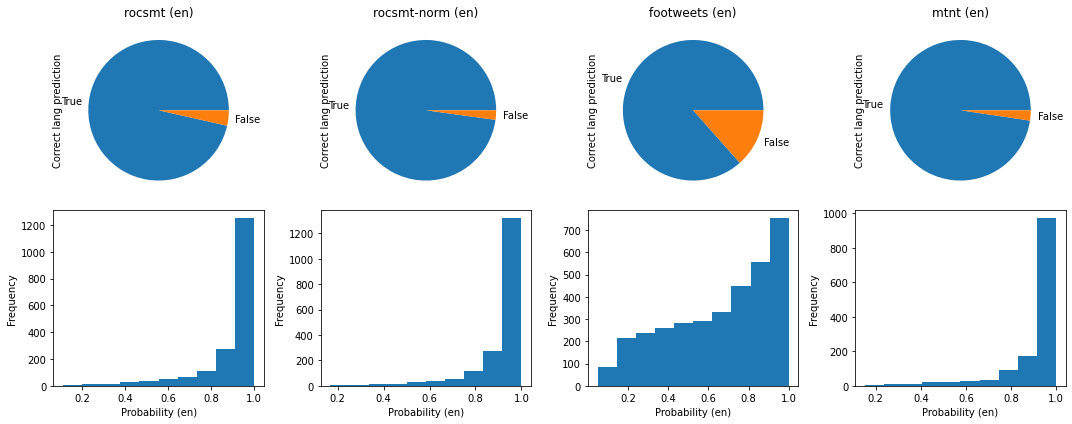

In [ ]:
plot_fastext_predictions(fasttext_model, files, correct_lang, plots_dir)

#### Examples

In [ ]:
noisy_sentences = [
    "Hahaha.",
    "*DRUM ROLL PLEAAE*",
    "Inside you'r body, deep beneathe your skin, muscles, and not beneth your orgens, lurks 1(one) skeletone.",
    "HEERE'Z A QWESHCHUN FER YA.",
    "Oh boi u 2 dum for da movie boi,",
    "da director wuz like shieeet itz bout da hiden meaningz u have 2 find boi, lyke u kno it duznt spoonfeed ya da film ya kno?",
    "Like shieet y it gotta explain m8,"
]

In [ ]:
for sentence in noisy_sentences:
    print(sentence)
    pred = fasttext_model.predict(sentence.strip())
    lang = pred[0][0].replace("__label__", "")
    proba = pred[1][0]
    print(f"\tfasttext: ({lang}, {proba:.2f})")

Hahaha.
	fasttext: (de, 0.17)
*DRUM ROLL PLEAAE*
	fasttext: (ja, 0.54)
Inside you'r body, deep beneathe your skin, muscles, and not beneth your orgens, lurks 1(one) skeletone.
	fasttext: (en, 0.72)
HEERE'Z A QWESHCHUN FER YA.
	fasttext: (en, 0.40)
Oh boi u 2 dum for da movie boi,
	fasttext: (pt, 0.24)
da director wuz like shieeet itz bout da hiden meaningz u have 2 find boi, lyke u kno it duznt spoonfeed ya da film ya kno?
	fasttext: (en, 0.52)
Like shieet y it gotta explain m8,
	fasttext: (en, 0.32)


### French UGC

In [ ]:
plots_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/draft_experiment/plots"
correct_lang = "fr" #"fra_Latn"
files = {
    "foursquare" : "/home/lnishimw/scratch/datasets/foursquare/test.fr",
    "mmtc" : "/home/lnishimw/scratch/datasets/mmtc/test.fr-en.fr",
    "mtnt" : "/home/lnishimw/scratch/datasets/mtnt/MTNT2019/fr-en.fr",
    "pfsmb" : "/home/lnishimw/scratch/datasets/pfsmb/test.fr"
}

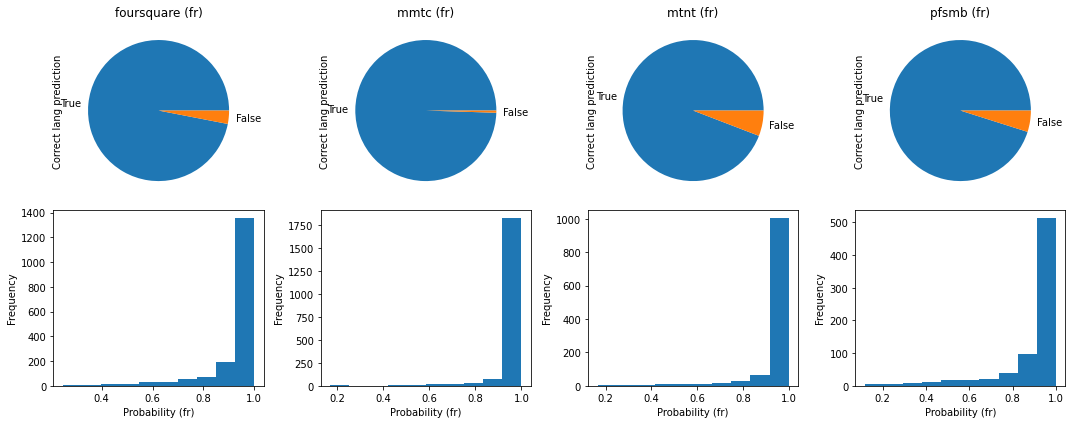

In [ ]:
plot_fastext_predictions(fasttext_model, files, correct_lang, plots_dir)

## Paraphrase mining

In [ ]:
import sys, os
os.environ["LASER"] = "/home/lnishimw/scratch/LASER"
os.environ["FAIRSEQ"] = "/home/lnishimw/scratch/fairseq"
sys.path.append(f"{os.environ['LASER']}/source")
sys.path.append(f"{os.environ['FAIRSEQ']}")
from embed import SentenceEncoder
from lib.text_processing import PreprocessLine
from lib.custom_tokenizers import CustomTokenizer
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import paraphrase_mining
import torch

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

paraphrases = paraphrase_mining(model, sentences)

print("Paraphrases:", len(paraphrases))
n = 10
print(f"Top {n} paraphrases:")
for paraphrase in paraphrases[:n]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

2024-09-11 18:08:15,556 | INFO | sentence_transformers.SentenceTransformer | Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2024-09-11 18:08:15,828 | INFO | sentence_transformers.SentenceTransformer | Use pytorch device: cpu
Paraphrases: 55
Top 10 paraphrases:
C. U. tomorrow. 		 C. Yew tomorrow. 		 Score: 0.7915
C. Yew tomorrow. 		 c ya 2morrow. 		 Score: 0.7316
C. U. tomorrow. 		 c ya 2morrow. 		 Score: 0.6533
See yow tomorrow. 		 C. Yew tomorrow. 		 Score: 0.6377
See yow tomorrow. 		 See yo utomorrow. 		 Score: 0.6260
See you tomorrow. 		 sea you tomorrow. 		 Score: 0.6259
See you tomorrow. 		 See yow tomorrow. 		 Score: 0.5929
See you tomorrow. 		 C. Yew tomorrow. 		 Score: 0.5695
See you tomorrow. 		 C. U. tomorrow. 		 Score: 0.5653
See you tkmoerow. 		 See you t03orro3. 		 Score: 0.5641


In [ ]:
model.modules

<bound method Module.modules of SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)>

In [ ]:
class LaserSentenceTransformer(SentenceTransformer):
    model = None
    tokenizer = None
    
    def __init__(
        self,
        model_path,
        max_sentences=None,
        max_tokens=None,
        vocab=None,
        cpu=False,
        fp16=False,
        verbose=False,
        sort_kind="quicksort",
        tokenizer="spm"
    ):
        super().__init__()
        self.model = SentenceEncoder(
            model_path=model_path, 
            max_sentences=max_sentences, 
            max_tokens=max_tokens,
            vocab=vocab,
            cpu=cpu,
            fp16=fp16,
            verbose=verbose,
            sort_kind=sort_kind,
        )
        self.tokenizer = CustomTokenizer(tokenizer)

    def tokenize(self, sentences):
        preprocessed_sentences = [ PreprocessLine(s) for s in sentences ]
        tokenized_sentences = [ self.tokenizer.tokenize(s) for s in preprocessed_sentences ]
        return { "input_ids": tokenized_sentences }

    def forward(self, features, **kwargs):
        embeddings = self.model.encode_sentences(features["input_ids"])
        return { "sentence_embedding": torch.tensor(embeddings) }
    


In [ ]:
laser_model = LaserSentenceTransformer(
    model_path="/home/lnishimw/scratch/RoLASER/models/LASER/laser2.pt",
    vocab="/home/lnishimw/scratch/RoLASER/models/LASER/laser2.cvocab",
    tokenizer="spm"
)

2024-09-11 19:05:17,828 | INFO | sentence_transformers.SentenceTransformer | Use pytorch device: cpu
LaserSentenceTransformer(
  (0): None
)


In [ ]:
paraphrases = paraphrase_mining(laser_model, sentences)

print("Paraphrases:", len(paraphrases))
n = 10
print(f"Top {n} paraphrases:")
for paraphrase in paraphrases[:n]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

Paraphrases: 55
Top 10 paraphrases:
C. Yew tomorrow. 		 See yow tomorrow. 		 Score: 0.8442
C. U. tomorrow. 		 C. Yew tomorrow. 		 Score: 0.8163
c ya 2morrow. 		 Cu 2moro. 		 Score: 0.8019
See you tomoz . 		 See you tkmoerow. 		 Score: 0.7722
See you tkmoerow. 		 See yo utomorrow. 		 Score: 0.7687
See you t03orro3. 		 See you tkmoerow. 		 Score: 0.7477
See you t03orro3. 		 c ya 2morrow. 		 Score: 0.7024
c ya 2morrow. 		 See yo utomorrow. 		 Score: 0.6940
See you tomorrow. 		 sea you tomorrow. 		 Score: 0.6846
See you tomoz . 		 See yo utomorrow. 		 Score: 0.6825


In [ ]:
rolaser_model = LaserSentenceTransformer(
    model_path="/home/lnishimw/scratch/RoLASER/models/RoLASER/rolaser.pt",
    vocab="/home/lnishimw/scratch/RoLASER/models/RoLASER/rolaser.cvocab",
    tokenizer="roberta"
)

2024-09-11 19:07:12,229 | INFO | sentence_transformers.SentenceTransformer | Use pytorch device: cpu
LaserSentenceTransformer(
  (0): None
)


In [ ]:
paraphrases = paraphrase_mining(rolaser_model, sentences)

print("Paraphrases:", len(paraphrases))
n = 10
print(f"Top {n} paraphrases:")
for paraphrase in paraphrases[:n]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

Paraphrases: 55
Top 10 paraphrases:
See you tomorrow. 		 sea you tomorrow. 		 Score: 0.9957
sea you tomorrow. 		 See yow tomorrow. 		 Score: 0.9937
See you tomorrow. 		 See yow tomorrow. 		 Score: 0.9935
See you tomorrow. 		 See you tomoz . 		 Score: 0.9879
See you tomoz . 		 sea you tomorrow. 		 Score: 0.9874
See you tomoz . 		 See yow tomorrow. 		 Score: 0.9849
See you tomoz . 		 See you t03orro3. 		 Score: 0.9764
See you tomorrow. 		 See you t03orro3. 		 Score: 0.9707
See you t03orro3. 		 sea you tomorrow. 		 Score: 0.9689
See you t03orro3. 		 See yow tomorrow. 		 Score: 0.9669


# SONAR multilingual BLEU and COMET scores

In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bleu_file = "/home/lnishimw/scratch/experiments/robust-embeddings/sonar/experiment_047/scores/bleu_multilingual.csv"
bleu_artificial_file = "/home/lnishimw/scratch/experiments/robust-embeddings/sonar/experiment_047/scores/bleu_artificial.csv"
comet_file = "/home/lnishimw/scratch/experiments/robust-embeddings/sonar/experiment_047/scores/comet_multilingual.csv"
comet_artificial_file = "/home/lnishimw/scratch/experiments/robust-embeddings/sonar/experiment_047/scores/comet_artificial.csv"

In [ ]:
bleu_scores_df = pd.read_csv(bleu_file, index_col=0)
comet_scores_df = pd.read_csv(comet_file, index_col=0)
bleu_artificial_scores_df = pd.read_csv(bleu_artificial_file, index_col=0)
comet_artificial_scores_df = pd.read_csv(comet_artificial_file, index_col=0)

## Statistical testing

In [ ]:
bleu_scores_df

model  rocsmt__eng_Latn-ces_Latn__raw.en.test  \
0  NLLB-1.3B                                   19.90   
1      SONAR                                   17.24   
2  NLLB-600M                                   16.88   
3    RoSONAR                                   10.05   

   rocsmt__eng_Latn-ces_Latn__norm.en.test  \
0                                    24.17   
1                                    21.13   
2                                    21.45   
3                                    12.79   

   rocsmt__eng_Latn-deu_Latn__raw.en.test  \
0                                   31.67   
1                                   28.81   
2                                   28.67   
3                                   16.85   

   rocsmt__eng_Latn-deu_Latn__norm.en.test  \
0                                    38.91   
1                                    35.98   
2                                    36.61   
3                                    22.16   

   rocsmt__eng_Latn-fra_Latn__raw.en.test  \
0                                   20.32   
1                                   19.24   
2                                   18.70   
3                                   11.99   

   rocsmt__eng_Latn-fra_Latn__norm.en.test  \
0                                    26.27   
1                                    24.70   
2                                    24.46   
3                                    15.80   

   rocsmt__eng_Latn-rus_Cyrl__raw.en.test  \
0                                   17.17   
1                                   15.71   
2                                   15.07   
3                                    9.49   

   rocsmt__eng_Latn-rus_Cyrl__norm.en.test  \
0                                    21.31   
1                                    19.05   
2                                    19.13   
3                                    11.99   

   rocsmt__eng_Latn-ukr_Cyrl__raw.en.test  ...  \
0                                   19.36  ...   
1                                   18.25  ...   
2                                   16.73  ...   
3                                   11.20  ...   

   flores200__eng_Latn-ukr_Cyrl__eng_Latn.devtest  avg__rocsmt__norm.en.test  \
0                                           26.34                      26.92   
1                                           22.94                      24.50   
2                                           22.55                      24.57   
3                                           14.66                      15.33   

   avg__rocsmt__raw.en.test  avg__flores200__eng_Latn.devtest  \
0                     21.68                             33.41   
1                     19.85                             30.67   
2                     19.21                             30.26   
3                     11.92                             20.17   

   delta__rocsmt__eng_Latn-ces_Latn  delta__rocsmt__eng_Latn-deu_Latn  \
0                             -4.27                             -7.24   
1                             -3.89                             -7.17   
2                             -4.57                             -7.94   
3                             -2.74                             -5.31   

   delta__rocsmt__eng_Latn-fra_Latn  delta__rocsmt__eng_Latn-rus_Cyrl  \
0                             -5.95                             -4.14   
1                             -5.46                             -3.34   
2                             -5.76                             -4.06   
3                             -3.81                             -2.50   

   delta__rocsmt__eng_Latn-ukr_Cyrl  delta__avg__rocsmt  
0                             -4.59               -5.24  
1                             -3.40               -4.65  
2                             -4.48               -5.36  
3                             -2.73               -3.41  

[4 rows x 25 columns]

In [ ]:
delta_rocsmt_columns = bleu_scores_df.columns[bleu_scores_df.columns.str.startswith("delta__rocsmt")]
delta_rocsmt_columns

Index(['delta__rocsmt__eng_Latn-ces_Latn', 'delta__rocsmt__eng_Latn-deu_Latn',
       'delta__rocsmt__eng_Latn-fra_Latn', 'delta__rocsmt__eng_Latn-rus_Cyrl',
       'delta__rocsmt__eng_Latn-ukr_Cyrl'],
      dtype='object')

In [ ]:
model = "NLLB-1.3B"
bleu_scores_df[bleu_scores_df["model"] == model]

model  rocsmt__eng_Latn-ces_Latn__raw.en.test  \
0  NLLB-1.3B                                    19.9   

   rocsmt__eng_Latn-ces_Latn__norm.en.test  \
0                                    24.17   

   rocsmt__eng_Latn-deu_Latn__raw.en.test  \
0                                   31.67   

   rocsmt__eng_Latn-deu_Latn__norm.en.test  \
0                                    38.91   

   rocsmt__eng_Latn-fra_Latn__raw.en.test  \
0                                   20.32   

   rocsmt__eng_Latn-fra_Latn__norm.en.test  \
0                                    26.27   

   rocsmt__eng_Latn-rus_Cyrl__raw.en.test  \
0                                   17.17   

   rocsmt__eng_Latn-rus_Cyrl__norm.en.test  \
0                                    21.31   

   rocsmt__eng_Latn-ukr_Cyrl__raw.en.test  ...  avg__rocsmt__norm.en.test  \
0                                   19.36  ...                      26.92   

   avg__rocsmt__raw.en.test  avg__flores200__eng_Latn.devtest  \
0                     21.68                             33.41   

   delta__rocsmt__eng_Latn-ces_Latn  delta__rocsmt__eng_Latn-deu_Latn  \
0                             -4.27                             -7.24   

   delta__rocsmt__eng_Latn-fra_Latn  delta__rocsmt__eng_Latn-rus_Cyrl  \
0                             -5.95                             -4.14   

   delta__rocsmt__eng_Latn-ukr_Cyrl  delta__avg__rocsmt  delta_rocsmt_ttest  
0                             -4.59               -5.24                True  

[1 rows x 26 columns]

In [ ]:
len(comet_scores_df.columns)

32

In [ ]:
len(comet_scores_df.columns.str.contains(COLUMN_NAME_SEPARATOR))

32

In [ ]:
columns_to_multiply = comet_scores_df.columns[comet_scores_df.columns.str.contains(COLUMN_NAME_SEPARATOR)]


In [ ]:
comet_scores_df[columns_to_multiply]

flores200__eng_Latn-ces_Latn__eng_Latn.devtest  \
model                                                       
NLLB-1.3B                                           89.17   
SONAR                                               88.19   
NLLB-600M                                           86.00   

           rocsmt__eng_Latn-ces_Latn__norm.en.test  \
model                                                
NLLB-1.3B                                    82.58   
SONAR                                        81.94   
NLLB-600M                                    79.93   

           rocsmt__eng_Latn-ces_Latn__raw.en.test  \
model                                               
NLLB-1.3B                                   78.06   
SONAR                                       76.88   
NLLB-600M                                   73.88   

           delta__flores200__eng_Latn-ces_Latn  \
model                                            
NLLB-1.3B                                -6.59   
SONAR                                    -6.25   
NLLB-600M                                -6.07   

           delta__rocsmt__eng_Latn-ces_Latn  \
model                                         
NLLB-1.3B                             -4.52   
SONAR                                 -5.06   
NLLB-600M                             -6.05   

           flores200__eng_Latn-deu_Latn__eng_Latn.devtest  \
model                                                       
NLLB-1.3B                                           86.20   
SONAR                                               85.67   
NLLB-600M                                           84.25   

           rocsmt__eng_Latn-deu_Latn__norm.en.test  \
model                                                
NLLB-1.3B                                    82.45   
SONAR                                        82.11   
NLLB-600M                                    80.25   

           rocsmt__eng_Latn-deu_Latn__raw.en.test  \
model                                               
NLLB-1.3B                                   77.12   
SONAR                                       75.80   
NLLB-600M                                   73.88   

           delta__flores200__eng_Latn-deu_Latn  \
model                                            
NLLB-1.3B                                -3.75   
SONAR                                    -3.56   
NLLB-600M                                -4.00   

           delta__rocsmt__eng_Latn-deu_Latn  ...  \
model                                        ...   
NLLB-1.3B                             -5.33  ...   
SONAR                                 -6.31  ...   
NLLB-600M                             -6.37  ...   

           rocsmt__eng_Latn-ukr_Cyrl__raw.en.test  \
model                                               
NLLB-1.3B                                   76.15   
SONAR                                       75.13   
NLLB-600M                                   72.02   

           delta__flores200__eng_Latn-ukr_Cyrl  \
model                                            
NLLB-1.3B                                -6.16   
SONAR                                    -5.36   
NLLB-600M                                -6.35   

           delta__rocsmt__eng_Latn-ukr_Cyrl  avg__flores200__eng_Latn.devtest  \
model                                                                           
NLLB-1.3B                             -4.85                             87.53   
SONAR                                 -4.78                             86.61   
NLLB-600M                             -5.59                             85.15   

           avg__rocsmt__norm.en.test  avg__rocsmt__raw.en.test  \
model                                                            
NLLB-1.3B                      80.50                     75.73   
SONAR                          79.94                     74.82   
NLLB-600M                      77.97                     72.27   

           delta__avg__flores200  delta__avg__rocsmt  \
model           

In [ ]:
COLUMN_NAME_SEPARATOR = "__"

def statistical_significance(scores, column_name_prefixes, p_value_threshold=0.05):
    for column_name_prefix in column_name_prefixes:
        columns = scores.columns[scores.columns.str.startswith(column_name_prefix)]
        print(columns)
        p_values = np.array([ ttest_1samp(scores[scores["model"] == model][columns].values.flatten(), 0)[1] for model in scores["model"] ])
        print(p_values)
        column_name = column_name_prefix + COLUMN_NAME_SEPARATOR + "significant"
        scores[column_name] = p_values < p_value_threshold
    return scores


In [ ]:
prefixes = ["delta" + COLUMN_NAME_SEPARATOR + "rocsmt"]
prefixes

['delta__rocsmt']

In [ ]:
statistical_significance(bleu_scores_df, prefixes)

Index(['delta__rocsmt__eng_Latn-ces_Latn', 'delta__rocsmt__eng_Latn-deu_Latn',
       'delta__rocsmt__eng_Latn-fra_Latn', 'delta__rocsmt__eng_Latn-rus_Cyrl',
       'delta__rocsmt__eng_Latn-ukr_Cyrl'],
      dtype='object')
[0.00091778 0.00322125 0.00159289 0.00286948]


model  rocsmt__eng_Latn-ces_Latn__raw.en.test  \
0  NLLB-1.3B                                   19.90   
1      SONAR                                   17.24   
2  NLLB-600M                                   16.88   
3    RoSONAR                                   10.05   

   rocsmt__eng_Latn-ces_Latn__norm.en.test  \
0                                    24.17   
1                                    21.13   
2                                    21.45   
3                                    12.79   

   rocsmt__eng_Latn-deu_Latn__raw.en.test  \
0                                   31.67   
1                                   28.81   
2                                   28.67   
3                                   16.85   

   rocsmt__eng_Latn-deu_Latn__norm.en.test  \
0                                    38.91   
1                                    35.98   
2                                    36.61   
3                                    22.16   

   rocsmt__eng_Latn-fra_Latn__raw.en.test  \
0                                   20.32   
1                                   19.24   
2                                   18.70   
3                                   11.99   

   rocsmt__eng_Latn-fra_Latn__norm.en.test  \
0                                    26.27   
1                                    24.70   
2                                    24.46   
3                                    15.80   

   rocsmt__eng_Latn-rus_Cyrl__raw.en.test  \
0                                   17.17   
1                                   15.71   
2                                   15.07   
3                                    9.49   

   rocsmt__eng_Latn-rus_Cyrl__norm.en.test  \
0                                    21.31   
1                                    19.05   
2                                    19.13   
3                                    11.99   

   rocsmt__eng_Latn-ukr_Cyrl__raw.en.test  ...  avg__rocsmt__norm.en.test  \
0                                   19.36  ...                      26.92   
1                                   18.25  ...                      24.50   
2                                   16.73  ...                      24.57   
3                                   11.20  ...                      15.33   

   avg__rocsmt__raw.en.test  avg__flores200__eng_Latn.devtest  \
0                     21.68                             33.41   
1                     19.85                             30.67   
2                     19.21                             30.26   
3                     11.92                             20.17   

   delta__rocsmt__eng_Latn-ces_Latn  delta__rocsmt__eng_Latn-deu_Latn  \
0                             -4.27                             -7.24   
1                             -3.89                             -7.17   
2                             -4.57                             -7.94   
3                             -2.74                             -5.31   

   delta__rocsmt__eng_Latn-fra_Latn  delta__rocsmt__eng_Latn-rus_Cyrl  \
0                             -5.95                             -4.14   
1                             -5.46                             -3.34   
2                             -5.76                             -4.06   
3                             -3.81                             -2.50   

   delta__rocsmt__eng_Latn-ukr_Cyrl  delta__avg__rocsmt  \
0                             -4.59               -5.24   
1                             -3.40               -4.65   
2                             -4.48               -5.36   
3                             -2.73               -3.41   

   delta__rocsmt__significant  
0                        True  
1                        True  
2                        True  
3                        True  

[4 rows x 26 columns]

In [ ]:
delta_rocsmt_pvalues = np.array([ ttest_1samp(bleu_scores_df[bleu_scores_df["model"] == model][delta_rocsmt_columns].values.flatten(), 0)[1] for model in bleu_scores_df["model"] ])
delta_rocsmt_pvalues

array([0.00091778, 0.00322125, 0.00159289, 0.00286948])

In [ ]:
bleu_scores_df["delta_rocsmt_significant"] = delta_rocsmt_pvalues < 0.05

In [ ]:
bleu_scores_df

model  rocsmt__eng_Latn-ces_Latn__raw.en.test  \
0  NLLB-1.3B                                   19.90   
1      SONAR                                   17.24   
2  NLLB-600M                                   16.88   
3    RoSONAR                                   10.05   

   rocsmt__eng_Latn-ces_Latn__norm.en.test  \
0                                    24.17   
1                                    21.13   
2                                    21.45   
3                                    12.79   

   rocsmt__eng_Latn-deu_Latn__raw.en.test  \
0                                   31.67   
1                                   28.81   
2                                   28.67   
3                                   16.85   

   rocsmt__eng_Latn-deu_Latn__norm.en.test  \
0                                    38.91   
1                                    35.98   
2                                    36.61   
3                                    22.16   

   rocsmt__eng_Latn-fra_Latn__raw.en.test  \
0                                   20.32   
1                                   19.24   
2                                   18.70   
3                                   11.99   

   rocsmt__eng_Latn-fra_Latn__norm.en.test  \
0                                    26.27   
1                                    24.70   
2                                    24.46   
3                                    15.80   

   rocsmt__eng_Latn-rus_Cyrl__raw.en.test  \
0                                   17.17   
1                                   15.71   
2                                   15.07   
3                                    9.49   

   rocsmt__eng_Latn-rus_Cyrl__norm.en.test  \
0                                    21.31   
1                                    19.05   
2                                    19.13   
3                                    11.99   

   rocsmt__eng_Latn-ukr_Cyrl__raw.en.test  ...  avg__rocsmt__norm.en.test  \
0                                   19.36  ...                      26.92   
1                                   18.25  ...                      24.50   
2                                   16.73  ...                      24.57   
3                                   11.20  ...                      15.33   

   avg__rocsmt__raw.en.test  avg__flores200__eng_Latn.devtest  \
0                     21.68                             33.41   
1                     19.85                             30.67   
2                     19.21                             30.26   
3                     11.92                             20.17   

   delta__rocsmt__eng_Latn-ces_Latn  delta__rocsmt__eng_Latn-deu_Latn  \
0                             -4.27                             -7.24   
1                             -3.89                             -7.17   
2                             -4.57                             -7.94   
3                             -2.74                             -5.31   

   delta__rocsmt__eng_Latn-fra_Latn  delta__rocsmt__eng_Latn-rus_Cyrl  \
0                             -5.95                             -4.14   
1                             -5.46                             -3.34   
2                             -5.76                             -4.06   
3                             -3.81                             -2.50   

   delta__rocsmt__eng_Latn-ukr_Cyrl  delta__avg__rocsmt  delta_rocsmt_ttest  
0                             -4.59               -5.24                True  
1                             -3.40               -4.65                True  
2                             -4.48               -5.36                True  
3                             -2.73               -3.41                True  

[4 rows x 26 columns]

## Proba plots by language

In [ ]:
multilingual_scores = {}
artificial_scores = {}
multilingual_scores["bleu"] = pd.read_csv(bleu_file, index_col=0)
multilingual_scores["comet"] = pd.read_csv(comet_file, index_col=0)
artificial_scores["bleu"] = pd.read_csv(bleu_artificial_file, index_col=0)
artificial_scores["comet"] = pd.read_csv(comet_artificial_file, index_col=0)

In [ ]:
multilingual_scores["comet"]

model  flores200__eng_Latn-ces_Latn__eng_Latn.devtest  \
0  NLLB-1.3B                                           89.17   
1      SONAR                                           88.19   
2  NLLB-600M                                           86.00   

   rocsmt__eng_Latn-ces_Latn__norm.en.test  \
0                                    82.58   
1                                    81.94   
2                                    79.93   

   rocsmt__eng_Latn-ces_Latn__raw.en.test  \
0                                   78.06   
1                                   76.88   
2                                   73.88   

   delta__flores200__eng_Latn-ces_Latn  delta__rocsmt__eng_Latn-ces_Latn  \
0                                -6.59                             -4.52   
1                                -6.25                             -5.06   
2                                -6.07                             -6.05   

   flores200__eng_Latn-deu_Latn__eng_Latn.devtest  \
0                                           86.20   
1                                           85.67   
2                                           84.25   

   rocsmt__eng_Latn-deu_Latn__norm.en.test  \
0                                    82.45   
1                                    82.11   
2                                    80.25   

   rocsmt__eng_Latn-deu_Latn__raw.en.test  \
0                                   77.12   
1                                   75.80   
2                                   73.88   

   delta__flores200__eng_Latn-deu_Latn  ...  \
0                                -3.75  ...   
1                                -3.56  ...   
2                                -4.00  ...   

   rocsmt__eng_Latn-ukr_Cyrl__raw.en.test  \
0                                   76.15   
1                                   75.13   
2                                   72.02   

   delta__flores200__eng_Latn-ukr_Cyrl  delta__rocsmt__eng_Latn-ukr_Cyrl  \
0                                -6.16                             -4.85   
1                                -5.36                             -4.78   
2                                -6.35                             -5.59   

   avg__flores200__eng_Latn.devtest  avg__rocsmt__norm.en.test  \
0                             87.53                      80.50   
1                             86.61                      79.94   
2                             85.15                      77.97   

   avg__rocsmt__raw.en.test  delta__avg__flores200  delta__avg__rocsmt  \
0                     75.73                  -7.03               -4.77   
1                     74.82                  -6.67               -5.12   
2                     72.27                  -7.18               -5.70   

   delta__flores200__significant  delta__rocsmt__significant  
0                           True                        True  
1                           True                        True  
2                           True                        True  

[3 rows x 33 columns]

In [ ]:
artificial_scores["comet"].describe()

seed      proba  \
count    75.000000  75.000000   
mean   1002.000000   0.300000   
std       1.423737   0.142374   
min    1000.000000   0.100000   
25%    1001.000000   0.200000   
50%    1002.000000   0.300000   
75%    1003.000000   0.400000   
max    1004.000000   0.500000   

       rocsmt_artificial__eng_Latn-ces_Latn__norm.en_mix_all.test  \
count                                          75.000000            
mean                                           58.896533            
std                                             8.851774            
min                                            41.940000            
25%                                            52.585000            
50%                                            57.940000            
75%                                            66.405000            
max                                            74.840000            

       rocsmt_artificial__eng_Latn-deu_Latn__norm.en_mix_all.test  \
count                                          75.000000            
mean                                           57.116667            
std                                             8.943751            
min                                            41.400000            
25%                                            50.150000            
50%                                            56.620000            
75%                                            63.650000            
max                                            73.460000            

       rocsmt_artificial__eng_Latn-fra_Latn__norm.en_mix_all.test  \
count                                          75.000000            
mean                                           56.166400            
std                                             7.541455            
min                                            43.240000            
25%                                            50.455000            
50%                                            55.840000            
75%                                            61.610000            
max                                            69.750000            

       rocsmt_artificial__eng_Latn-rus_Cyrl__norm.en_mix_all.test  \
count                                          75.000000            
mean                                           57.767600            
std                                             7.819258            
min                                            43.280000            
25%                                            51.845000            
50%                                            57.440000            
75%                                            63.860000            
max                                            71.970000            

       rocsmt_artificial__eng_Latn-ukr_Cyrl__norm.en_mix_all.test        avg  
count                                          75.000000           75.000000  
mean                                           58.024000           57.593867  
std                                             8.428585            8.307346  
min                                            42.660000           42.500000  
25%                                            51.745000           51.300000  
50%                                            57.730000           57.000000  
75%                                            64.700000           64.090000  
max                                            73.380000           72.560000

In [ ]:
ROCSMT_NORM_FILE_NAME = "norm.en.test"
ROCSMT_RAW_FILE_NAME = "raw.en.test"
COLUMN_NAME_SEPARATOR = "__"


In [ ]:
target_langs = sorted(set([ col.split('__')[1].split('-')[1] for col in artificial_scores["comet"].columns if col.startswith("rocsmt")]))
target_langs

['ces_Latn', 'deu_Latn', 'fra_Latn', 'rus_Cyrl', 'ukr_Cyrl']

In [ ]:
seeds = artificial_scores["comet"]["seed"].unique()
probas = np.insert(artificial_scores["comet"]["proba"].unique(), 0, 0.0)
models = multilingual_scores["comet"]["model"].unique()


In [ ]:
artificial_scores["comet"]["model"].unique()

array(['NLLB-1.3B', 'SONAR', 'NLLB-600M'], dtype=object)

In [ ]:
artificial_scores["comet"]["seed"]

0     1000
1     1000
2     1000
3     1000
4     1000
      ... 
70    1004
71    1004
72    1004
73    1004
74    1004
Name: seed, Length: 75, dtype: int64

In [ ]:
target_langs

['ces_Latn', 'deu_Latn', 'fra_Latn', 'rus_Cyrl', 'ukr_Cyrl']

In [ ]:
seeds

array([1000, 1001, 1002, 1003, 1004])

In [ ]:
models

array(['NLLB-1.3B', 'SONAR', 'NLLB-600M'], dtype=object)

In [ ]:
probas

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [ ]:
for metric in multilingual_scores.keys():
    multilingual_scores[metric].set_index("model", inplace=True)

KeyError: "None of ['model'] are in the columns"

In [ ]:
COLORS = plt.cm.tab10.colors
METRIC_NAMES = {
    "bleu": "BLEU",
    "comet": "COMET",
}

In [ ]:
plots_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/sonar/experiment_047/scores"

In [ ]:
LANG_NAMES = {
    "eng_Latn": "English",
    "fra_Latn": "French",
    "deu_Latn": "German",
    "ces_Latn": "Czech",
    "rus_Cyrl": "Russian",
    "ukr_Cyrl": "Ukrainian",
    "jap_Japn": "Japanese"
}

In [ ]:
def plot_probas(
        artificial_scores, 
        multilingual_scores, 
        metric,
        models,
        seeds, 
        arti_score_column, 
        norm_score_column, 
        raw_score_column,
        ax
    ):
    columns = ["model", "seed", "proba", "score"]
    arti_data = artificial_scores[metric][columns[:3]]
    arti_data["score"] = artificial_scores[metric][arti_score_column]
    multi_data = pd.DataFrame(columns=columns)
    multi_data["model"] = np.repeat(models, len(seeds))
    multi_data["seed"] = np.tile(seeds, len(multilingual_scores[metric]))
    multi_data["proba"] = np.repeat(0, len(multilingual_scores[metric])*len(seeds))
    multi_data["score"] = np.repeat(multilingual_scores[metric][norm_score_column].values, len(seeds))
    plot_data = pd.concat([arti_data, multi_data], ignore_index=True)
    g = sns.lineplot(data=plot_data, x="proba", y="score", hue="model", style="model", markers=True, dashes=False, ax=ax)
    _, labels = g.get_legend_handles_labels()
    for k, model in enumerate(labels):
        g.axhline(multilingual_scores[metric][raw_score_column].loc[model], ls="dashdot", c=COLORS[k])
    g.grid()
    return g
    


In [ ]:
import matplotlib.ticker as ticker

/scratch/lnishimw/miniconda3/envs/laser_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/scratch/lnishimw/miniconda3/envs/laser_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/scratch/lnishimw/miniconda3/envs/laser_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

<Figure size 432x288 with 0 Axes>

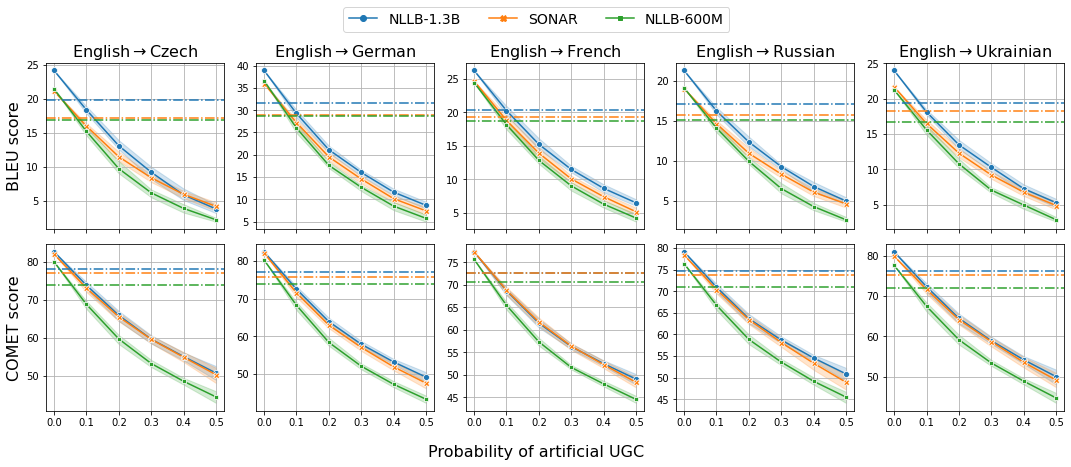

In [ ]:
plt.clf()
output_file = f"{plots_dir}/noise_proba_plot_all.pdf"
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, figsize=(15, 6))

for i, metric in enumerate(artificial_scores.keys()):
    axes[i, 0].set_ylabel(f"{METRIC_NAMES[metric]} score", fontsize=16)
    for j, lang in enumerate(target_langs):
        axes[0, j].set_title(r"English$\rightarrow$" + LANG_NAMES[lang], fontsize=16)
        g = plot_probas(
            artificial_scores, 
            multilingual_scores, 
            metric,
            models,
            seeds,
            arti_score_column=f"rocsmt_artificial__eng_Latn-{lang}__norm.en_mix_all.test", 
            norm_score_column=f"rocsmt__eng_Latn-{lang}__norm.en.test", 
            raw_score_column=f"rocsmt__eng_Latn-{lang}__raw.en.test", 
            ax=axes[i, j]
        )
                
fig.supxlabel("Probability of artificial UGC", fontsize=16)

for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_xticks(probas)
    # ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Remove individual legends
for ax in axes[:,1:].flat:
    ax.set_ylabel('')
# Remove individual legends
for ax in axes.flat:
    ax.legend_.remove()
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, 1.075), ncol=3)
# axes[0,-1].legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.savefig(output_file, bbox_inches='tight')
plt.show()

In [ ]:
g.axes.set_ylabel("hello")

Text(865.585, 0.5, 'hello')

# Counting usernames, hashtags and URLs

In [ ]:
import re

def find_usernames_hashtags_urls(text):
    # Regular expression patterns
    url_pattern = r'https?://[^\s]+'              # Matches URLs starting with http or https
    username_pattern = r'@\w+'                    # Matches usernames starting with '@' and followed by word characters
    hashtag_pattern = r'#\w+'                     # Matches hashtags starting with '#' and followed by word characters

    return {
        "urls": re.findall(url_pattern, text), 
        "usernames": re.findall(username_pattern, text), 
        "hashtags": re.findall(hashtag_pattern, text)
    }

def count_usernames_hashtags_urls(input_file):
    urls = []
    usernames = []
    hashtags = []
    for line in open(input_file, "r"):
        results = find_usernames_hashtags_urls(line)
        urls.extend(results["urls"])
        usernames.extend(results["usernames"])
        hashtags.extend(results["hashtags"])
    return {
        "file": input_file,
        "urls": len(urls),
        "usernames": len(usernames),
        "hashtags": len(hashtags)
    }

In [ ]:
input_files = [
    "/home/lnishimw/scratch/datasets/rocsmt/test/raw.en.test",
    "/home/lnishimw/scratch/datasets/rocsmt/test/norm.en.test",
    "/home/lnishimw/scratch/datasets/footweets/detok.twitter.sent.en.txt",
    "/home/lnishimw/scratch/datasets/mmtc/test.fr-en.fr",
    "/home/lnishimw/scratch/datasets/pfsmb/test.fr",
    "/home/lnishimw/scratch/datasets/foursquare/test.fr",
    "/home/lnishimw/scratch/datasets/mtnt/MTNT2019/en-fr.en",
    "/home/lnishimw/scratch/datasets/mtnt/MTNT2019/fr-en.en"
]

counts = [ count_usernames_hashtags_urls(file) for file in input_files ]

In [ ]:
find_usernames_hashtags_urls("This is a #sent#ence full of #hashtags. #")

{'urls': [], 'usernames': [], 'hashtags': ['#sent', '#ence', '#hashtags']}

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(counts)

In [ ]:
data["sum"] = data["urls"] + data["usernames"] + data["hashtags"]
data

file  urls  usernames  \
0  /home/lnishimw/scratch/datasets/rocsmt/test/ra...     0          1   
1  /home/lnishimw/scratch/datasets/rocsmt/test/no...     0          1   
2  /home/lnishimw/scratch/datasets/footweets/deto...  1269        603   
3  /home/lnishimw/scratch/datasets/mmtc/test.fr-e...     2       1752   
4      /home/lnishimw/scratch/datasets/pfsmb/test.fr    52         70   
5  /home/lnishimw/scratch/datasets/foursquare/tes...     0          0   
6  /home/lnishimw/scratch/datasets/mtnt/MTNT2019/...     0          1   
7  /home/lnishimw/scratch/datasets/mtnt/MTNT2019/...     0          0   

   hashtags   sum  
0         2     3  
1         1     2  
2      8011  9883  
3        40  1794  
4       168   290  
5         9     9  
6         4     5  
7         7     7

[]

In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'model': ["nllb1n", "sonar", "nllb600m"],
    'file1': [4, 5, 6],
    'file2': [7, 8, 9]
})

# Transpose the DataFrame and keep the column names
df_transposed = df.T.reset_index()

# Rename the index column (optional)
df_transposed.columns = ['Original Column'] + list(df_transposed.columns[1:])

# Print the transposed DataFrame
print(df_transposed)


  Original Column  0  1  2
0               A  1  2  3
1               B  4  5  6
2               C  7  8  9


In [ ]:
df = pd.DataFrame({
    'model': ["nllb1n", "sonar", "nllb600m"],
    'file1': [4, 5, 6],
    'file2': [7, 8, 9]
})

In [ ]:
df

model  file1  file2
0    nllb1n      4      7
1     sonar      5      8
2  nllb600m      6      9

In [ ]:
del df_transposed

In [ ]:
df[df.columns[1:]]

file1  file2
0      4      7
1      5      8
2      6      9

In [ ]:
df_transposed = pd.DataFrame()
df_transposed["corpus"] = df.columns[1:]
df_transposed[df["model"]] = df[df.columns[1:]].T.values
df_transposed

corpus  nllb1n  sonar  nllb600m
0  file1       4      5         6
1  file2       7      8         9

In [ ]:
df.set_index("model").T

model  nllb1n  sonar  nllb600m
file1       4      5         6
file2       7      8         9

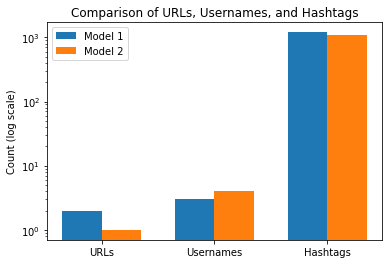

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['URLs', 'Usernames', 'Hashtags']
model_1 = [2, 3, 1200]    # Model 1 values
model_2 = [1, 4, 1100]    # Model 2 values

x = np.arange(len(categories))  # the label locations

fig, ax = plt.subplots()
width = 0.35  # the width of the bars

# Create bar plot with log scale
ax.bar(x - width/2, model_1, width, label='Model 1')
ax.bar(x + width/2, model_2, width, label='Model 2')

# Logarithmic scale on y-axis
ax.set_yscale('log')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Count (log scale)')
ax.set_title('Comparison of URLs, Usernames, and Hashtags')
ax.legend()

# Display plot
plt.show()


# Text segmentation (sentence splitting)

## RoCS-MT

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_seg_stats.en.csv")

In [ ]:
old_data = pd.DataFrame([
    {'model': 'manual', 'elapsed_time': 0, 'n_sentences': 1922},
    {'model': 'spacy', 'elapsed_time': 0, 'n_sentences': 1660}
])

data = pd.concat([old_data, data], ignore_index=True)

In [ ]:
data

model  elapsed_time  n_sentences
0       manual      0.000000         1922
1        spacy      0.000000         1660
2       sat-1l      5.623822         2354
3    sat-1l-sm      7.572127         2117
4       sat-3l      8.216899         2004
5    sat-3l-sm      7.963756         2092
6       sat-6l     11.387281         1875
7    sat-6l-sm     11.759553         1983
8       sat-9l     11.133920         1972
9    sat-9l-sm     10.835060         1929
10     sat-12l     11.801494         1803
11  sat-12l-sm     11.697051         1941

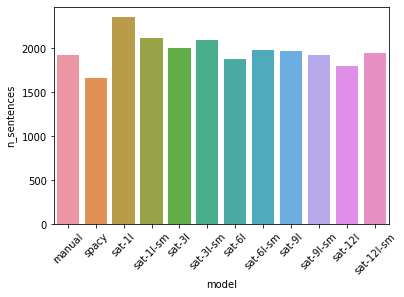

In [ ]:
sns.barplot(data=data, x="model", y="n_sentences")
plt.xticks(rotation=45)
plt.savefig("/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_seg_sentences.en.png")

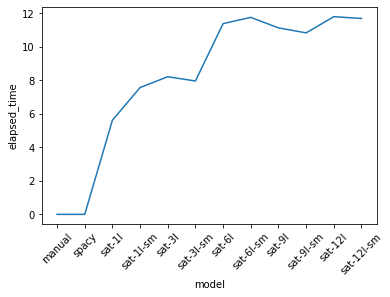

In [ ]:
sns.lineplot(data=data, x="model", y="elapsed_time")
plt.xticks(rotation=45)
plt.savefig("/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_seg_time.en.png")

In [ ]:
from nltk.metrics import windowdiff

In [ ]:
import Levenshtein
from jiwer import cer

In [ ]:
ref_file = "/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_manual_seg.en"
with open(ref_file, "r") as f:
    ref = f.read()

edit_ratios = []
char_error_rates = []
for model in data["model"]:
    hyp_file = f"/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_{model}_seg.en"
    
    with open(hyp_file, "r") as f:
        hyp = f.read()

    edit_ratios.append(Levenshtein.ratio(ref, hyp)*100)
    char_error_rates.append(cer(ref, hyp)*100)


In [ ]:
edit_ratios

[100.0,
 98.80469316408993,
 99.0229817458842,
 99.08096612486709,
 99.13870071844593,
 99.13367135722288,
 99.16602680573823,
 99.1899265158481,
 99.13707609005414,
 99.19812109511575,
 99.18024683847517,
 99.21259842519686]

In [ ]:
char_error_rates

[0.0,
 1.9249587181212158,
 1.736132346645465,
 1.5862944162436547,
 1.484618677756712,
 1.5243715980673966,
 1.4074062748455751,
 1.4249892972906857,
 1.473915968442297,
 1.3967035655311602,
 1.365359916824659,
 1.3860008562167452]

In [ ]:
data["edit_ratios"] = edit_ratios
data["char_error_rates"] = char_error_rates

In [ ]:
data

model  elapsed_time  n_sentences  edit_ratios  char_error_rates
0       manual      0.000000         1922   100.000000          0.000000
1        spacy      0.000000         1660    98.804693          1.924959
2       sat-1l      5.623822         2354    99.022982          1.736132
3    sat-1l-sm      7.572127         2117    99.080966          1.586294
4       sat-3l      8.216899         2004    99.138701          1.484619
5    sat-3l-sm      7.963756         2092    99.133671          1.524372
6       sat-6l     11.387281         1875    99.166027          1.407406
7    sat-6l-sm     11.759553         1983    99.189927          1.424989
8       sat-9l     11.133920         1972    99.137076          1.473916
9    sat-9l-sm     10.835060         1929    99.198121          1.396704
10     sat-12l     11.801494         1803    99.180247          1.365360
11  sat-12l-sm     11.697051         1941    99.212598          1.386001

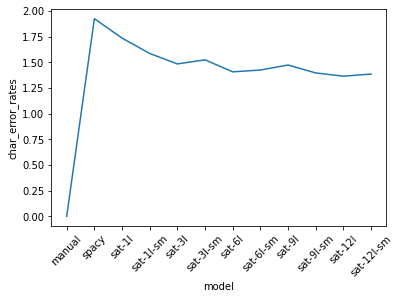

In [ ]:
sns.lineplot(data=data, x="model", y="char_error_rates")
plt.xticks(rotation=45)
plt.savefig("/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_seg_cer.en.png")

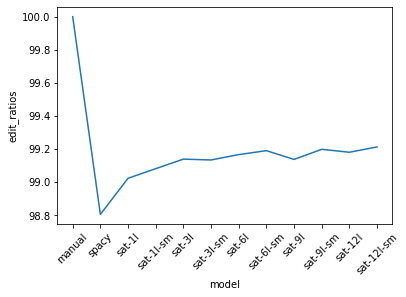

In [ ]:
sns.lineplot(data=data, x="model", y="edit_ratios")
plt.xticks(rotation=45)
plt.savefig("/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_seg_edit.en.png")

## PFSMB

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/home/lnishimw/scratch/datasets/pfsmb/segment/PFSMB.test.raw_seg_stats.fr.csv")

In [ ]:
data

model  elapsed_time  n_sentences
0      sat-1l      3.319518         2470
1   sat-1l-sm      3.090235         1472
2      sat-3l      8.750226         2013
3   sat-3l-sm      9.158622         1580
4      sat-6l     10.076353         1921
5   sat-6l-sm      9.488062         1431
6      sat-9l     11.725175         2336
7   sat-9l-sm     12.267937         1420
8     sat-12l     14.117072         1764
9  sat-12l-sm     13.832662         1490

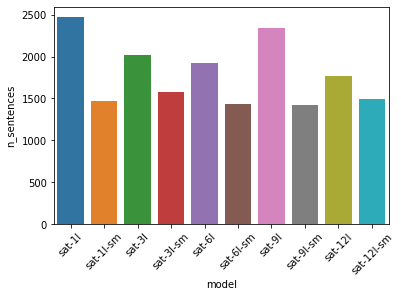

In [ ]:
sns.barplot(data=data, x="model", y="n_sentences")
plt.xticks(rotation=45)
plt.savefig("/home/lnishimw/scratch/datasets/pfsmb/segment/PFSMB.test.raw_seg_sentences.en.png")

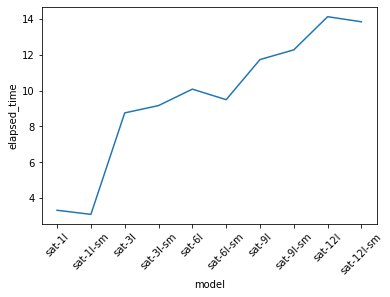

In [ ]:
sns.lineplot(data=data, x="model", y="elapsed_time")
plt.xticks(rotation=45)
plt.savefig("/home/lnishimw/scratch/datasets/pfsmb/segment/PFSMB.test.raw_seg_time.en.png")

In [ ]:
from nltk.metrics import windowdiff

In [ ]:
import Levenshtein
from jiwer import cer

In [ ]:
ref_file = "/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_manual_seg.en"
with open(ref_file, "r") as f:
    ref = f.read()

edit_ratios = []
char_error_rates = []
for model in data["model"]:
    hyp_file = f"/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_{model}_seg.en"
    
    with open(hyp_file, "r") as f:
        hyp = f.read()

    edit_ratios.append(Levenshtein.ratio(ref, hyp)*100)
    char_error_rates.append(cer(ref, hyp)*100)


In [ ]:
edit_ratios

[100.0,
 98.80469316408993,
 99.0229817458842,
 99.08096612486709,
 99.13870071844593,
 99.13367135722288,
 99.16602680573823,
 99.1899265158481,
 99.13707609005414,
 99.19812109511575,
 99.18024683847517,
 99.21259842519686]

In [ ]:
char_error_rates

[0.0,
 1.9249587181212158,
 1.736132346645465,
 1.5862944162436547,
 1.484618677756712,
 1.5243715980673966,
 1.4074062748455751,
 1.4249892972906857,
 1.473915968442297,
 1.3967035655311602,
 1.365359916824659,
 1.3860008562167452]

In [ ]:
data["edit_ratios"] = edit_ratios
data["char_error_rates"] = char_error_rates

In [ ]:
data

model  elapsed_time  n_sentences  edit_ratios  char_error_rates
0       manual      0.000000         1922   100.000000          0.000000
1        spacy      0.000000         1660    98.804693          1.924959
2       sat-1l      5.623822         2354    99.022982          1.736132
3    sat-1l-sm      7.572127         2117    99.080966          1.586294
4       sat-3l      8.216899         2004    99.138701          1.484619
5    sat-3l-sm      7.963756         2092    99.133671          1.524372
6       sat-6l     11.387281         1875    99.166027          1.407406
7    sat-6l-sm     11.759553         1983    99.189927          1.424989
8       sat-9l     11.133920         1972    99.137076          1.473916
9    sat-9l-sm     10.835060         1929    99.198121          1.396704
10     sat-12l     11.801494         1803    99.180247          1.365360
11  sat-12l-sm     11.697051         1941    99.212598          1.386001

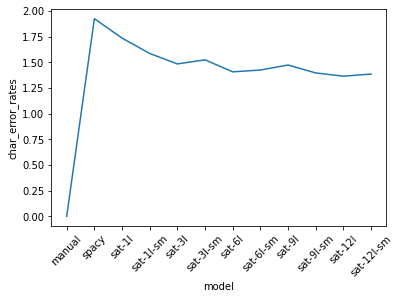

In [ ]:
sns.lineplot(data=data, x="model", y="char_error_rates")
plt.xticks(rotation=45)
plt.savefig("/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_seg_cer.en.png")

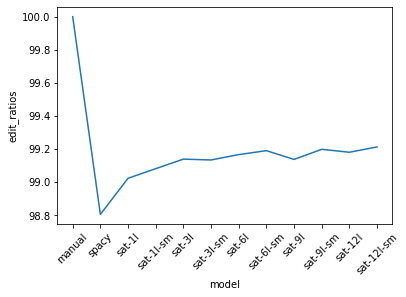

In [ ]:
sns.lineplot(data=data, x="model", y="edit_ratios")
plt.xticks(rotation=45)
plt.savefig("/home/lnishimw/scratch/datasets/rocsmt/segment/RoCS-MT.src.raw_seg_edit.en.png")

# RoLASER v2 
(use pt_env)

Teacher

In [ ]:
import torch

In [ ]:
from laser_encoders import initialize_encoder, initialize_tokenizer

# Initialize the LASER tokenizer
teacher_tokenizer = initialize_tokenizer(lang="english")

# Initialize the LASER sentence encoder
teacher_encoder = initialize_encoder(lang="english")

# Encode tokenized sentences into embeddings
tokenized_sentence = teacher_tokenizer.tokenize("bonjour, comment ça va?")
embeddings = teacher_encoder.encode_sentences([tokenized_sentence, tokenized_sentence])

2024-10-29 10:48:42,189 | INFO | laser_encoders.download_models |  - laser2.spm already downloaded
2024-10-29 10:48:42,424 | INFO | laser_encoders.download_models |  - laser2.pt already downloaded
2024-10-29 10:48:42,426 | INFO | laser_encoders.download_models |  - laser2.spm already downloaded
2024-10-29 10:48:42,428 | INFO | laser_encoders.download_models |  - laser2.cvocab already downloaded


In [ ]:
teacher_encoder.encoder.cuda

<bound method Module.cuda of LaserLstmEncoder(
  (embed_tokens): Embedding(50004, 320, padding_idx=1)
  (lstm): LSTM(320, 512, num_layers=5, bidirectional=True)
)>

In [ ]:
embeddings

array([[-0.00045063, -0.00021783, -0.00010622, ..., -0.0011192 ,
         0.00140501,  0.0004627 ],
       [-0.00045063, -0.00021783, -0.00010622, ..., -0.0011192 ,
         0.00140501,  0.0004627 ]], dtype=float32)

In [ ]:
tokenized_sentence

'▁bon jo ur , ▁comment ▁ça ▁va ?'

In [ ]:
type(teacher_encoder)

laser_encoders.models.SentenceEncoder

In [ ]:
sentences = ['hello, how are you doing today?',
    'bonjour, comment ça va?',
    'hola, ¿cómo estás?']

In [ ]:
sentence_pieces = teacher_tokenizer.tokenize_batch(sentences)

In [ ]:
sentence_pieces

['▁hel lo , ▁how ▁are ▁you ▁do ing ▁to day ?',
 '▁bon jo ur , ▁comment ▁ça ▁va ?',
 '▁ho la , ▁¿ có mo ▁está s ?']

In [ ]:
sentence_ids = teacher_tokenizer.spm_encoder.encode(sentences)
sentence_id_tensors = [ torch.tensor(s) for s in sentence_ids ]

In [ ]:
sentence_ids

[[4115, 168, 4, 8002, 1327, 754, 56, 189, 63, 2816, 43],
 [6145, 464, 256, 4, 10681, 3894, 347, 43],
 [524, 74, 4, 9949, 20334, 250, 3557, 6, 43]]

In [ ]:
padding = torch.full((3, 12), 1, dtype=torch.int)
for i, s in enumerate(sentence_id_tensors):
    print(min(padding.shape[1], len(s)))
    padding[i, :min(padding.shape[1], len(s))] = s[:min(padding.shape[1], len(s))]

11
8
9


In [ ]:
padding.device

device(type='cpu')

In [ ]:
padding

tensor([[ 4115,   168,     4,  8002,  1327,   754,    56,   189,    63,  2816,
            43,     1],
        [ 6145,   464,   256,     4, 10681,  3894,   347,    43,     1,     1,
             1,     1],
        [  524,    74,     4,  9949, 20334,   250,  3557,     6,    43,     1,
             1,     1]], dtype=torch.int32)

In [ ]:
teacher_tokenizer.spm_encoder.decode(padding.tolist())

['hello, how are you doing today?',
 'bonjour, comment ça va?',
 'hola, ¿cómo estás?']

In [ ]:
[ torch.tensor(teacher_tokenizer.spm_encoder.encode(s)) for s in sentences ]

[tensor([4115,  168,    4, 8002, 1327,  754,   56,  189,   63, 2816,   43]),
 tensor([ 6145,   464,   256,     4, 10681,  3894,   347,    43]),
 tensor([  524,    74,     4,  9949, 20334,   250,  3557,     6,    43])]

In [ ]:
sentence_id_tensors

[tensor([4115,  168,    4, 8002, 1327,  754,   56,  189,   63, 2816,   43]),
 tensor([ 6145,   464,   256,     4, 10681,  3894,   347,    43]),
 tensor([  524,    74,     4,  9949, 20334,   250,  3557,     6,    43])]

In [ ]:
batch = pad_sequence(sentence_id_tensors, batch_first=True, padding_value=1)
batch

tensor([[ 4115,   168,     4,  8002,  1327,   754,    56,   189,    63,  2816,
            43],
        [ 6145,   464,   256,     4, 10681,  3894,   347,    43,     1,     1,
             1],
        [  524,    74,     4,  9949, 20334,   250,  3557,     6,    43,     1,
             1]])

In [ ]:
[" ".join(teacher_tokenizer.spm_encoder.encode_as_pieces(s)) for s in detokenized_sentences]


['▁hel lo , ▁how ▁are ▁you ▁do ing ▁to day ?',
 '▁bon jo ur , ▁comment ▁ça ▁va ?',
 '▁ho la , ▁¿ có mo ▁está s ?']

In [ ]:
detokenized_sentences = teacher_tokenizer.spm_encoder.decode(batch.tolist())
tokenized_sentences = teacher_tokenizer.tokenize_batch(detokenized_sentences)

In [ ]:
tokenized_sentences

['▁hel lo , ▁how ▁are ▁you ▁do ing ▁to day ?',
 '▁bon jo ur , ▁comment ▁ça ▁va ?',
 '▁ho la , ▁¿ có mo ▁está s ?']

In [ ]:
tokenized_sentences_2 = [ teacher_tokenizer.tokenize(sentence) for sentence in sentences ]

In [ ]:
teacher_encoder.encode_sentences(tokenized_sentences_2[2:3])

array([[ 8.0114882e-03, -3.1120534e-04, -2.2493517e-05, ...,
         3.2946784e-03, -6.0984254e-04,  1.3333098e-03]], dtype=float32)

In [ ]:
teacher_encoder.encode_sentences(tokenized_sentences_2[0:3])

array([[ 2.9411039e-03, -2.3803224e-04, -4.1317066e-06, ...,
        -1.1554296e-03,  3.0310182e-03,  2.7288821e-02],
       [-4.5063428e-04, -2.1782635e-04, -1.0621693e-04, ...,
        -1.1192014e-03,  1.4050123e-03,  4.6269756e-04],
       [ 8.0114882e-03, -3.1120534e-04, -2.2493517e-05, ...,
         3.2946784e-03, -6.0984254e-04,  1.3333098e-03]], dtype=float32)

In [ ]:
teacher_encoder.encode_sentences(tokenized_sentences, normalize_embeddings=False)

array([[ 2.9411039e-03, -2.3803224e-04, -4.1317066e-06, ...,
        -1.1554296e-03,  3.0310182e-03,  2.7288821e-02],
       [-4.5063428e-04, -2.1782635e-04, -1.0621693e-04, ...,
        -1.1192014e-03,  1.4050123e-03,  4.6269756e-04],
       [ 8.0114882e-03, -3.1120534e-04, -2.2493517e-05, ...,
         3.2946784e-03, -6.0984254e-04,  1.3333098e-03]], dtype=float32)

In [ ]:
teacher_tokenizer.convert_ids_to_tokens(sentence_ids)

['hello, how are you doing today?',
 'bonjour, comment ça va?',
 'hola, ¿cómo estás?']

In [ ]:
teacher_encoder.encode_sentences(sentences)

array([[ 5.21626230e-03, -5.24153991e-04, -7.61839838e-05, ...,
        -2.37532728e-03,  1.52339935e-02,  1.06748343e-02],
       [ 4.42401925e-03, -2.38319713e-04, -7.11508983e-05, ...,
        -2.63575162e-03,  1.61858462e-02,  4.03207494e-03],
       [ 2.21143290e-03, -5.95843521e-05,  6.34890966e-06, ...,
        -6.06457889e-03,  1.06735649e-02,  3.06519750e-03]], dtype=float32)

In [ ]:
torch.tensor(teacher_encoder.encode_sentences(teacher_tokenizer.tokenize_batch(sentences)))

tensor([[ 2.9411e-03, -2.3803e-04, -4.1317e-06,  ..., -1.1554e-03,
          3.0310e-03,  2.7289e-02],
        [-4.5063e-04, -2.1783e-04, -1.0622e-04,  ..., -1.1192e-03,
          1.4050e-03,  4.6270e-04],
        [ 8.0115e-03, -3.1121e-04, -2.2494e-05,  ...,  3.2947e-03,
         -6.0984e-04,  1.3333e-03]])

In [ ]:
embeddings.shape

(1, 1024)

In [ ]:
teacher_encoder.pad_index

1

In [ ]:
from laser_encoders.laser_tokenizer import LaserTokenizer

In [ ]:
from pathlib import Path


In [ ]:
class CustomLaserTokenizer(LaserTokenizer):
    # def __init__(
    #     self,
    #     spm_model: Path,
    #     lang: str = "en",
    #     lower_case: bool = True,
    #     descape: bool = False,
    #     verbose: bool = False,
    #     over_write: bool = False,
    #     normalize_punct: bool = True,
    # ):
        # super().__init__(
        #     spm_model = spm_model,
        #     lang = lang,
        #     lower_case = lower_case,
        #     descape = descape,
        #     verbose = verbose,
        #     over_write = over_write,
        #     normalize_punct = normalize_punct
        # )
        
    def tokenize_batch_as_ids(
            self, 
            batch: List[str], 
            padding: bool = True, 
            max_length: int = 512, 
            padding_value: int = 1
    ) -> Union[List[List[int]], torch.Tensor]:
        batch_ids = self.spm_encoder.encode_as_ids(batch)
        if padding:
            batch_max_length = max(len(sent_ids) for sent_ids in batch_ids)
            if max_length:
                batch_max_length = min(batch_max_length, max_length)
            padded_batch_ids = torch.full((len(batch_ids), batch_max_length), fill_value=padding_value, dtype=torch.int32)
            for i, sent_ids in enumerate(batch_ids):
                seq_len= min(len(sent_ids), batch_max_length)
                padded_batch_ids[i,:seq_len] = torch.IntTensor(sent_ids[:seq_len])
            return padded_batch_ids
        return batch_ids

In [ ]:
from laser_encoders.laser_tokenizer import NON_PRINT_CHARS

In [ ]:
def _preprocess_sentence(text, tokenizer):
    # Preprocessing
    sentence_text = "".join([c if c not in NON_PRINT_CHARS else " " for c in text])
    if tokenizer.normalize_punct:
        sentence_text = tokenizer.moses_punct_normalizer.normalize(sentence_text)
    if tokenizer.descape:
        sentence_text = tokenizer.moses_detokenizer.unescape_xml(text=sentence_text)
    if tokenizer.lower_case:
        sentence_text = sentence_text.lower()
    return sentence_text

In [ ]:
[_preprocess_sentence(sentence, tokenizer) for sentence in sentences ]

['hello, how are you doing today?',
 'bonjour, comment ça va?',
 'hola, ¿cómo estás?']

In [ ]:
tokenizer = CustomLaserTokenizer(
    spm_model = teacher_tokenizer.spm_model,
    lang = teacher_tokenizer.lang,
    lower_case = teacher_tokenizer.lower_case,
    descape = teacher_tokenizer.descape,
    verbose = teacher_tokenizer.verbose,
    over_write = teacher_tokenizer.over_write,
    normalize_punct = teacher_tokenizer.normalize_punct
)
tokenizer.tokenize_batch_as_ids(["This is a test sentence."])



tensor([[ 8462,   154,    13,  3907, 11540,  3444,     5]], dtype=torch.int32)

In [ ]:
tokenizer.tokenize_batch(sentences)


['▁hel lo , ▁how ▁are ▁you ▁do ing ▁to day ?',
 '▁bon jo ur , ▁comment ▁ça ▁va ?',
 '▁ho la , ▁¿ có mo ▁está s ?']

In [ ]:
tokenizer.tokenize_batch_as_ids(sentences, padding=True, max_length=5)


tensor([[ 5127,   168,     4,  8002,  1327],
        [13150,   464,   256,     4, 10681],
        [ 8036,     7,     4,  9949, 20334]], dtype=torch.int32)

In [ ]:
tokenizer.tokenize_batch_as_ids(sentences)


tensor([[ 5127,   168,     4,  8002,  1327,   754,    56,   189,    63,  2816,
            43],
        [13150,   464,   256,     4, 10681,  3894,   347,    43,     1,     1,
             1],
        [ 8036,     7,     4,  9949, 20334,   250,  3557,     6,    43,     1,
             1]], dtype=torch.int32)

In [ ]:
tokenizer.normalize_punct

True

Student

In [ ]:
from transformers import XLMRobertaTokenizerFast, XLMRobertaModel

# Load the XLM-RoBERTa tokenizer
student_tokenizer = XLMRobertaTokenizerFast.from_pretrained("cardiffnlp/twitter-xlm-roberta-base")

# Load the XLM-RoBERTa model
#init_model = XLMRobertaModel.from_pretrained("cardiffnlp/twitter-xlm-roberta-base", add_pooling_layer=False)

In [ ]:
student_tokenizer.all_special_tokens

['<s>', '</s>', '<unk>', '<pad>', '<mask>']

In [ ]:
student_tokenizer.all_special_ids

[0, 2, 3, 1, 250001]

In [ ]:
from transformers import XLMRobertaConfig
from transformers.models.xlm_roberta.modeling_xlm_roberta import XLMRobertaPooler
from torch import nn

In [ ]:
POOLING_STRATEGIES = ["cls", "max", "mean"]

class RoLaserConfig(XLMRobertaConfig):
    def __init__(self, output_size=1024, pooling="max", **kwargs):
        """
        Initializes the RoLASER configuration.
        Args:
            output_size (int): The output size of the RoLASER model.
            pooling (str): The pooling strategy to use. Can be one of "cls", "max" or "mean".
        """
        super().__init__(**kwargs)
        assert pooling in POOLING_STRATEGIES, f"Invalid pooling strategy: {pooling}. Possible values are: {POOLING_STRATEGIES}"
        self.output_size = output_size
        self.pooling = pooling
        

In [ ]:
student_model_config = RoLaserConfig.from_pretrained("cardiffnlp/twitter-xlm-roberta-base", output_size=1024, pooling="mean")

In [ ]:
student_model_config

RoLaserConfig {
  "_name_or_path": "/home/jupyter/misc/tweeteval/TweetEval_models/xlm-twitter/twitter-xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "output_size": 1024,
  "pad_token_id": 1,
  "pooling": "mean",
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [ ]:
class RoLaserPooler(XLMRobertaPooler):
    def __init__(self, config):
        super().__init__(config)
        self.dense = nn.Linear(config.hidden_size, config.output_size)
        self.pooling = config.pooling
        del self.activation

    def forward(self, hidden_states, attention_mask):
        # We project the hidden states to the output size and apply the pooling strategy
        token_embeddings = self.dense(hidden_states)
        # Following code copied and adapted from sentence_transformers.models.Pooling.forward
        if self.pooling == "cls":
            pooled_output = token_embeddings[:, 0]
        elif self.pooling == "max":
            input_mask_expanded = (
                attention_mask.unsqueeze(-1).expand(token_embeddings.size()).to(token_embeddings.dtype)
            )
            token_embeddings[input_mask_expanded == 0] = float("-inf")  # Set padding tokens to large negative value
            max_over_time = torch.max(token_embeddings, 1)[0]
            pooled_output = max_over_time
        elif self.pooling == "mean":
            input_mask_expanded = (
                attention_mask.unsqueeze(-1).expand(token_embeddings.size()).to(token_embeddings.dtype)
            )
            sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
            sum_mask = input_mask_expanded.sum(1)
            sum_mask = torch.clamp(sum_mask, min=float("-inf"))
            pooled_output = sum_embeddings / sum_mask
        else:
            raise ValueError(f"Invalid pooling strategy: {self.pooling}. Possible values are: {POOLING_STRATEGIES}")
        return pooled_output

In [ ]:
from typing import List, Optional, Tuple, Union
import torch
from transformers.modeling_outputs import BaseModelOutputWithPoolingAndCrossAttentions

In [ ]:
class RoLaserModel(XLMRobertaModel):
    def __init__(self, config):
        super().__init__(config)
        self.pooler = RoLaserPooler(config)
        self.post_init()
    
    # Copied from transformers.models.xlm_roberta.modeling_xlm_roberta.XLMRobertaModel.forward
    # And adapted to use the RoLaserPooler which requires the attention mask
    def forward(
        self,
        input_ids: Optional[torch.Tensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        token_type_ids: Optional[torch.Tensor] = None,
        position_ids: Optional[torch.Tensor] = None,
        head_mask: Optional[torch.Tensor] = None,
        inputs_embeds: Optional[torch.Tensor] = None,
        encoder_hidden_states: Optional[torch.Tensor] = None,
        encoder_attention_mask: Optional[torch.Tensor] = None,
        past_key_values: Optional[List[torch.FloatTensor]] = None,
        use_cache: Optional[bool] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ) -> Union[Tuple[torch.Tensor], BaseModelOutputWithPoolingAndCrossAttentions]:
        r"""
        encoder_hidden_states  (`torch.FloatTensor` of shape `(batch_size, sequence_length, hidden_size)`, *optional*):
            Sequence of hidden-states at the output of the last layer of the encoder. Used in the cross-attention if
            the model is configured as a decoder.
        encoder_attention_mask (`torch.FloatTensor` of shape `(batch_size, sequence_length)`, *optional*):
            Mask to avoid performing attention on the padding token indices of the encoder input. This mask is used in
            the cross-attention if the model is configured as a decoder. Mask values selected in `[0, 1]`:

            - 1 for tokens that are **not masked**,
            - 0 for tokens that are **masked**.
        past_key_values (`tuple(tuple(torch.FloatTensor))` of length `config.n_layers` with each tuple having 4 tensors of shape `(batch_size, num_heads, sequence_length - 1, embed_size_per_head)`):
            Contains precomputed key and value hidden states of the attention blocks. Can be used to speed up decoding.

            If `past_key_values` are used, the user can optionally input only the last `decoder_input_ids` (those that
            don't have their past key value states given to this model) of shape `(batch_size, 1)` instead of all
            `decoder_input_ids` of shape `(batch_size, sequence_length)`.
        use_cache (`bool`, *optional*):
            If set to `True`, `past_key_values` key value states are returned and can be used to speed up decoding (see
            `past_key_values`).
        """
        output_attentions = output_attentions if output_attentions is not None else self.config.output_attentions
        output_hidden_states = (
            output_hidden_states if output_hidden_states is not None else self.config.output_hidden_states
        )
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        if self.config.is_decoder:
            use_cache = use_cache if use_cache is not None else self.config.use_cache
        else:
            use_cache = False

        if input_ids is not None and inputs_embeds is not None:
            raise ValueError("You cannot specify both input_ids and inputs_embeds at the same time")
        elif input_ids is not None:
            input_shape = input_ids.size()
        elif inputs_embeds is not None:
            input_shape = inputs_embeds.size()[:-1]
        else:
            raise ValueError("You have to specify either input_ids or inputs_embeds")

        batch_size, seq_length = input_shape
        device = input_ids.device if input_ids is not None else inputs_embeds.device

        # past_key_values_length
        past_key_values_length = past_key_values[0][0].shape[2] if past_key_values is not None else 0

        if attention_mask is None:
            attention_mask = torch.ones(((batch_size, seq_length + past_key_values_length)), device=device)

        if token_type_ids is None:
            if hasattr(self.embeddings, "token_type_ids"):
                buffered_token_type_ids = self.embeddings.token_type_ids[:, :seq_length]
                buffered_token_type_ids_expanded = buffered_token_type_ids.expand(batch_size, seq_length)
                token_type_ids = buffered_token_type_ids_expanded
            else:
                token_type_ids = torch.zeros(input_shape, dtype=torch.long, device=device)

        # We can provide a self-attention mask of dimensions [batch_size, from_seq_length, to_seq_length]
        # ourselves in which case we just need to make it broadcastable to all heads.
        extended_attention_mask: torch.Tensor = self.get_extended_attention_mask(attention_mask, input_shape)

        # If a 2D or 3D attention mask is provided for the cross-attention
        # we need to make broadcastable to [batch_size, num_heads, seq_length, seq_length]
        if self.config.is_decoder and encoder_hidden_states is not None:
            encoder_batch_size, encoder_sequence_length, _ = encoder_hidden_states.size()
            encoder_hidden_shape = (encoder_batch_size, encoder_sequence_length)
            if encoder_attention_mask is None:
                encoder_attention_mask = torch.ones(encoder_hidden_shape, device=device)
            encoder_extended_attention_mask = self.invert_attention_mask(encoder_attention_mask)
        else:
            encoder_extended_attention_mask = None

        # Prepare head mask if needed
        # 1.0 in head_mask indicate we keep the head
        # attention_probs has shape bsz x n_heads x N x N
        # input head_mask has shape [num_heads] or [num_hidden_layers x num_heads]
        # and head_mask is converted to shape [num_hidden_layers x batch x num_heads x seq_length x seq_length]
        head_mask = self.get_head_mask(head_mask, self.config.num_hidden_layers)

        embedding_output = self.embeddings(
            input_ids=input_ids,
            position_ids=position_ids,
            token_type_ids=token_type_ids,
            inputs_embeds=inputs_embeds,
            past_key_values_length=past_key_values_length,
        )
        encoder_outputs = self.encoder(
            embedding_output,
            attention_mask=extended_attention_mask,
            head_mask=head_mask,
            encoder_hidden_states=encoder_hidden_states,
            encoder_attention_mask=encoder_extended_attention_mask,
            past_key_values=past_key_values,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        sequence_output = encoder_outputs[0]
        pooled_output = self.pooler(sequence_output, attention_mask) if self.pooler is not None else None

        if not return_dict:
            return (sequence_output, pooled_output) + encoder_outputs[1:]

        return BaseModelOutputWithPoolingAndCrossAttentions(
            last_hidden_state=sequence_output,
            pooler_output=pooled_output,
            past_key_values=encoder_outputs.past_key_values,
            hidden_states=encoder_outputs.hidden_states,
            attentions=encoder_outputs.attentions,
            cross_attentions=encoder_outputs.cross_attentions,
        )


In [ ]:
student_model = RoLaserModel.from_pretrained("cardiffnlp/twitter-xlm-roberta-base", config=student_model_config)

Some weights of the model checkpoint at cardiffnlp/twitter-xlm-roberta-base were not used when initializing RoLaserModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RoLaserModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RoLaserModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RoLaserModel were not initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-

In [ ]:
teacher_encoder.pad_index

1

In [ ]:
student_model.parameters

<bound method Module.parameters of RoLaserModel(
  (embeddings): XLMRobertaEmbeddings(
    (word_embeddings): Embedding(250002, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): XLMRobertaEncoder(
    (layer): ModuleList(
      (0): XLMRobertaLayer(
        (attention): XLMRobertaAttention(
          (self): XLMRobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): XLMRobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05

In [ ]:
tokenized_sentences

{'input_ids': tensor([[    0, 35378,     4,  3642,     2],
        [    0, 84602,     4,  6868,     2],
        [    0, 47958,     4,  3936,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])}

In [ ]:
output.pooler_output

tensor([[-0.1199, -0.3853, -0.3737,  ...,  0.2288, -0.2007, -0.4512],
        [-0.0735, -0.2895, -0.4585,  ...,  0.1302, -0.1246, -0.3785],
        [-0.1532, -0.3759, -0.4210,  ...,  0.1429, -0.0616, -0.4579]],
       grad_fn=<DivBackward0>)

In [ ]:
tokenized_sentences

{'input_ids': tensor([[     0,  35378,      4,   3642,    621,    398,  20594,  18925,     32,
              2],
        [     0,  84602,      4,   6868,   3244,    307,     32,      2,      1,
              1],
        [     0,  47958,      4,   3936, 190900,  79682,     32,      2,      1,
              1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}

In [ ]:
teacher_tokenizer.lower_case


True

In [ ]:
teacher_encoder

In [ ]:
teacher_tokenizer.spm_encoder.pad_id()

-1

In [ ]:
batch = teacher_tokenizer.spm_encoder.encode_as_ids(sentences)

In [ ]:
teacher_inputs = teacher_tokenizer.tokenize_batch(sentences)
teacher_inputs

['▁hel lo , ▁how ▁are ▁you ▁do ing ▁to day ?',
 '▁bon jo ur , ▁comment ▁ça ▁va ?',
 '▁ho la , ▁¿ có mo ▁está s ?']

In [ ]:
teacher_output = torch.tensor(teacher_encoder.encode_sentences(teacher_inputs))

In [ ]:
teacher_output

tensor([[ 2.9411e-03, -2.3803e-04, -4.1317e-06,  ..., -1.1554e-03,
          3.0310e-03,  2.7289e-02],
        [-4.5063e-04, -2.1783e-04, -1.0622e-04,  ..., -1.1192e-03,
          1.4050e-03,  4.6270e-04],
        [ 8.0115e-03, -3.1121e-04, -2.2494e-05,  ...,  3.2947e-03,
         -6.0984e-04,  1.3333e-03]])

In [ ]:
# get model size of the student_model
n = 0
for param in student_model.parameters():
    n += param.numel()

n

278240512

# Bitext mining with FAISS

In [ ]:
import faiss
import torch
import numpy as np

In [ ]:
def read_embeddings(input_file, dim=1024):
    X = np.fromfile(input_file, dtype=np.float32, count=-1)
    X = np.resize(X, (X.shape[0] // dim, dim))
    return X


In [ ]:
def knnCPU(x, y, k):
    dim = x.shape[1]
    idx = faiss.IndexFlatIP(dim)
    idx.add(y)
    sim, ind = idx.search(x, k)
    return sim, ind

def knnGPU(x, y, k, mem=5*1024*1024*1024):
    dim = x.shape[1]
    batch_size = mem // (dim*4)
    sim = np.zeros((x.shape[0], k), dtype=np.float32)
    ind = np.zeros((x.shape[0], k), dtype=np.int64)
    for xfrom in range(0, x.shape[0], batch_size):
        xto = min(xfrom + batch_size, x.shape[0])
        bsims, binds = [], []
        for yfrom in range(0, y.shape[0], batch_size):
            yto = min(yfrom + batch_size, y.shape[0])
            # print('{}-{}  ->  {}-{}'.format(xfrom, xto, yfrom, yto))
            idx = faiss.IndexFlatIP(dim)
            idx = faiss.index_cpu_to_all_gpus(idx)
            idx.add(y[yfrom:yto])
            bsim, bind = idx.search(x[xfrom:xto], min(k, yto-yfrom))
            bsims.append(bsim)
            binds.append(bind + yfrom)
            del idx
        bsims = np.concatenate(bsims, axis=1)
        binds = np.concatenate(binds, axis=1)
        aux = np.argsort(-bsims, axis=1)
        for i in range(xfrom, xto):
            for j in range(k):
                sim[i, j] = bsims[i-xfrom, aux[i-xfrom, j]]
                ind[i, j] = binds[i-xfrom, aux[i-xfrom, j]]
    return sim, ind

def knn(x, y, k, use_gpu):
    return knnGPU(x, y, k) if use_gpu else knnCPU(x, y, k)


In [ ]:
def unique_embeddings(emb, ind, verbose=False):
        aux = {j: i for i, j in enumerate(ind)}
        if verbose:
            print(' - unify embeddings: {:d} -> {:d}'.format(len(emb), len(aux)))
        return emb[[aux[i] for i in range(len(aux))]]

In [ ]:
def score(x, y, fwd_mean, bwd_mean, margin):
    return margin(x.dot(y), (fwd_mean + bwd_mean) / 2)


In [ ]:
def score_candidates(x, y, candidate_inds, fwd_mean, bwd_mean, margin, verbose=False):
    if verbose:
        print(' - scoring {:d} candidates'.format(x.shape[0]))
    scores = np.zeros(candidate_inds.shape)
    for i in range(scores.shape[0]):
        for j in range(scores.shape[1]):
            k = candidate_inds[i, j]
            scores[i, j] = score(x[i], y[k], fwd_mean[i], bwd_mean[k], margin)
    return scores


## Embeddings

In [ ]:
src_sents = open("/home/lnishimw/scratch/datasets/flores200/dev/deu_Latn.dev", "r").read().splitlines()
tgt_sents = open("/home/lnishimw/scratch/datasets/flores200/dev/eng_Latn.dev", "r").read().splitlines()

In [ ]:
src_embeddings = read_embeddings("/home/lnishimw/scratch/LASER/data/draft/deu_Latn.dev.bin")
tgt_embeddings = read_embeddings("/home/lnishimw/scratch/LASER/data/draft/eng_Latn.dev.bin")

In [ ]:
src_ids = list(range(src_embeddings.shape[0]))
tgt_ids = list(range(tgt_embeddings.shape[0]))

In [ ]:
use_gpu = torch.cuda.is_available()
neighborhood = 4
verbose = True
x = unique_embeddings(src_embeddings, src_ids, verbose)
y = unique_embeddings(tgt_embeddings, tgt_ids, verbose)

 - unify embeddings: 997 -> 997
 - unify embeddings: 997 -> 997


In [ ]:
faiss.normalize_L2(x)
faiss.normalize_L2(y)

In [ ]:
x

array([[ 4.1124128e-02,  1.1267845e-02,  3.1213798e-02, ...,
         3.6476474e-02,  5.1571894e-02,  5.5069957e-02],
       [ 5.3435449e-02,  3.4959763e-02,  6.8127692e-02, ...,
         3.8891625e-02,  5.5314142e-02,  3.8869604e-02],
       [ 1.9556791e-02, -4.7406862e-03,  2.3106693e-03, ...,
         2.9603081e-02,  3.4277979e-02,  3.1121897e-02],
       ...,
       [ 2.7531927e-02, -2.0464733e-03,  5.3318933e-02, ...,
        -4.9748425e-03,  3.7531748e-02,  1.0021423e-01],
       [ 4.8237070e-02, -2.1725411e-03, -7.6754717e-05, ...,
         3.7752926e-02,  8.2210213e-02,  5.3640224e-02],
       [ 7.7970717e-03, -1.9759641e-03, -1.1460277e-03, ...,
         1.3238920e-02,  1.9657223e-02,  9.7143283e-04]], dtype=float32)

In [ ]:
x2y_sim, x2y_ind = knn(x, y, min(y.shape[0], neighborhood), use_gpu)
x2y_mean = x2y_sim.mean(axis=1)

In [ ]:
x2y_sim

array([[0.93267393, 0.7212142 , 0.7167622 , 0.7105639 ],
       [0.9435774 , 0.7200539 , 0.6997999 , 0.6923604 ],
       [0.88297176, 0.7291875 , 0.7202108 , 0.7183587 ],
       ...,
       [0.8746145 , 0.7121564 , 0.6761887 , 0.67467445],
       [0.9672757 , 0.746546  , 0.7274482 , 0.7216759 ],
       [0.8368061 , 0.61898744, 0.6041268 , 0.59045887]], dtype=float32)

In [ ]:
x2y_ind

array([[  0, 636, 125, 165],
       [  1, 563, 802,   0],
       [  2, 543,   7, 241],
       ...,
       [994, 673, 738, 553],
       [995, 946, 953, 431],
       [996, 951, 911, 364]])

In [ ]:
x2y_mean.shape

(997,)

In [ ]:
y2x_sim, y2x_ind = knn(y, x, min(x.shape[0], neighborhood), use_gpu)
y2x_mean = y2x_sim.mean(axis=1)

In [ ]:
y2x_mean.shape

(997,)

In [ ]:
margin = lambda a, b: a / b

## Score

In [ ]:
for i, j in zip(src_ids, tgt_ids):
    s = score(x[i], y[j], x2y_mean[i], y2x_mean[j], margin)
    print(s, src_sents[i], tgt_sents[j], sep='\t')


1.2126859598924928	Am Montag haben die Wisenschaftler der Stanford University School of Medicine die Erfindung eines neuen Diagnosetools bekanntgegeben, mit dem Zellen nach ihrem Typ sortiert werden können: ein winziger, ausdruckbarer Chip, der für jeweils etwa einen US-Cent mit Standard-Tintenstrahldruckern hergestellt werden kann.	On Monday, scientists from the Stanford University School of Medicine announced the invention of a new diagnostic tool that can sort cells by type: a tiny printable chip that can be manufactured using standard inkjet printers for possibly about one U.S. cent each.
1.23632839315461	Führende Forscher sagen, dass dies die Früherkennung von Krebs, Tuberkulose, HIV und Malaria für Patienten in einkommensschwachen Ländern fördern könnte, wo die Überlebensraten bei Krankheiten wie Brustkrebs teilweise nur halb so hoch sind wie in reicheren Ländern.	Lead researchers say this may bring early detection of cancer, tuberculosis, HIV and malaria to patients in low-incom

## Search

In [ ]:
scores = score_candidates(x, y, x2y_ind, x2y_mean, y2x_mean, margin, verbose)
best = x2y_ind[np.arange(x.shape[0]), scores.argmax(axis=1)]
nbex = x.shape[0]
ref = np.linspace(0, nbex-1, nbex).astype(int)  # [0, nbex)
err = nbex - np.equal(best.reshape(nbex), ref).astype(int).sum()
print(' - errors: {:d}={:.2f}%'.format(err, 100*err/nbex))
for i in src_ids:
    print(tgt_sents[best[i]])

 - scoring 997 candidates
 - errors: 0=0.00%
On Monday, scientists from the Stanford University School of Medicine announced the invention of a new diagnostic tool that can sort cells by type: a tiny printable chip that can be manufactured using standard inkjet printers for possibly about one U.S. cent each.
Lead researchers say this may bring early detection of cancer, tuberculosis, HIV and malaria to patients in low-income countries, where the survival rates for illnesses such as breast cancer can be half those of richer countries.
The JAS 39C Gripen crashed onto a runway at around 9:30 am local time (0230 UTC) and exploded, closing the airport to commercial flights.
The pilot was identified as Squadron Leader Dilokrit Pattavee.
Local media reports an airport fire vehicle rolled over while responding.
28-year-old Vidal had joined Barça three seasons ago, from Sevilla.
Since moving to the Catalan-capital, Vidal had played 49 games for the club.
The protest started around 11:00 local t

## Mine

In [ ]:
threshold = 1

In [ ]:
fwd_scores = score_candidates(x, y, x2y_ind, x2y_mean, y2x_mean, margin, verbose)
bwd_scores = score_candidates(y, x, y2x_ind, y2x_mean, x2y_mean, margin, verbose)
fwd_best = x2y_ind[np.arange(x.shape[0]), fwd_scores.argmax(axis=1)]
bwd_best = y2x_ind[np.arange(y.shape[0]), bwd_scores.argmax(axis=1)]
# if args.verbose:
#     print(' - writing alignments to {:s}'.format(args.output))
#     if args.threshold > 0:
#         print(' - with threshold of {:f}'.format(args.threshold))
# if args.retrieval == 'fwd':
#     for i, j in enumerate(fwd_best):
#         print(fwd_scores[i].max(), src_sents[i], trg_sents[j], sep='\t', file=fout)
# if args.retrieval == 'bwd':
#     for j, i in enumerate(bwd_best):
#         print(bwd_scores[j].max(), src_sents[i], trg_sents[j], sep='\t', file=fout)
# if args.retrieval == 'intersect':
#     for i, j in enumerate(fwd_best):
#         if bwd_best[j] == i:
#             print(fwd_scores[i].max(), src_sents[i], trg_sents[j], sep='\t', file=fout)
# if args.retrieval == 'max':
indices = np.stack((np.concatenate((np.arange(x.shape[0]), bwd_best)),
                    np.concatenate((fwd_best, np.arange(y.shape[0])))), axis=1)
scores = np.concatenate((fwd_scores.max(axis=1), bwd_scores.max(axis=1)))
seen_src, seen_trg = set(), set()
n = 0
for i in np.argsort(-scores):
    src_ind, trg_ind = indices[i]
    if not src_ind in seen_src and not trg_ind in seen_trg:
        seen_src.add(src_ind)
        seen_trg.add(trg_ind)
        if scores[i] > threshold:
            print(scores[i], src_sents[src_ind], tgt_sents[trg_ind], sep='\t')
            n += 1
print(' - {:d} sentence pairs'.format(n))


 - scoring 997 candidates
 - scoring 997 candidates
1.5129012062612714	Ich bin froh darüber, dass es Menschen gibt, die mich unterstützen wollen.	I am happy that there are people willing to support me.
1.5009494271789354	Es befand sich niemand in der Wohnung.	No one was inside the apartment.
1.4590021908032376	„Wir waren einfach alle schockiert“, sagte die Mutter.	"We were all simply in shock," the mother stated.
1.4101574475643008	Er hat sich in einem Buch von 1998 selbst dokumentiert.	He documented himself in a 1998 book.
1.4084350224119715	Er verstarb am Dienstag in Osaka.	He died in Osaka on Tuesday.
1.3895077648882617	Damals wurden fast 100 Bewohner aus dem Gebiet evakuiert.	At the time, nearly 100 residents were evacuated from the area.
1.3833812316836267	Mit der Einführung dieser Regelung könnte diese Freiheit enden.	With this arrangement in place, this freedom might end.
1.372127088845501	Ich gehe davon aus, am Montag zu allen meinen Verpflichtungen zurückzukehren“, sagte Arias

In [ ]:
use_gpu

True

# RoSONAR training curves

In [ ]:
import pandas as pd
import json
import seaborn as sns

In [ ]:
rosonar_trainer_state = "/home/lnishimw/scratch/experiments/robust-embeddings/sonar/experiment_047f/rosonar_trainer_state.json"
rosonar_std_trainer_state = "/home/lnishimw/scratch/experiments/robust-embeddings/sonar/experiment_047f/rosonar_std_trainer_state.json"

In [ ]:
# read json files
with open(rosonar_trainer_state, "r") as f:
    rosonar_trainer_state = json.load(f)

with open(rosonar_std_trainer_state, "r") as f:
    rosonar_std_trainer_state = json.load(f)

In [ ]:
# save rosonar_trainer_state['log_history'] as pandas DataFrame 
rosonar_log_history = pd.DataFrame(rosonar_trainer_state['log_history'])
rosonar_std_log_history = pd.DataFrame(rosonar_std_trainer_state['log_history'])

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'RoSONAR')

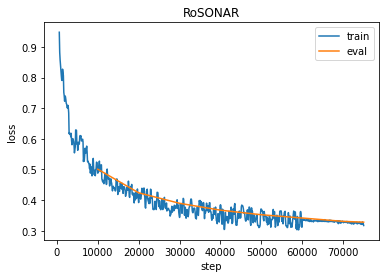

In [ ]:
g = sns.lineplot(data=rosonar_log_history[rosonar_log_history["loss"] < 1], x="step", y="loss", label="train")
g = sns.lineplot(data=rosonar_log_history[~rosonar_log_history['eval_loss'].isna()], x="step", y="eval_loss", label="eval")
g.set_title("RoSONAR")

Text(0.5, 1.0, 'RoSONAR (w/o UGC)')

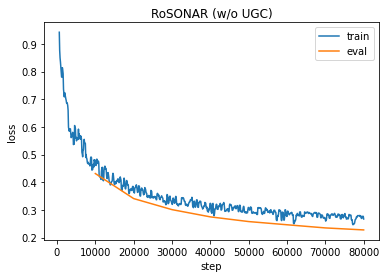

In [ ]:
plt.clf()
g = sns.lineplot(data=rosonar_std_log_history[rosonar_std_log_history["loss"] < 1], x="step", y="loss", label="train")
g = sns.lineplot(data=rosonar_std_log_history[~rosonar_std_log_history['eval_loss'].isna()], x="step", y="eval_loss", label="eval")
g.set_title("RoSONAR (w/o UGC)")

/scratch/lnishimw/miniconda3/envs/laser_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'RoSONAR')

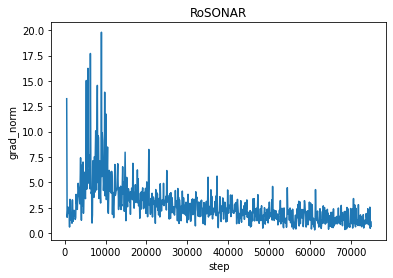

In [ ]:
g = sns.lineplot(data=rosonar_log_history[rosonar_std_log_history["grad_norm"] < 100], x="step", y="grad_norm")
g.set_title("RoSONAR")

Text(0.5, 1.0, 'RoSONAR (w/o UGC)')

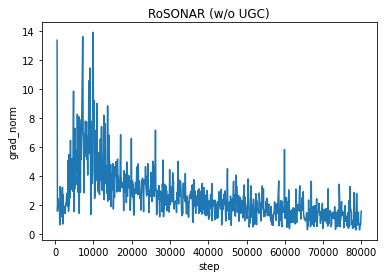

In [ ]:
g = sns.lineplot(data=rosonar_std_log_history[rosonar_std_log_history["grad_norm"] < 100], x="step", y="grad_norm")
g.set_title("RoSONAR (w/o UGC)")

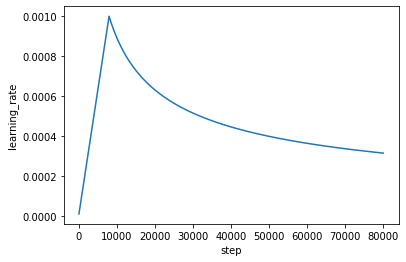

In [ ]:
g = sns.lineplot(data=rosonar_std_log_history, x="step", y="learning_rate")

In [ ]:
with open("/home/lnishimw/scratch/datasets/rosonar/monolingual/augmented/eng/oscar2301_eng_decontam_part2_chunks/orig/oscar2301_eng_decontam_part2-459.txt") as f:
    text2 = f.readlines()

In [ ]:
text2

['Reply to this comment\n',
 'Jenny, I loved you on TV and I’m also really impressed with your cabbage roll recipe, I have more in the oven right now.\n',
 'Reply to this comment\n',
 'Caitlynn Morris\n',
 'Is it easier to work with the cabbage leaves when they are just out of being boiled or should I let them cool\n',
 'Reply to this comment\n',
 'Reply to this comment\n',
 'Reply to this comment\n',
 'Jenny please don’t leave us .We go to your site for different types of meals .\n',
 'Your The best of the best please stay ..\n',
 'We will come help you we will be your staff\n',
 'Reply to this comment\n',
 'I’ve made your recipe like 4 or five times and everyone in my family loves them.\n',
 'They look forward to me making them.\n',
 'Just pulled a batch from the oven.\n',
 'Thanks for sharing Jenny.\n',
 'Reply to this comment\n',
 'Best recipe!\n',
 'We make this often it’s become a Family favorite.\n',
 'Thank you for sharing.\n',
 'Reply to this comment\n',
 'Reply to this commen

In [ ]:
print("len(text)", len(text))
sorted_text = sorted(text)
print("len(sorted_text)", len(sorted_text))
unique_text = list(set(text))
print("len(unique_text)", len(unique_text))

len(text) 33514
len(sorted_text) 33514
len(unique_text) 29775


In [ ]:
33514 - 29775

3739

In [ ]:
# for each line of the list text, check whether it is a duplicate
duplicates = [line for line in text if text.count(line) > 1]



In [ ]:
# for each line of the list text, check whether it is a duplicate
duplicates = [line for line in text if line in text]


In [ ]:
duplicates = [line for line in text if line in sorted_text]


In [ ]:
duplicates = [line for line in text if line in unique_text]


In [ ]:
unique_lines = set([])
n_duplicates = 0
for line in text:
    if line not in unique_lines:
        unique_lines.add(line)
    else:
        n_duplicates += 1

In [ ]:
n_duplicates

3739

In [ ]:
from bisect import bisect_left


In [ ]:
def in_sorted_list(target, lst):
    sorted_list = sorted(lst)
    index = bisect_left(sorted_list, target)
    return index != len(sorted_list) and lst[index] == target

In [ ]:
# add to sorted list using bisect
def add_to_sorted_list(target, lst):
    index = bisect_left(lst, target)
    lst.insert(index, target)
    return lst


In [ ]:
unique_lines = []
n_duplicates = 0
for line in text:
    if not in_sorted_list(line, unique_lines):
        add_to_sorted_list(line, unique_lines)
    else:
        n_duplicates += 1

In [ ]:
import pandas as pd

In [ ]:
eng_probas = pd.read_csv("/home/lnishimw/scratch/datasets/rosonar/monolingual/cleaned/eng/eng_all_dedup.probas", header=None, names=["probas"])
eng_probas

probas
0         0.99975
1         0.99933
2         0.99918
3         0.99918
4         0.96528
...           ...
47763373  0.99995
47763374  0.99985
47763375  0.99985
47763376  1.00000
47763377  0.99825

[47763378 rows x 1 columns]

In [ ]:
fra_probas = pd.read_csv("/home/lnishimw/scratch/datasets/rosonar/monolingual/cleaned/fra/fra_all_dedup.probas", header=None, names=["probas"])
fra_probas

probas
0         0.96644
1         0.99809
2         0.98570
3         0.99532
4         0.51566
...           ...
35168310  0.88781
35168311  0.99914
35168312  0.99724
35168313  0.98962
35168314  0.99099

[35168315 rows x 1 columns]

In [ ]:
eng_probas.describe()

probas
count  4.776338e+07
mean   9.906655e-01
std    4.455382e-02
min    5.000000e-01
25%    9.991800e-01
50%    9.999000e-01
75%    9.999900e-01
max    1.000010e+00

<AxesSubplot: ylabel='Frequency'>

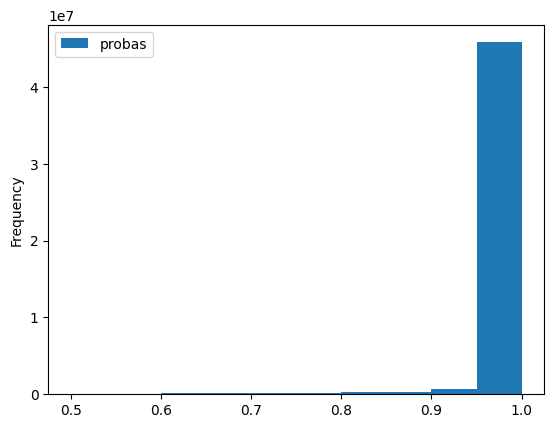

In [ ]:
eng_probas.plot.hist()

In [ ]:
fra_probas.describe(percentiles=[x/100 for x in range(0,101,5)])

probas
count  3.516832e+07
mean   9.742676e-01
std    6.255187e-02
min    5.000000e-01
0%     5.000000e-01
5%     8.661500e-01
10%    9.391600e-01
15%    9.644200e-01
20%    9.762800e-01
25%    9.829400e-01
30%    9.871400e-01
35%    9.900000e-01
40%    9.920700e-01
45%    9.936400e-01
50%    9.948600e-01
55%    9.958400e-01
60%    9.966400e-01
65%    9.973100e-01
70%    9.978800e-01
75%    9.983600e-01
80%    9.987800e-01
85%    9.991400e-01
90%    9.994700e-01
95%    9.997500e-01
100%   1.000010e+00
max    1.000010e+00

<AxesSubplot: ylabel='Density'>

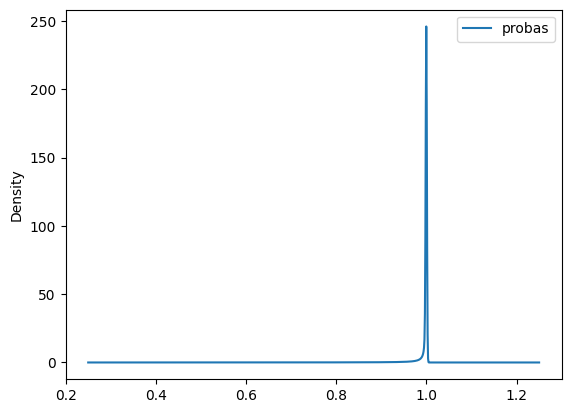

In [ ]:
eng_probas.plot.density()

## STOPES language shards

In [ ]:
output_file = "/home/lnishimw/scratch/stopes/stopes/pipelines/bitext/conf/sharded_langs.yaml"
with open(output_file, "w") as f:
    f.write("eng:\n")
    for i in range(1,504):
        f.write(f"  - eng{i}\n")
    f.write("fra:\n")
    for i in range(1,72):
        f.write(f"  - fra{i}\n")

In [ ]:
import yaml
with open(output_file, "r") as f:
    sharded_langs = yaml.safe_load(f)

In [ ]:
sharded_langs

NameError: name 'sharded_langs' is not defined

# Customizing iterable dataset and dataloader to restart on epoch end

In [ ]:
from datasets import Dataset, IterableDataset

In [41]:
class CustomIterableDataset(IterableDataset):
    def __init__(
        self,
        dataset: IterableDataset,
        samples: int
    ):
        """
        Args:
            dataset: The dataset to wrap.
            samples: The number of samples to yield from the dataset
        """
        super().__init__(
            dataset._ex_iterable, 
            dataset._info, 
            dataset._split, 
            dataset._formatting, 
            dataset._shuffling, 
            dataset._distributed, 
            dataset._token_per_repo_id
        )
        self.samples = samples 
    
    def __len__(self):
        return self.samples
    
    def set_epoch(self, epoch: int):
        super().set_epoch(epoch)
        # self._prepared_ex_iterable = self._prepare_ex_iterable_for_iteration()
        # self._state_dict = self._prepared_ex_iterable._init_state_dict()
        # self._starting_state_dict = None


In [50]:
samples_per_epoch = 6
ds = Dataset.from_dict({"a": range(samples_per_epoch)}).to_iterable_dataset(num_shards=samples_per_epoch//2)

In [51]:

max_steps = 20
step = 0
samples_per_epoch = 6
loader = iter(ds)
while step < max_steps:
    try:
        example = next(loader)
    except StopIteration:
        print("data exhausted, restarting dataloader")
        loader = iter(ds)
        continue
    print("step", step+1, "epoch", ds.epoch, example)
    step +=1
    if step%samples_per_epoch == 0:
        ds.set_epoch(ds.epoch+1)
        loader = iter(ds)

step 1 epoch 0 {'a': 0}
step 2 epoch 0 {'a': 1}
step 3 epoch 0 {'a': 2}
step 4 epoch 0 {'a': 3}
step 5 epoch 0 {'a': 4}
step 6 epoch 0 {'a': 5}
step 7 epoch 1 {'a': 0}
step 8 epoch 1 {'a': 1}
step 9 epoch 1 {'a': 2}
step 10 epoch 1 {'a': 3}
step 11 epoch 1 {'a': 4}
step 12 epoch 1 {'a': 5}
step 13 epoch 2 {'a': 0}
step 14 epoch 2 {'a': 1}
step 15 epoch 2 {'a': 2}
step 16 epoch 2 {'a': 3}
step 17 epoch 2 {'a': 4}
step 18 epoch 2 {'a': 5}
step 19 epoch 3 {'a': 0}
step 20 epoch 3 {'a': 1}


In [ ]:
import torch

isinstance(ds, torch.utils.data.IterableDataset)

True

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
dl = DataLoader(ds, batch_size=2, num_workers=0)

In [ ]:
dl.set_epoch(1)

AttributeError: 'DataLoader' object has no attribute 'set_epoch'

In [37]:
ds = Dataset.from_dict({"a": range(samples_per_epoch)})

In [52]:
import transformers

In [53]:
transformers.__version__

'4.27.4'

In [54]:
from transformers.utils import is_datasets_available

In [ ]:
from transformers.trainer_utils import seed_worker